## Letter Chunks Model: Mallet

## Resources

In [11]:
import pickle
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = 'mallet-2.0.8/bin/mallet' # update this path

In [23]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

## Get Data

In [24]:
# Get it back
with open("20240608_PhD_LtrChkLem-N.txt", "rb") as fp:   # Unpickling
    data_lemmatizedNouns = pickle.load(fp)

In [25]:
len(data_lemmatizedNouns)

2392

In [26]:
# Get it back
#with open("20240405_PhD_LtrLem-NV.txt", "rb") as fp:   # Unpickling
    #data_lemmatized = pickle.load(fp)

In [27]:
#len(data_lemmatized[0])

This code adapted from https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

## 1. LDA Mallet (Nouns Only)

In [28]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatizedNouns)

# Create Corpus
texts = data_lemmatizedNouns

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [29]:
# To see word associated with id, use this code.
print(id2word)

Dictionary(6541 unique tokens: ['air', 'apron', 'bye', 'ceremony', 'cermony']...)


In [30]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatizedNouns, 
                                                        start=5, 
                                                        limit=30, 
                                                        step=1)

Mallet LDA: 5 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 74
total tokens: 85123
<10> LL/token: -8.58619
<20> LL/token: -8.33697
<30> LL/token: -8.132
<40> LL/token: -7.97628

0	10	country place winter work house brother month home people family year hand wood summer church time uncle life garden school 
1	10	letter time friend sister child son health daughter mother family home wife write mind world pleasure baby husband care aunt 
2	10	year land pound country dollar money acre farm man spring house cent price crop horse wheat road thing person tea 
3	10	time letter week child friend book room boy life account paper mother visit home bed death interest spirit heart news 
4	10	day night morning weather evening water board week people hour yesterday time boat town city work month place ship flower 

<50> LL/token: -7.85973
<60> LL/token: -7.79124
<70> LL/token: -7.7413
<80> LL/token: -7.69687
<90> LL/token: -7.65755

0	10	place country work people time winter month sum

<560> LL/token: -7.49435
<570> LL/token: -7.49849
<580> LL/token: -7.50077
<590> LL/token: -7.50331

0	10	country time place month year people work winter home summer house church deal interest case flower garden person situation account 
1	10	letter friend time family brother mother sister health home kind wife son father death daughter news world write heart husband 
2	10	land pound year dollar money country acre farm house man wood tree foot spring lot horse cent price crop wheat 
3	10	child hand thing girl boy book room life mind bed paper trouble baby woman school week spirit rest fear picture 
4	10	day week night town morning weather evening side water hour river company yesterday boat city snow end leave clock ship 

<600> LL/token: -7.49737
<610> LL/token: -7.50322
<620> LL/token: -7.50429
<630> LL/token: -7.49881
<640> LL/token: -7.50081

0	10	time country place year month people work winter home summer house church interest deal case flower garden manner person situation 
1	1

<110> LL/token: -7.68503
<120> LL/token: -7.66367
<130> LL/token: -7.65476
<140> LL/token: -7.63731

0	8.33333	day people place time evening town side water hour river yesterday care weather boat end idea ship number fire fear 
1	8.33333	work dollar child hand thing boy book girl bed trouble baby school man woman week board spirit cent call table 
2	8.33333	time family home month health year friend brother summer winter son daughter mind child uncle wife aunt fall change doctor 
3	8.33333	letter mother sister friend life father death account heart news world kind husband brother paper write interest answer picture opportunity 
4	8.33333	week day night morning room house church visit lot home flower company return time snow today clock weather tea servant 
5	8.33333	country year land pound money acre farm house spring wood person tree foot crop price wheat winter garden store road 

<150> LL/token: -7.62501
<160> LL/token: -7.61304
<170> LL/token: -7.60786
<180> LL/token: -7.59933
<190>

<560> LL/token: -7.5108
<570> LL/token: -7.50776
<580> LL/token: -7.50461
<590> LL/token: -7.50984

0	8.33333	place people town water side river company day person road city boat end number fall difficulty ship idea hour time 
1	8.33333	child work hand thing man girl boy book trouble baby woman school kind spirit fear store call servant manner table 
2	8.33333	time year month family brother winter health home summer wife son daughter mind country friend business aunt uncle deal change 
3	8.33333	letter friend mother sister life father death account heart news paper world write husband care pleasure answer interest kind opportunity 
4	8.33333	day week night house morning room home weather evening bed church visit yesterday flower tea return snow today leave clock 
5	8.33333	country land pound dollar year money acre farm house wood tree foot lot spring horse cent price crop work garden 

<600> LL/token: -7.50452
<610> LL/token: -7.50947
<620> LL/token: -7.51171
<630> LL/token: -7.51013
<

Mallet LDA: 7 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 74
total tokens: 85123
<10> LL/token: -8.79057
<20> LL/token: -8.49241
<30> LL/token: -8.26571
<40> LL/token: -8.09231

0	7.14286	child letter friend life baby home husband world mind yesterday news spirit mother week time daughter school girl office situation 
1	7.14286	year people work man money month country board lot business kind wood garden interest dollar house bushel government company copy 
2	7.14286	time book friend day mother home letter hour death sister thing boy week kind wife heart flower daughter son girl 
3	7.14286	town morning evening night room church place side weather week river house water time boat city visit bed people dinner 
4	7.14286	country land pound year dollar acre farm house person money winter cent price crop spring wheat summer half cost climate 
5	7.14286	letter time brother family sister health week friend paper mother uncle account pleasure answer month word trust father doc

<410> LL/token: -7.53057
<420> LL/token: -7.52924
<430> LL/token: -7.525
<440> LL/token: -7.52744

0	7.14286	child life hand trouble world baby woman school husband boy mind heart care change interest rest case comfort matter trust 
1	7.14286	country work year people man lot company manner call idea head gentleman government end office war board gold opinion field 
2	7.14286	thing girl book visit home spirit daughter yesterday flower picture return age today mail boy doctor darling copy eye order 
3	7.14286	night house town morning room water evening bed church side tree hour river boat road day clock ship dinner island 
4	7.14286	land pound dollar money country year acre farm person cent price crop wheat wood horse half house cost bushel potato 
5	7.14286	letter friend family brother mother sister health time wife son father death kind paper write news pleasure aunt uncle answer 
6	7.14286	day time week place home month winter summer weather business deal spring store snow leave fall 

<810> LL/token: -7.50283
<820> LL/token: -7.49973
<830> LL/token: -7.49598
<840> LL/token: -7.50446

0	7.14286	child life hand heart mind trouble world baby woman school care husband rest interest change situation comfort difficulty matter case 
1	7.14286	country work year people man business state person company city office head law government war manner call gentleman idea gold 
2	7.14286	thing girl book boy paper visit spirit kind flower fear picture age today return doctor darling copy garden eye order 
3	7.14286	night town morning house room water evening bed church side hour river boat road clock ship board dinner island sea 
4	7.14286	land pound dollar money year country acre farm foot cent price crop wheat lot wood house cost tree bushel horse 
5	7.14286	letter friend family brother mother sister health wife son father time death daughter news write account aunt uncle kind year 
6	7.14286	day time week home place month winter summer weather deal spring store snow leave house fi

<210> LL/token: -7.6347
<220> LL/token: -7.62031
<230> LL/token: -7.6217
<240> LL/token: -7.60783

0	6.25	people home time baby house state company flower boy fear trouble case end idea care war call attention month gold 
1	6.25	work money dollar year man book country business city difficulty account pay office expense copy government bank situation pen party 
2	6.25	water person house board foot side horse cent boat day store thing ship tea servant sea pork door river spring 
3	6.25	friend family brother child mother sister wife father son death daughter heart life girl husband kind account age paper writing 
4	6.25	letter time month health week winter news summer write return thing pleasure deal answer cousin weather happiness picture leave respect 
5	6.25	place hand year world woman life home aunt uncle change rest interest church spirit manner kind paper eye reason order 
6	6.25	country land pound year acre farm wood tree lot summer price crop road wheat garden place dollar climate

<590> LL/token: -7.57832

0	6.25	people time town mind month baby house home company case flower fear end idea call matter trouble gentleman government war 
1	6.25	work man money dollar book country year business city situation account difficulty office pay interest expense copy bank property prospect 
2	6.25	water house side board foot river cent boat store thing ship tea servant fall sea pork head person captain fellow 
3	6.25	friend child family brother mother sister girl wife son father death daughter heart life husband kind boy year account age 
4	6.25	letter time health home month winter week summer news write pleasure thing deal return answer weather picture happiness opportunity trust 
5	6.25	place hand life paper woman aunt spirit uncle year rest change world person kind home manner trial friend eye reason 
6	6.25	country land pound year acre farm wood tree dollar lot spring price crop road garden wheat summer money house bushel 
7	6.25	day week night morning room evening bed 

<910> LL/token: -7.55794
<920> LL/token: -7.56513
<930> LL/token: -7.56416
<940> LL/token: -7.56591

0	6.25	people town house mind time month flower fear case matter company head gentleman idea kind government call state war attention 
1	6.25	country work year money man dollar business book account interest situation pay expense copy law bank city office property prospect 
2	6.25	water day side board river cent thing boat store foot fall number house tea ship sea servant hour captain vessel 
3	6.25	friend child family mother brother sister girl wife son father death daughter heart kind husband year life boy trouble age 
4	6.25	letter time health home month winter summer news write pleasure return thing answer deal week picture opportunity happiness writing cousin 
5	6.25	place hand home life woman world aunt spirit uncle paper rest manner change book trial eye order power person account 
6	6.25	land pound country year acre farm wood tree lot dollar price place crop wheat garden horse s

<260> LL/token: -7.60522
<270> LL/token: -7.60408
<280> LL/token: -7.59213
<290> LL/token: -7.59555

0	5.55556	day place month weather year side change company person time city end idea island attention acquaintance vessel prospect distance bank 
1	5.55556	house water wood tree lot spring cent price garden month tea kind road fall climate potato pork seed piece frost 
2	5.55556	people hand man flower manner fear mind matter office gentleman table eye power spirit door nature character question sort arm 
3	5.55556	family life book heart friend paper trouble world husband work death year rest interest son age copy trial mind blessing 
4	5.55556	child home week mother boy girl wife daughter baby woman visit aunt cousin son word doctor deal death pen call 
5	5.55556	letter time friend brother sister father news write return care answer pleasure account happiness opportunity mail writing darling peace month 
6	5.55556	day night town morning evening room school church bed week hour river yes

<580> LL/token: -7.5636
<590> LL/token: -7.5727

0	5.55556	day place month weather year time change company person city idea island bank attention climate prospect mine distance acquaintance air 
1	5.55556	house water wood tree foot lot spring garden tea potato seed pork road call piece description kind frost fire door 
2	5.55556	people hand man mind spirit flower manner interest matter office table gentleman government law eye fear power war order country 
3	5.55556	family life friend book heart death paper world husband son trouble year age copy trial work word rest loss comfort 
4	5.55556	child week home mother girl boy wife daughter baby school woman visit aunt cousin today deal doctor care son store 
5	5.55556	letter time brother friend sister father news write return answer home pleasure picture opportunity happiness account mail writing trust darling 
6	5.55556	day night morning town room evening bed church hour river yesterday week boat clock side house ship board dinner sea 
7

<680> LL/token: -7.56317
<690> LL/token: -7.56591

0	5.55556	day place month time year weather change company person idea city mine snow rest deal island climate head attention distance 
1	5.55556	house water wood tree foot garden tea kind spring potato pork store seed ground piece description door frost fire quarter 
2	5.55556	people hand man spirit flower manner matter office mind interest table government law eye order power gentleman war party character 
3	5.55556	family life book friend death heart paper world husband son work age copy trial loss trouble living year address sorrow 
4	5.55556	week child home mother boy girl wife daughter baby school visit aunt woman today trouble doctor anxiety son tomorrow call 
5	5.55556	letter time brother friend sister father news write return answer picture opportunity happiness writing home darling mail kind cousin health 
6	5.55556	night day town morning room evening bed church hour river boat yesterday side clock ship board road dinner sea 

Mallet LDA: 10 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 74
total tokens: 85123
<10> LL/token: -8.97426
<20> LL/token: -8.57044
<30> LL/token: -8.31995
<40> LL/token: -8.14766

0	5	book work kind garden winter week store account copy expense spirit head pork fellow clothe dress market description end walk 
1	5	day letter time night morning weather room news boat hour write ship darling snow fall peace week case rain girl 
2	5	time boy thing bed spring pleasure situation country woman letter servant dinner year eye visit girl writing state door head 
3	5	friend life heart letter husband flower home kind world happiness time day age death prayer sorrow girl rest return nature 
4	5	month day place health time wife people home country school summer year town respect property change difficulty letter answer write 
5	5	people hand house business paper work city table island friend interest pay time thing power opinion question matter account trade 
6	5	place church eveni

<310> LL/token: -7.57516
<320> LL/token: -7.57197
<330> LL/token: -7.57206
<340> LL/token: -7.57598

0	5	book work kind spring foot head garden store pay expense copy trouble seed climate gold provision neighbour clothe dress sort 
1	5	day week night morning room weather evening hour boat board snow today fire sea door leave rain air frost window 
2	5	child thing week girl boy bed baby woman visit tea trouble servant situation return dinner home yesterday eye tomorrow house 
3	5	friend life heart world husband care flower kind picture comfort happiness home darling age return trial death rest peace kindness 
4	5	time month winter summer town house country home year deal place case opportunity idea pleasure change respect reason trust property 
5	5	people work hand business mind paper interest city country matter table power opinion anxiety question rate story house feeling stand 
6	5	place water church side tree person wood river road fall office island bank building lady description d

<610> LL/token: -7.55254
<620> LL/token: -7.5621
<630> LL/token: -7.55914
<640> LL/token: -7.55267

0	5	kind spring thing foot head work flower garden pay store water seed gold piece provision neighbour dress bread clothe arm 
1	5	day night morning room weather evening hour boat week board snow ship fire sea clock rest rain lady air window 
2	5	child week boy girl bed trouble home baby woman school visit today thing servant doctor yesterday tea change tomorrow call 
3	5	friend life heart world husband kind care happiness age comfort death trust darling trial peace attention kindness loss spirit wife 
4	5	time month winter home summer country week place deal year return picture day mine pleasure fear climate address opportunity heat 
5	5	work people hand book mind paper business interest matter copy manner idea pen table opinion power question story spirit truth 
6	5	house place town side church wood river water tree road person fall end island bank building city distance meeting street

<910> LL/token: -7.55046
<920> LL/token: -7.55052
<930> LL/token: -7.54883
<940> LL/token: -7.55254

0	5	kind thing spring foot work flower garden pay head water tea servant seed piece gold potato provision pork dress clothe 
1	5	day night morning room evening hour boat leave clock ship fire bed board sea captain rain vessel lady weather air 
2	5	child week boy girl home baby school visit woman thing store trouble today bed doctor yesterday fear call tomorrow afternoon 
3	5	life friend heart world husband kind death comfort happiness care age trust darling trial trouble spirit peace attention loss kindness 
4	5	time month home winter summer year week day return country pleasure weather deal place health picture snow mine journey heat 
5	5	work hand book business mind paper people interest matter manner copy table pen opinion power term character reason spirit story 
6	5	house place town church side wood river person water tree road fall end island order bank building distance descripti

<210> LL/token: -7.65233
<220> LL/token: -7.6463
<230> LL/token: -7.63802
<240> LL/token: -7.63492

0	4.54545	day winter summer town place time spring company weather fall snow state account climate month man business heat idea frost 
1	4.54545	house room tree woman lot bed road board difficulty lady party nature mine view sort rate plan interest stand society 
2	4.54545	land pound dollar money acre farm year country cent price crop wheat cost bushel market farmer wage seed stock mill 
3	4.54545	work book thing paper church business man city pleasure kind manner gentleman pay copy picture captain ship service street fact 
4	4.54545	letter friend sister health time brother news write uncle father cousin happiness deal writing kind mother trust acquaintance care kindness 
5	4.54545	day night week morning baby school hour yesterday flower boat garden weather today clock bed dinner vessel tomorrow window passage 
6	4.54545	hand life heart mind trouble spirit comfort rest matter table eye p

<460> LL/token: -7.59215
<470> LL/token: -7.58158
<480> LL/token: -7.57687
<490> LL/token: -7.58195

0	4.54545	day place winter summer town month weather spring company account time fall snow idea mail state heat frost street climate 
1	4.54545	house room woman tree lot road side bed building door lady description party walk view mile sort rate plan table 
2	4.54545	land pound dollar money year acre farm country cent price crop wheat cost bushel market farmer wage seed cow half 
3	4.54545	work thing book paper church business city world interest gentleman copy captain man pleasure service character meeting question kind fortune 
4	4.54545	letter friend sister health brother time news write uncle father answer kind cousin happiness opportunity writing deal pleasure acquaintance kindness 
5	4.54545	day night morning school hour yesterday week flower boat garden baby bed today clock dinner vessel tomorrow window passage afternoon 
6	4.54545	life hand heart mind trouble friend care comfort

<710> LL/token: -7.5694
<720> LL/token: -7.57282
<730> LL/token: -7.57248
<740> LL/token: -7.57325

0	4.54545	day place winter month summer town weather time spring account company change snow climate heat frost air rest leave ground 
1	4.54545	house room woman bed road lot garden tree fire table side door building lady description window walk mile view sort 
2	4.54545	land pound dollar year money country acre farm cent price crop wheat cost market bushel farmer wage seed cow half 
3	4.54545	work book thing paper church business picture interest pay kind copy gentleman order pen mail meeting service term fortune story 
4	4.54545	letter friend brother sister health time news write kind answer cousin father opportunity happiness deal writing pleasure word acquaintance kindness 
5	4.54545	day night morning school hour yesterday flower boat week today clock dinner sea captain tomorrow side vessel ship bed afternoon 
6	4.54545	life hand heart mind trouble world friend comfort spirit matter 

<960> LL/token: -7.56623
<970> LL/token: -7.57702
<980> LL/token: -7.57279
<990> LL/token: -7.56934

0	4.54545	day place winter time summer town month weather spring account health fall snow business change climate deal heat frost rain 
1	4.54545	house room tree bed road garden woman side fire table lot order door building lady description window walk leave view 
2	4.54545	land pound dollar money year acre country farm cent price crop wheat cost bushel farmer market wage cow mill board 
3	4.54545	work book paper church thing flower business picture interest copy gentleman pen fear service meeting creature term story feeling kind 
4	4.54545	letter friend brother sister time health news write father answer cousin happiness opportunity kind word writing respect acquaintance mine kindness 
5	4.54545	day night morning evening school hour yesterday boat office clock dinner island sea captain ship tomorrow week vessel board bed 
6	4.54545	life hand heart mind friend world trouble comfort spir

<210> LL/token: -7.66724
<220> LL/token: -7.65964
<230> LL/token: -7.66399
<240> LL/token: -7.65436

0	4.16667	water side board river hour boat woman ship foot sea door captain lot vessel passage provision mile sort room employment 
1	4.16667	child boy death heart trouble mother spirit life girl age deal school trial father loss living pen anxiety family address 
2	4.16667	house place town wood church tree road bank building lady description order street day question fall manner view length country 
3	4.16667	time month year letter business opportunity people mine writing matter mail account government day war city island call comfort walk 
4	4.16667	work book paper life interest account expense copy attention party opinion term creature mind world story fortune face debt truth 
5	4.16667	time home return place friend uncle change care flower store rest picture happiness idea end pleasure blessing peace prayer journey 
6	4.16667	people hand man country world company office difficulty s

<460> LL/token: -7.61555
<470> LL/token: -7.6132
<480> LL/token: -7.61254
<490> LL/token: -7.6119

0	4.16667	water side board boat store ship hour sea door captain vessel end foot cent passage sort employment clothe box good 
1	4.16667	child boy death life heart trouble baby school husband girl darling blessing trial spirit age anxiety fever address loss sorrow 
2	4.16667	house place town day wood church tree river road gentleman bank building flower lady distance city description street view order 
3	4.16667	time year business account day people opportunity call head mine matter mail government island writing war law walk month city 
4	4.16667	work book paper life interest copy world party mind term fortune story nature power truth success debt account pay history 
5	4.16667	time month home place return pleasure care change picture happiness idea trust health friend rest peace prayer spirit air summer 
6	4.16667	country people hand man company manner world person difficulty office pro

<710> LL/token: -7.60651
<720> LL/token: -7.61033
<730> LL/token: -7.60838
<740> LL/token: -7.61084

0	4.16667	water board boat store ship sea captain end vessel fellow gold passage provision arrival foot hour box good servant article 
1	4.16667	child life heart death trouble baby husband school wife girl age boy darling blessing trial comfort fear writing loss world 
2	4.16667	house place town day wood church river tree road flower side fall gentleman bank building city lady distance street view 
3	4.16667	year time account business people mail matter office opportunity head government day island war attention law fact mine service month 
4	4.16667	work book paper life interest mind copy power party nature term creature soul eye fortune story truth success expense sum 
5	4.16667	time month home place return pleasure care summer change picture happiness idea day friend trust spirit peace prayer air journey 
6	4.16667	country people hand man state company manner mind difficulty person c

<960> LL/token: -7.60477
<970> LL/token: -7.60391
<980> LL/token: -7.60649
<990> LL/token: -7.60234

0	4.16667	water board thing boat store ship sea captain vessel end fellow hour gold passage company provision sort arrival house box 
1	4.16667	child death heart wife trouble baby husband life girl age son world darling school mind trial boy eye loss fever 
2	4.16667	house place day town wood church tree river side road building bank fall flower distance street lady mile view walk 
3	4.16667	year business account time man city mail matter office government call island war head fact service law people interest reason 
4	4.16667	work book life paper copy interest power pen nature party term mind story flower pay truth success sum soul order 
5	4.16667	time month home place day return pleasure summer care change happiness rest spirit picture writing peace attention trust prospect air 
6	4.16667	country people hand person manner difficulty case man state world idea company opinion number pr

<210> LL/token: -7.686
<220> LL/token: -7.68618
<230> LL/token: -7.68121
<240> LL/token: -7.67323

0	3.84615	friend family kind health year son wife daughter husband child mother pleasure attention spring living mine kindness age visit life 
1	3.84615	country place people person side board river boat state number end captain vessel case ship provision stock distance fall luggage 
2	3.84615	work man book people paper company copy government war office business term call character matter interest story thousand arm truth 
3	3.84615	dollar pound money year country business cent price house lot pay half cost expense seed month quarter wage rate servant 
4	3.84615	home mother week time trouble girl care idea trial reason mind visit pen anxiety life change opinion journey fact difficulty 
5	3.84615	brother month time sister letter father death write deal answer cousin opportunity week leave line home fever health law advice 
6	3.84615	land acre farm country year wood horse crop wheat spring 

<460> LL/token: -7.62874
<470> LL/token: -7.62673
<480> LL/token: -7.62668
<490> LL/token: -7.63015

0	3.84615	friend family year kind child wife son mother daughter husband aunt uncle health acquaintance kindness living likeness age blessing regret 
1	3.84615	country people side river person boat company board number ship water captain end vessel case passage arrival road bank luggage 
2	3.84615	work man book people paper interest office copy government war law party term gentleman character matter story success service sum 
3	3.84615	pound dollar money year country work business cent price pay cost expense wage servant property half quarter situation house employment 
4	3.84615	home week girl mother trouble visit care change idea call mind trial pen journey anxiety bread time doubt folk state 
5	3.84615	time brother month sister letter health father death home deal answer cousin opportunity write pleasure line fever leave post hear 
6	3.84615	land country acre farm year horse lot cro

<710> LL/token: -7.62672
<720> LL/token: -7.62855
<730> LL/token: -7.62337
<740> LL/token: -7.6292

0	3.84615	friend family child mother wife kind son daughter year husband death aunt uncle blessing acquaintance kindness living health likeness rest 
1	3.84615	country river person company people boat side water ship end number board sea captain vessel passage bank idea luggage passenger 
2	3.84615	people man work book paper interest copy government war office party term character gentleman story thousand success law food history 
3	3.84615	pound dollar country money year work business cent pay cost expense situation price wage board property quarter flour rate employment 
4	3.84615	home week trouble girl visit care time change state mother trial mind fear call anxiety fact journey leave pen circumstance 
5	3.84615	brother month time sister health home father deal answer letter cousin week year pleasure write account line fever opportunity address 
6	3.84615	land country acre farm year h

<960> LL/token: -7.62111
<970> LL/token: -7.62865
<980> LL/token: -7.62654
<990> LL/token: -7.6215

0	3.84615	friend child family mother kind wife son death daughter year husband aunt uncle blessing kindness living age woman respect likeness 
1	3.84615	side river boat company end number board ship water person sea country bank captain people vessel hour passage arrival good 
2	3.84615	people work book man paper office copy government interest war party term story debt success gentleman thousand show class matter 
3	3.84615	country pound dollar money year work business cent person pay cost expense situation wage property price man state flour board 
4	3.84615	home week girl time trouble visit care change rest call boy mother leave idea fear journey trial anxiety circumstance folk 
5	3.84615	brother sister time health month year father account deal answer cousin friend home pen line address paper pleasure advice law 
6	3.84615	land acre country farm year horse crop wheat bushel lot potat

<160> LL/token: -7.69678
<170> LL/token: -7.69045
<180> LL/token: -7.68174
<190> LL/token: -7.67848

0	3.57143	people thing room work bed manner paper door party term dress box story feeling gentleman house sleep truth cotton history 
1	3.57143	country winter summer time account company spring state fear climate peace war mind opinion heat frost stand part anxiety content 
2	3.57143	family year son death heart husband sister child doctor age blessing today life account reason living loss address character illness 
3	3.57143	book man year interest head idea case expense copy island power change gold pen end sickness vessel capital business thousand 
4	3.57143	dollar work money country board business lot cent person year servant pay month wage property rate employment trade clothe cost 
5	3.57143	child hand boy girl daughter baby school trouble woman visit mind table eye situation afternoon call service body hair share 
6	3.57143	place town house church boat side number city government b

<360> LL/token: -7.62116
<370> LL/token: -7.62443
<380> LL/token: -7.62094
<390> LL/token: -7.61919

0	3.57143	people thing room bed manner house gentleman door work dress paper box story cotton sleep trouble description history round habit 
1	3.57143	country winter summer man spring state account company climate government war call field frost heat road fall thousand stand part 
2	3.57143	year family son death heart husband account change life doctor age reason loss living address child illness character suit disease 
3	3.57143	book interest idea difficulty matter mind copy power case pen party gold sort plan capital fear end doubt expense island 
4	3.57143	work dollar money business person lot board cent year pay month wage property servant employment rate trade clothe good cost 
5	3.57143	child hand boy girl baby school woman trouble daughter visit wife table eye today tomorrow kitchen talk lesson hope painting 
6	3.57143	place town church side house river city boat number bank buil

<560> LL/token: -7.61014
<570> LL/token: -7.61143
<580> LL/token: -7.61116
<590> LL/token: -7.61406

0	3.57143	room thing bed people house gentleman door lady manner description dress window box cotton hair sleep lot table feeling floor 
1	3.57143	country winter summer people man state account company government war climate office heat field thousand number part food officer clothing 
2	3.57143	year family son death wife daughter husband account change age doctor life reason living heart address child father sister loss 
3	3.57143	book paper interest difficulty matter case copy pen gold opinion term idea question power creature plan thing story doubt success 
4	3.57143	work dollar money business year person cent board lot pay month wage property fact servant employment rate trade expense mine 
5	3.57143	child girl boy baby woman school trouble hand today visit call arm tomorrow talk table lesson cough body hope likeness 
6	3.57143	place town church side river house boat city fall capta

<760> LL/token: -7.61363
<770> LL/token: -7.61754
<780> LL/token: -7.60802
<790> LL/token: -7.6116

0	3.57143	thing house room bed hand table door lot fire window description dress box end cotton hair sleep lady manner kitchen 
1	3.57143	country people winter man summer state company climate government war year field heat thousand duty account stand number class food 
2	3.57143	family year brother son death daughter wife husband sister account child age doctor loss living address change heart reason suit 
3	3.57143	book work paper interest difficulty matter copy party opinion pen gentleman case idea eye story term success doubt purpose sum 
4	3.57143	dollar money work business board person cent pay pound month year wage property servant situation fact expense employment rate case 
5	3.57143	child week boy girl baby woman school trouble today visit tomorrow spirit yesterday body talk lesson cough hope call car 
6	3.57143	place town church river side boat road fall house city water bank 

<960> LL/token: -7.60339
<970> LL/token: -7.60799
<980> LL/token: -7.60221
<990> LL/token: -7.60532

0	3.57143	thing room house bed hand fire table door lot description lady window night dress box end hair cotton kitchen minute 
1	3.57143	country people winter man summer company state year government war climate office heat field stand thousand duty law number food 
2	3.57143	family year brother sister wife son death daughter account husband child age doctor loss living line address comfort father disease 
3	3.57143	book work paper interest matter copy eye pen idea creature party term question case story doubt gentleman fear sum success 
4	3.57143	dollar money work business year board person cent month pay wage property place pound servant expense fact case employment rate 
5	3.57143	child girl boy week baby school woman trouble today yesterday spirit tomorrow visit fear call body fortnight pain talk cough 
6	3.57143	place town house side church river city road boat fall water building

<160> LL/token: -7.73265
<170> LL/token: -7.72122
<180> LL/token: -7.71886
<190> LL/token: -7.71354

0	3.33333	work dollar person board money country number pay hour case captain month passage employment clothe good man article luggage duty 
1	3.33333	home girl return baby account visit care time flower comfort happiness writing opportunity peace leave trust pen change darling creature 
2	3.33333	house town side year business fire head government kind building pork situation field call street flour view quarter stone beef 
3	3.33333	brother mother sister friend letter father health news kind daughter uncle cousin pleasure respect acquaintance time word month kindness event 
4	3.33333	hand thing woman mind servant island sea ship journey provision mine dress question box cotton share hair arrival packet stand 
5	3.33333	week winter month summer weather school health time spring today doctor snow trouble climate attention fever heat store air fall 
6	3.33333	family year friend wife son d

<360> LL/token: -7.66216
<370> LL/token: -7.66293
<380> LL/token: -7.65617
<390> LL/token: -7.65588

0	3.33333	dollar person money work business board cent case pay captain vessel property servant passage ship month employment good clothe luggage 
1	3.33333	girl baby return home care visit flower pleasure comfort happiness leave darling time eye peace trust pen change blessing picture 
2	3.33333	house town place year situation fire tea call pork head building church street flour view quarter number bread stone city 
3	3.33333	friend brother mother sister kind father daughter health letter uncle cousin wife respect writing acquaintance month word kindness likeness direction 
4	3.33333	hand thing woman mind island sea mine journey question dress box voyage arrival cotton hour share packet description ship girl 
5	3.33333	week winter month time summer weather school health store snow doctor today spring fever heat trouble fall illness attention air 
6	3.33333	family year life son death wo

<560> LL/token: -7.64113
<570> LL/token: -7.64304
<580> LL/token: -7.64838
<590> LL/token: -7.65007

0	3.33333	dollar money business work board cent pay case year captain expense wage property ship vessel person passage employment rate store 
1	3.33333	baby return care girl flower comfort happiness fear pleasure trust home darling eye spirit peace change world picture visit creature 
2	3.33333	house town place situation river fire head pork year building tea distance call street quarter flour view time bread number 
3	3.33333	friend brother mother sister kind father letter health uncle daughter aunt cousin blessing kindness acquaintance line month likeness neighbour respect 
4	3.33333	thing hand woman mind girl sea lady island description arrival question dress servant box gold mine cotton voyage hair share 
5	3.33333	week month time winter summer weather health day trouble snow doctor fever heat air store illness spring fortnight minute fall 
6	3.33333	family year son death wife heart

<760> LL/token: -7.65285
<770> LL/token: -7.6431
<780> LL/token: -7.64312
<790> LL/token: -7.65031

0	3.33333	dollar money work business board cent store pay expense wage captain vessel person case fact ship provision passage year employment 
1	3.33333	baby girl home care return visit flower happiness picture darling trust leave eye peace yesterday fear change spirit prayer head 
2	3.33333	house town time place river situation fire pork building order head distance year street view number road stone bread spot 
3	3.33333	friend brother mother sister kind father health family daughter aunt uncle cousin wife acquaintance kindness line word month likeness blessing 
4	3.33333	hand thing woman mind sea lady gold girl journey servant description dress box question voyage cotton hair pleasure packet share 
5	3.33333	day month winter summer week time weather health snow doctor spring fever frost heat illness air fortnight fall strength ice 
6	3.33333	year life family son death heart husband fr

<960> LL/token: -7.63009
<970> LL/token: -7.63329
<980> LL/token: -7.62622
<990> LL/token: -7.62919

0	3.33333	dollar work money year board cent month business pay wage captain vessel store ship expense provision person employment rate good 
1	3.33333	girl return visit baby care flower happiness picture darling leave head fear eye call change spirit trust peace walk prayer 
2	3.33333	house place town church river road side time order building fire distance street wood view situation spot bank part mile 
3	3.33333	friend brother family sister mother father daughter health kind wife aunt uncle cousin son line acquaintance word advice blessing kindness 
4	3.33333	thing hand woman lady mind gold journey pleasure question sort arrival servant dress box voyage sea manner end cotton share 
5	3.33333	day winter month time summer week weather health spring snow doctor fever heat frost illness fall minute disease ice storm 
6	3.33333	year death heart world life friend husband trouble son age tri

<160> LL/token: -7.76175
<170> LL/token: -7.7525
<180> LL/token: -7.74352
<190> LL/token: -7.74224

0	3.125	child home week girl trouble baby school mother wife flower comfort anxiety advice aunt lesson hope call painting officer picture 
1	3.125	day woman thing night end fire time building war order side lady description people piece service address manner tree gentleman 
2	3.125	life son daughter year heart death husband age friend boy trial power law sorrow soul hair spirit nature office suit 
3	3.125	land acre farm country pound dollar wood price wheat year bushel farmer market wage field house stock mill trade neighbourhood 
4	3.125	time mind care change head month man trust lot opportunity pain arm prospect food strength picture thing occasion reason hear 
5	3.125	country dollar person state cent number servant difficulty case government city business property man quarter fact character employment luggage matter 
6	3.125	country money year pound summer winter spring crop account 

<360> LL/token: -7.67125
<370> LL/token: -7.68672
<380> LL/token: -7.68058
<390> LL/token: -7.67925

0	3.125	child week mother girl boy baby school aunt trouble home flower wife picture today anxiety likeness call lesson hope painting 
1	3.125	people woman thing city manner tree wood fire gentleman building war lady end piece description order view walk idea matter 
2	3.125	life son death daughter heart year husband age power rest trial wife family world loss sorrow soul suit disease law 
3	3.125	land pound acre farm dollar price wheat year cost bushel farmer lot crop wage wood market mill stock tree trade 
4	3.125	time mind care change month head fear trust health lot pain arm thousand prospect trip food strength thought occasion turn 
5	3.125	country dollar person state cent number difficulty case situation government property business servant man employment fact luggage law expense emigrant 
6	3.125	country money winter summer year spring garden pay account seed climate potato neigh

<560> LL/token: -7.65831
<570> LL/token: -7.65479
<580> LL/token: -7.65871
<590> LL/token: -7.66506

0	3.125	child week mother girl boy home baby school aunt uncle flower call today picture trouble likeness hope nurse cottage painting 
1	3.125	people woman thing manner city matter fire wood gentleman tree idea war building order lady description walk night view spot 
2	3.125	life son death daughter heart wife husband world year age trial loss sorrow rest living soul spirit disease complaint sister 
3	3.125	land pound acre farm year dollar price wheat bushel farmer lot crop wood cost wage tree market cow mill quarter 
4	3.125	time mind change trouble care fear month account prospect office anxiety arm pain thousand trust thought food strength government hand 
5	3.125	country dollar person state cent case situation number difficulty business property fact servant employment man law luggage duty debt emigrant 
6	3.125	country winter money year summer spring garden climate seed pay expense

<760> LL/token: -7.66057
<770> LL/token: -7.65729
<780> LL/token: -7.65444
<790> LL/token: -7.65638

0	3.125	child week boy girl home mother school baby aunt uncle picture darling flower today likeness hope painting nurse call photo 
1	3.125	people woman city manner tree thing fire gentleman wood idea building lady party walk view plan society spot matter mile 
2	3.125	life wife son death daughter heart family husband year age trial world loss sorrow trouble soul sister rest regret disease 
3	3.125	land pound acre farm year dollar price wheat crop bushel market farmer cost wood wage cow lot mill stock trade 
4	3.125	time mind account care change trouble fear man anxiety war government prospect pain arm thousand doubt head thought office field 
5	3.125	country dollar state money case cent person situation difficulty expense law business property number year pay board employment capital servant 
6	3.125	country winter summer money month year spring health garden snow climate seed ground 

<960> LL/token: -7.64061
<970> LL/token: -7.65013
<980> LL/token: -7.64768
<990> LL/token: -7.63986

0	3.125	child week boy girl mother baby school aunt uncle home today picture doctor darling likeness hope visit island card nurse 
1	3.125	people city thing fire gentleman manner wood building idea tree woman lady walk party view society spot turn plan address 
2	3.125	family life wife son death daughter heart year husband age sister trial loss living world sorrow trouble soul regret disease 
3	3.125	land pound acre farm year price dollar wheat crop wood bushel market farmer cost wage mill stock trade half lot 
4	3.125	time account mind trouble man fear year change government care war office call anxiety arm end thousand doubt thought food 
5	3.125	country money dollar state cent person situation difficulty case expense property year employment capital pay debt emigrant law advantage board 
6	3.125	winter summer month health spring country weather flower garden year kind snow climate se

<160> LL/token: -7.75319
<170> LL/token: -7.73525
<180> LL/token: -7.73549
<190> LL/token: -7.74331

0	2.94118	wood tree flower garden manner winter seed spring ground acquaintance potato attention piece lady description mill character length air grass 
1	2.94118	room bed thing hand tea house woman door fire horse window dress fortnight kitchen minute cough lesson sight milk floor 
2	2.94118	book thing copy sea boat paper vessel journey passage term girl arrival box good luggage voyage passenger board packet woman 
3	2.94118	place town house church river end bank building captain order meeting street mile opinion fall view village charge advantage lake 
4	2.94118	day week month water time foot hour store side fever head frost fellow stand likeness scene car coal yesterday yard 
5	2.94118	work dollar money business hand cent board servant month expense interest table house wage fact rate employment trade pay person 
6	2.94118	family year mother daughter wife child husband father mind tr

<360> LL/token: -7.66864
<370> LL/token: -7.6791
<380> LL/token: -7.67431
<390> LL/token: -7.67871

0	2.94118	wood tree flower garden manner kind seed ground lady attention piece leave description spring society air length character grass frost 
1	2.94118	room bed house tea thing woman hand fire door window girl bread dress kitchen minute lesson cough birthday floor fortnight 
2	2.94118	thing boat ship sea captain vessel woman journey term passage arrival board good box question article voyage luggage passenger fellow 
3	2.94118	place town house church side river city gentleman bank building road distance meeting street end mile fall view plan scene 
4	2.94118	week day time month water foot work hour store head fever today company car coal yard meet shop stand knowledge 
5	2.94118	dollar work money business hand cent board house servant month expense wage pay table interest person fact rate trade employment 
6	2.94118	family mother year wife daughter death father husband life child com

<560> LL/token: -7.69184
<570> LL/token: -7.69868
<580> LL/token: -7.69786
<590> LL/token: -7.7034

0	2.94118	wood tree spring flower garden kind seed description frost air ground piece lady leave potato appearance length grass fruit hill 
1	2.94118	room bed hand house tea girl thing fire table door window bread dress box dinner boy kitchen minute lesson floor 
2	2.94118	boat water thing ship sea captain day woman vessel board passage arrival question good article voyage luggage passenger pay account 
3	2.94118	place town house church river side road city fall bank building distance gentleman walk meeting street view order plan end 
4	2.94118	day time week month work foot store head hour water stand fever company mountain car yard coal mine fellow cut 
5	2.94118	dollar money work business cent board house expense interest wage servant year property person month fact employment rate cotton trade 
6	2.94118	family mother year wife death daughter child husband life son father trial woman 

<760> LL/token: -7.68616
<770> LL/token: -7.68665
<780> LL/token: -7.68187
<790> LL/token: -7.68921

0	2.94118	wood tree flower garden spring kind seed ground piece frost leave length manner lady air fruit grass neighbour potato winter 
1	2.94118	room bed girl hand thing tea house fire table woman door dress window box hair bread kitchen lesson floor boy 
2	2.94118	water day boat ship hour board sea captain vessel night journey case passage fellow arrival good article question voyage passenger 
3	2.94118	place town house church river road side city building order fall walk meeting view mile street distance bank dinner end 
4	2.94118	day time month week work foot head store fever water hour house charge yard car coal stand drink partner bone 
5	2.94118	dollar money work business cent year pay month expense person wage board property interest fact rate employment trade servant man 
6	2.94118	family mother year life wife death child husband son daughter comfort trial loss sorrow father so

<960> LL/token: -7.67188
<970> LL/token: -7.67087
<980> LL/token: -7.67342
<990> LL/token: -7.67215

0	2.94118	wood tree flower garden spring kind seed ground piece foot frost lady length potato manner fruit grass order leave milk 
1	2.94118	room thing hand bed tea fire table girl door woman dress bread box dinner house hair servant window kitchen cotton 
2	2.94118	day boat water board ship sea captain hour vessel passage arrival question fellow good journey article voyage luggage passenger case 
3	2.94118	place town house side church river city road water building walk fall meeting street bank view mile gentleman distance village 
4	2.94118	time month day week work head store foot house hour fever charge minute car coal stand drink face bone tooth 
5	2.94118	dollar money year work business cent pay expense wage property pound man person employment rate trade board house servant purchase 
6	2.94118	family mother wife death year heart life husband girl son daughter child loss woman sorr

<160> LL/token: -7.76758
<170> LL/token: -7.75632
<180> LL/token: -7.74935
<190> LL/token: -7.75021

0	2.77778	book life work age copy trust care parent term story heart feeling success doubt truth affection woman home page case 
1	2.77778	pound dollar money work cent board pork person wage servant expense price year provision trade employment clothe purchase profit amount 
2	2.77778	water wood tea house foot fire table return thing piece head flour end bread article spot view lake dinner round 
3	2.77778	time home week month town store company day folk thousand arm war mountain change food trip place post thinking officer 
4	2.77778	country people place person state number difficulty office attention manner year character emigrant settler kindness capital habit service anxiety teacher 
5	2.77778	year paper business interest city friend matter kind change government law reason property respect debt share rest suit prospect sum 
6	2.77778	land acre farm country year crop wheat bushel ma

<360> LL/token: -7.69757
<370> LL/token: -7.71053
<380> LL/token: -7.6994
<390> LL/token: -7.69508

0	2.77778	book work life copy term parent age opinion story power gentleman truth case affection success nature regard history woman page 
1	2.77778	pound dollar money cent board expense pork work wage business year employment trade flour quarter beef clothe shilling person price 
2	2.77778	wood water tea fire table thing return house head plan servant bread dinner article breakfast spot piece clock gentleman state 
3	2.77778	home time day town week month company store rest idea call journey folk mountain trip food distance clothing officer thinking 
4	2.77778	country place people person manner difficulty number attention character state society village emigrant part inhabitant habit occasion service district religion 
5	2.77778	paper year business interest city matter man government law kind gold case people capital party war doubt debt thousand state 
6	2.77778	land acre year farm coun

<560> LL/token: -7.69585
<570> LL/token: -7.68797
<580> LL/token: -7.6966
<590> LL/token: -7.70033

0	2.77778	book work paper life copy gentleman term story nature truth success history regard care sale subject page age world volume 
1	2.77778	pound dollar money cent work price board expense business wage pork quarter flour employment rate trade half beef shilling purchase 
2	2.77778	tea thing water fire table head wood piece return clock house dinner bread article breakfast spot potato end hill meat 
3	2.77778	home week time day month company idea rest town year journey folk distance deal trip mountain food visit thinking officer 
4	2.77778	country people place person manner difficulty number attention town opinion character state village emigrant society inhabitant feeling habit occasion part 
5	2.77778	man year city business interest office matter people government war gold kind party capital doubt state thousand debt sum class 
6	2.77778	land acre year farm country crop wheat lot b

<760> LL/token: -7.69098
<770> LL/token: -7.69008
<780> LL/token: -7.68256
<790> LL/token: -7.68869

0	2.77778	book work paper copy life age term story trust interest power success truth history sale subject page world fortune notice 
1	2.77778	pound dollar money cent work cost board business wage expense year flour price employment rate trade person property quarter shilling 
2	2.77778	thing tea dinner water head pork box clock article bread breakfast servant butter dress sugar potato return hill ham clothe 
3	2.77778	home time year day month company rest health idea week visit journey folk change pleasure distance mountain food thinking officer 
4	2.77778	country people place person manner difficulty number town opinion character attention village feeling emigrant state settlement habit advantage meeting district 
5	2.77778	man business city office government interest war law state party gold matter people kind year capital case gentleman thousand bank 
6	2.77778	land year acre count

<960> LL/token: -7.68199
<970> LL/token: -7.68572
<980> LL/token: -7.68344
<990> LL/token: -7.68374

0	2.77778	book work paper life copy term story pen truth success world history fortune nature man interest page subject notice study 
1	2.77778	pound dollar money cent year cost board work wage business price expense property rate flour trade employment cow person purchase 
2	2.77778	thing tea dinner water piece bread box head pork dress clock provision servant breakfast article clothe butter cotton potato apple 
3	2.77778	home time year month rest company week deal idea day journey folk share change position address mountain food trip thinking 
4	2.77778	country people place person manner difficulty number attention state village emigrant character advantage settlement opinion habit society climate meeting neighbourhood 
5	2.77778	man year business city interest office government war kind party people gentleman matter state thousand debt earth law capital gold 
6	2.77778	land acre year

<110> LL/token: -7.83525
<120> LL/token: -7.81686
<130> LL/token: -7.80652
<140> LL/token: -7.78382

0	2.63158	month winter country year summer spring situation respect city heat frost opportunity call fall suit peace township harvest effect bird 
1	2.63158	week day home visit baby doctor church house difficulty town pain illness anxiety appearance fortnight street state disease cough strength 
2	2.63158	family brother sister friend mother son daughter husband year acquaintance living loss line answer death manner leave law blessing support 
3	2.63158	dollar money work year business place cent wage reason property time employment trade half labour purchase debt advantage profit settlement 
4	2.63158	wood house tree flower garden climate rain window air quarter walk view fire spot fruit lake seed port apple milk 
5	2.63158	land pound acre farm country crop price wheat bushel market farmer potato cow flour stock horse state beef shilling year 
6	2.63158	friend life kind mind heart accoun

<260> LL/token: -7.71669
<270> LL/token: -7.70842
<280> LL/token: -7.70707
<290> LL/token: -7.70913

0	2.63158	month winter country year summer spring situation kind deal respect opportunity heat frost climate rain fall harvest bird city pay 
1	2.63158	week home day baby visit doctor house anxiety tomorrow head pain call illness fortnight disease cough plant bear sleep strength 
2	2.63158	family brother mother sister son husband friend daughter health year acquaintance line father likeness reason law living cousin support satisfaction 
3	2.63158	dollar money work year business cent board wage property pound servant half rate employment trade clothe purchase advantage interest reason 
4	2.63158	wood tree flower garden house seed attention walk expense view ground idea turn grass fruit lake port storm apple milk 
5	2.63158	land pound acre farm price country crop wheat year bushel farmer market cow horse potato flour stock labour beef shilling 
6	2.63158	friend life heart mind kind world 

<410> LL/token: -7.6867
<420> LL/token: -7.67883
<430> LL/token: -7.67922
<440> LL/token: -7.67729

0	2.63158	month winter country summer year spring deal situation snow kind climate frost heat respect fall rain complaint feel bird harvest 
1	2.63158	week home baby mother head call day doctor visit anxiety trouble tomorrow fever pain illness fortnight disease cough hope house 
2	2.63158	family brother sister mother health son year daughter friend father acquaintance reason line answer blessing cousin likeness living law support 
3	2.63158	dollar money work year business cent board pound wage property fact pay employment rate trade person purchase capital difficulty profit 
4	2.63158	wood tree house flower garden manner seed description lady walk ground view order expense grass fruit air apple plant leave 
5	2.63158	land pound acre farm country price crop wheat bushel market year farmer cow flour potato cost stock neighbourhood labour horse 
6	2.63158	friend life heart mind kind change 

<560> LL/token: -7.67364
<570> LL/token: -7.67029
<580> LL/token: -7.68233
<590> LL/token: -7.67274

0	2.63158	month winter country year summer spring deal snow situation kind climate heat frost respect account fall harvest complaint feel cut 
1	2.63158	week home baby visit mother doctor call today tomorrow yesterday fever anxiety head day thing pain trouble illness fortnight cough 
2	2.63158	family brother sister mother health son daughter year friend wife father reason line acquaintance blessing cousin living law answer likeness 
3	2.63158	dollar money work business pound year cent board person wage expense property fact employment rate trade purchase cost pay capital 
4	2.63158	wood house tree flower garden order seed walk view manner air description lady leave grass eye fruit ground apple plant 
5	2.63158	land acre pound farm country year price crop wheat bushel farmer market cow horse neighbourhood labour shilling stock potato settler 
6	2.63158	friend mind kind life change troubl

<710> LL/token: -7.67327
<720> LL/token: -7.67103
<730> LL/token: -7.66043
<740> LL/token: -7.65867

0	2.63158	month year winter country summer spring deal snow kind climate frost heat respect ice fall account complaint feel harvest partner 
1	2.63158	week home baby visit mother store doctor trouble today tomorrow anxiety yesterday fever call head pain illness cough disease fortnight 
2	2.63158	family brother sister mother health son daughter friend wife father year line cousin acquaintance reason blessing law respect word likeness 
3	2.63158	dollar money work pound business cent year board person wage property pay rate trade fact expense employment cost purchase debt 
4	2.63158	wood tree flower garden order seed manner house ground home description view leave fruit turn apple plant expense eye air 
5	2.63158	land acre pound farm country year price crop wheat bushel market farmer cow stock state neighbourhood labour potato shilling settler 
6	2.63158	friend mind kind life care fear sit

<860> LL/token: -7.65717
<870> LL/token: -7.6598
<880> LL/token: -7.65286
<890> LL/token: -7.6601

0	2.63158	month winter year summer country deal spring weather snow climate home frost heat fall kind folk harvest degree feel ice 
1	2.63158	week home baby visit store mother doctor trouble tomorrow call head anxiety fever day today illness pain yesterday fortnight cough 
2	2.63158	family brother sister mother son daughter health wife year father friend cousin line acquaintance respect blessing likeness living law answer 
3	2.63158	dollar money work pound year cent business board person wage property expense fact employment rate trade capital pay purchase debt 
4	2.63158	wood tree flower garden house order seed description manner neighbour grass apple leave fruit turn gentleman plant home light spring 
5	2.63158	land country acre pound farm year price crop wheat bushel market farmer cow stock state labour shilling cost potato oats 
6	2.63158	friend kind mind life situation change reason 

Mallet LDA: 20 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 74
total tokens: 85123
<10> LL/token: -9.32763
<20> LL/token: -8.81809
<30> LL/token: -8.5196
<40> LL/token: -8.3323

0	2.5	country people climate state interest summer bank person rate expense government stock employment duty heat nature appearance settlement capital habit 
1	2.5	book life church account year boy child home parent description deal man clothing officer law work idea talk page heart 
2	2.5	room bed house visit water daughter table week spirit eye girl bread kitchen lesson pay card rest door chair hope 
3	2.5	river store fall road town foot house situation tree arrival number fruit sail fortnight shore spot state week station wind 
4	2.5	brother letter write time mother health son wife home care pen line change acquaintance paper yesterday anxiety rest sister order 
5	2.5	night morning baby day week boat clock sea copy evening head dollar yesterday work rain illness boy breakfast afternoon ste

<160> LL/token: -7.81531
<170> LL/token: -7.8078
<180> LL/token: -7.78848
<190> LL/token: -7.7964

0	2.5	country people year state climate government person war opinion stock man employment capital labour emigrant settler advantage settlement habit condition 
1	2.5	book work life boy copy mind term parent story heart feeling truth regard subject page writing volume clearing influence case 
2	2.5	house room bed store table girl eye door window visit kitchen hair minute trouble lesson dinner cough bread spirit floor 
3	2.5	town tree water river side road boat foot fall bank place fellow arrival mile description return sail shore station plant 
4	2.5	family health home son daughter time brother mother wife change paper line care sister folk rest write suit support word 
5	2.5	week night day morning baby evening yesterday clock rain fever walk head afternoon sea illness wind disease breakfast car side 
6	2.5	hand world people garden manner kind paper blessing comfort spirit order attention

<310> LL/token: -7.73264
<320> LL/token: -7.73132
<330> LL/token: -7.73841
<340> LL/token: -7.73468

0	2.5	country people state year government war land climate difficulty capital opinion labour case emigrant advantage settler settlement person money habit 
1	2.5	book life work boy copy mind parent term story truth sum heart history regard benefit subject page progress notice bear 
2	2.5	room house bed girl table door dinner window eye hair walk kitchen minute cough lesson floor music description trouble visit 
3	2.5	town side tree water river boat road bank building view mile fall vessel sail foot steam fellow lake arrival return 
4	2.5	family health year home daughter son time care situation rest change line prospect suit support word complaint study brother welfare 
5	2.5	week night day morning baby evening clock today yesterday rain leave home fever afternoon fortnight illness sight train wind assistance 
6	2.5	hand paper world boy kind people spirit manner attention comfort kindne

<460> LL/token: -7.71638
<470> LL/token: -7.71201
<480> LL/token: -7.71424
<490> LL/token: -7.71173

0	2.5	country people person year land state case climate difficulty labour capital emigrant settler manner duty settlement employment opinion advantage habit 
1	2.5	book work life paper copy mind story term truth history content success pen progress subject page expense notice volume memory 
2	2.5	room bed house woman eye door table girl dinner window walk visit breakfast sleep kitchen minute lesson afternoon station hair 
3	2.5	town side tree water river road boat bank building return fall view idea description mile steam sail lake arrival fellow 
4	2.5	family year health son daughter home time care situation change word prospect folk suit support rest boy complaint glad_hear satisfaction 
5	2.5	week day morning night baby yesterday clock visit evening today tomorrow fever rain head child illness fortnight disease assistance home 
6	2.5	hand kind world spirit pleasure garden order pape

<610> LL/token: -7.72709
<620> LL/token: -7.73336
<630> LL/token: -7.72518
<640> LL/token: -7.72207

0	2.5	country people person land climate state opinion year difficulty employment capital number labour emigrant settler advantage manner feeling danger habit 
1	2.5	book work paper life copy term story truth success trust history picture painting pen interest bear nature subject page progress 
2	2.5	room bed house woman table door eye window dinner walk hair boy sleep kitchen minute girl lesson floor music night 
3	2.5	side tree water river road boat town bank building board morning end fall fellow steamer steam sail arrival view lake 
4	2.5	family year health son daughter time home situation care month blessing boy wife change word living rest support suit complaint 
5	2.5	week day night morning baby evening visit today clock yesterday child tomorrow head home return illness fever breakfast fortnight afternoon 
6	2.5	hand kind world spirit pleasure gentleman attention manner kindness 

<760> LL/token: -7.71917
<770> LL/token: -7.72117
<780> LL/token: -7.71803
<790> LL/token: -7.7244

0	2.5	country people year state person idea land opinion climate capital employment manner labour feeling duty number emigrant settler advantage settlement 
1	2.5	book work paper life copy story term success truth pen history bear sale nature page interest notice subject college sickness 
2	2.5	room bed house woman night table door window walk boy girl lady hair sleep kitchen lesson fellow floor music station 
3	2.5	side water tree river road boat building town morning wood foot mile view fall board end bank spot steamer steam 
4	2.5	family health year son daughter time situation home month change rest wife word suit blessing boy reason support living friend 
5	2.5	day week baby morning evening visit night home today clock yesterday child tomorrow fever doctor illness half breakfast fortnight cough 
6	2.5	hand friend world spirit kind pleasure care attention order kindness eye manner cre

<910> LL/token: -7.71623
<920> LL/token: -7.72233
<930> LL/token: -7.71438
<940> LL/token: -7.71821

0	2.5	country people year person state land idea opinion situation difficulty employment climate labour capital feeling emigrant settler advantage settlement manner 
1	2.5	work book paper life copy pen term story truth history content sale progress woman page notice success college volume subject 
2	2.5	room bed house woman table boy door window walk girl lady hair sleep kitchen lesson dinner minute floor music step 
3	2.5	side tree water river road boat wood foot horse view mile bank morning spot leave steamer steam grass lake fall 
4	2.5	family year health son time daughter friend wife home blessing care rest living boy situation suit sickness change support prospect 
5	2.5	week day night morning baby home visit child today clock evening school yesterday tomorrow fever afternoon illness breakfast fortnight return 
6	2.5	hand world friend spirit kind pleasure order attention manner kin

<60> LL/token: -8.08115
<70> LL/token: -8.01558
<80> LL/token: -7.97035
<90> LL/token: -7.93575

0	2.38095	home return evening age visit week fact nature clock society day yesterday body comfort train content care drink wind acquaintance 
1	2.38095	house board cent boat wood road pork captain vessel horse mile person number town neighbourhood luggage clock village steamer steam 
2	2.38095	time friend happiness daughter case doctor trust people world attention trial kindness comfort care home question blessing advice spirit event 
3	2.38095	trouble child kind month pen week fever power term creature pain anxiety fear fortnight lesson strength arm floor teacher piano 
4	2.38095	winter water weather summer garden fall snow bank ground rain walk frost quarter piece folk scene kitchen air time day 
5	2.38095	day night ship girl deal yesterday woman gold island passage week face journey talk visit fellow danger music present climate 
6	2.38095	country business person difficulty idea opinion 

<210> LL/token: -7.77565
<220> LL/token: -7.76758
<230> LL/token: -7.76654
<240> LL/token: -7.75892

0	2.38095	home week evening return visit yesterday journey clock care idea weather packet train painting fellow sight body trip comfort air 
1	2.38095	water boat ship board sea captain vessel hour passage provision store end road good person article luggage passenger village steam 
2	2.38095	time spirit friend happiness world trust doctor comfort peace kindness case blessing attention pleasure question people advice event affection thought 
3	2.38095	trouble life power fear anxiety party fever creature sickness term expense sort story pain lesson servant success illness strength bear 
4	2.38095	winter weather garden horse snow fall water rain day ground frost road summer quarter piece scene foot length air bank 
5	2.38095	day night deal woman gold account dress box voyage yesterday climate music companion present birthday holiday ball talk band tooth 
6	2.38095	country people person bus

<360> LL/token: -7.70515
<370> LL/token: -7.71453
<380> LL/token: -7.70821
<390> LL/token: -7.70395

0	2.38095	home week evening visit return weather journey yesterday fellow idea sight trip train pleasure nurse air scene content clock age 
1	2.38095	boat store water ship board sea captain vessel hour end provision passage arrival good article voyage luggage passenger steamer packet 
2	2.38095	friend time spirit pleasure comfort happiness world trust life peace attention kindness blessing advice event affection question disease thought dearest 
3	2.38095	trouble fear doctor power month anxiety fever party term sickness pain plan illness story expense life lesson case fortnight strength 
4	2.38095	weather winter spring garden snow fall horse water seed ground rain piece frost road flower mountain side pair storm length 
5	2.38095	day deal night account yesterday gold box dress birthday present difference holiday ball talk spirit music body climate band tooth 
6	2.38095	country people pe

<510> LL/token: -7.70047
<520> LL/token: -7.70504
<530> LL/token: -7.71188
<540> LL/token: -7.71368

0	2.38095	home week evening visit return weather journey scene fellow pleasure air sight yesterday trip train nurse tonight guess idea lecture 
1	2.38095	boat ship water board sea captain vessel passage end hour arrival good person article voyage luggage passenger steamer steam sail 
2	2.38095	friend time pleasure happiness trust comfort world peace kind kindness attention darling spirit hand blessing life advice event opportunity affection 
3	2.38095	trouble doctor life store prospect anxiety fever mind term fear sickness pain illness story case servant fortnight sum party lesson 
4	2.38095	winter garden fall snow weather horse foot seed ground rain water piece spring frost flower side length mountain pair milk 
5	2.38095	day deal night account yesterday spirit gold box birthday talk letter present ice wedding ball holiday music band tooth send 
6	2.38095	country people person difficul

<660> LL/token: -7.70853
<670> LL/token: -7.70872
<680> LL/token: -7.70954
<690> LL/token: -7.70414

0	2.38095	home week weather time evening visit return journey air yesterday leave sight train trip aunt fellow nurse acquaintance pleasure lecture 
1	2.38095	boat board ship sea captain vessel water arrival island passage good fall voyage morning luggage passenger end steamer steam sail 
2	2.38095	letter friend pleasure kind happiness time trust darling blessing comfort world peace attention life kindness power advice affection thought return 
3	2.38095	trouble case doctor spirit store school prospect anxiety fever term pain life boy illness sickness party fortnight sum bear servant 
4	2.38095	spring foot winter garden water snow horse seed ground piece frost flower head rain fall potato length mountain pair milk 
5	2.38095	day account deal yesterday box spirit night head ice gold birthday present drink degree storm holiday ball band letter gift 
6	2.38095	country people person state di

<810> LL/token: -7.71439
<820> LL/token: -7.71122
<830> LL/token: -7.70086
<840> LL/token: -7.70372

0	2.38095	home time week evening visit weather mother return leave journey yesterday air pleasure sight trip train fellow round tonight shade 
1	2.38095	boat ship captain water vessel board hour passage arrival island good end voyage luggage side passenger evening steamer steam fall 
2	2.38095	letter friend time pleasure kind happiness darling trust blessing comfort peace world kindness prayer care power return life attention affection 
3	2.38095	trouble school spirit doctor store case fear anxiety fever boy prospect illness party pain sum fortnight lesson face disease bear 
4	2.38095	foot garden snow horse spring water seed winter ground piece frost flower rain tree head length grass box mountain pair 
5	2.38095	day account deal night yesterday head gold spirit talk storm ice occasion birthday holiday ball present band send gift ring 
6	2.38095	country person people state difficulty id

<960> LL/token: -7.69391
<970> LL/token: -7.69557
<980> LL/token: -7.69407
<990> LL/token: -7.6914

0	2.38095	time home week evening visit weather return journey leave trip sight assistance yesterday air scene shade letter tonight strawberry goodbye 
1	2.38095	boat water board ship captain vessel sea passage hour arrival good island fall fellow voyage luggage passenger steamer packet sail 
2	2.38095	letter friend pleasure time happiness world kind trust blessing care return peace attention kindness darling comfort life power advice prayer 
3	2.38095	trouble school boy store doctor spirit case fever fear term prospect illness anxiety difficulty fortnight pain lesson disease bear arm 
4	2.38095	foot spring garden horse water tree seed wood ground flower kind frost piece grass mountain potato milk pair plant air 
5	2.38095	day account week deal head night spirit gold yesterday rain ice storm occasion present box band talk gift tooth ball 
6	2.38095	country people person state idea propert

<110> LL/token: -7.90579
<120> LL/token: -7.88875
<130> LL/token: -7.87182
<140> LL/token: -7.84613

0	2.27273	land pound dollar acre farm country year price wheat cost money bushel farmer market mill trade lot stock labour shilling 
1	2.27273	crop year potato pork wage tea board country cow land flour servant quarter neighbourhood beef purchase pay spring butter kind 
2	2.27273	morning boat ship water board captain vessel side passage day town arrival voyage good luggage fall passenger fellow steamer packet 
3	2.27273	family brother wife son daughter year friend child health husband mother living line blessing boy suit cousin wedding respect acquaintance 
4	2.27273	week night day evening bed baby store clock visit home tomorrow afternoon breakfast fortnight room cough chair drawing ride trip 
5	2.27273	day winter weather health spring snow deal climate frost heat fall rain place account air fire ice complaint trust shop 
6	2.27273	letter time aunt uncle opportunity mail cousin happine

<260> LL/token: -7.75765
<270> LL/token: -7.75475
<280> LL/token: -7.74345
<290> LL/token: -7.74374

0	2.27273	land pound acre farm price wheat country year cost market farmer bushel dollar mill lot labour shilling purchase cattle currency 
1	2.27273	crop tea potato board pork wage kind servant flour employment beef bread quarter butter cow spring sugar apple milk corn 
2	2.27273	day boat water ship side captain vessel board passage good fellow voyage fall luggage passenger morning steamer steam sail shore 
3	2.27273	family health wife son friend daughter brother year husband mother child living line respect blessing cousin support suit boy wedding 
4	2.27273	week night evening bed baby morning day yesterday store clock tomorrow home today call visit sleep afternoon pain fortnight cough 
5	2.27273	day winter summer weather spring month health snow climate rain heat frost fire fall air ice storm account degree night 
6	2.27273	letter time aunt uncle write mail opportunity cousin happine

<410> LL/token: -7.7162
<420> LL/token: -7.70974
<430> LL/token: -7.70487
<440> LL/token: -7.71673

0	2.27273	land pound acre farm year price wheat bushel market farmer country stock mill labour shilling purchase oats cattle fruit currency 
1	2.27273	tea crop potato pork wage work servant board flour kind trade bread cow beef butter sugar apple milk corn pair 
2	2.27273	boat ship board water river captain vessel night passage side morning day luggage passenger hour end fall steamer packet steam 
3	2.27273	family wife son year daughter health husband brother uncle mother living line cousin address child blessing friend respect promise support 
4	2.27273	week night evening baby morning day bed yesterday store clock home visit today tomorrow afternoon breakfast sleep head train cough 
5	2.27273	day winter summer weather health spring snow account rain heat frost climate month fall air deal storm degree ice amusement 
6	2.27273	letter time write aunt opportunity mail happiness darling plea

<560> LL/token: -7.70623
<570> LL/token: -7.70441
<580> LL/token: -7.71076
<590> LL/token: -7.70992

0	2.27273	land pound acre farm year price wheat crop country bushel market farmer shilling labour purchase stock currency farming oats cattle 
1	2.27273	tea pork wage servant board potato flour work bread cow article beef water piece butter trade sugar clothe milk pair 
2	2.27273	boat ship water sea board day captain vessel river arrival passage night side voyage luggage passenger fall morning evening steamer 
3	2.27273	family health year son daughter wife husband uncle brother blessing mother living address line friend child cousin wedding support remembrance 
4	2.27273	day week night morning baby evening yesterday clock today visit tomorrow bed afternoon breakfast fortnight sleep head cough train drawing 
5	2.27273	day winter summer weather spring snow health month rain climate heat frost fall air account deal ice road storm harvest 
6	2.27273	letter time news aunt write opportunity m

<710> LL/token: -7.70627
<720> LL/token: -7.70132
<730> LL/token: -7.70567
<740> LL/token: -7.70623

0	2.27273	land pound acre farm country year price crop wheat market bushel farmer stock labour shilling cost oats fruit person currency 
1	2.27273	tea servant kind pork pound flour potato bread piece article beef wage butter cow sugar clothe apple milk pig meat 
2	2.27273	boat ship water sea captain river side vessel night board passage luggage voyage good passenger steamer packet steam sail evening 
3	2.27273	family health year son daughter wife uncle mother husband brother living line friend cousin address blessing support wedding remembrance relation 
4	2.27273	week day night morning baby evening yesterday bed clock visit today tomorrow hour afternoon head breakfast sleep fortnight half assistance 
5	2.27273	day winter summer weather spring snow month health rain fall heat frost air climate ice storm road account degree deal 
6	2.27273	letter time news write aunt mail answer opportun

<860> LL/token: -7.69561
<870> LL/token: -7.69136
<880> LL/token: -7.6884
<890> LL/token: -7.69294

0	2.27273	land pound acre farm country year crop price wheat bushel farmer market stock labour shilling settler oats farming cattle person 
1	2.27273	tea pork pound water potato servant flour kind bread provision beef article thing butter piece sugar apple pair call milk 
2	2.27273	boat ship sea captain board water vessel side night morning passage arrival voyage luggage passenger river fall packet day steam 
3	2.27273	family year health son daughter wife uncle cousin husband brother living mother address friend line support wedding blessing remembrance newspaper 
4	2.27273	day week night morning evening yesterday today clock bed tomorrow baby visit afternoon home sleep fortnight breakfast half assistance present 
5	2.27273	day winter summer weather spring month snow climate time rain deal health air frost heat fall account ice storm degree 
6	2.27273	letter time news aunt write mail wri

Mallet LDA: 23 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 74
total tokens: 85123
<10> LL/token: -9.40664
<20> LL/token: -8.88699
<30> LL/token: -8.56615
<40> LL/token: -8.35567

0	2.17391	day water river fall city ship sea gold fact street business night spirit provision shore wind yesterday tax town drawing 
1	2.17391	pound land acre money dollar year price wheat crop country cost bushel potato flour market labour beef shilling purchase settler 
2	2.17391	child family son uncle daughter wife year kind thing girl aunt pay property cousin word cough stranger hope month money 
3	2.17391	hand room bed picture table copy pen friend child eye sleep prayer lesson husband kitchen companion progress card niece step 
4	2.17391	people country time manner money work brother health son letter year respect line address home law turn direction doctor fault 
5	2.17391	place country building head business expense prospect difficulty house order kind character money people work dut

<160> LL/token: -7.81689
<170> LL/token: -7.81925
<180> LL/token: -7.80853
<190> LL/token: -7.80693

0	2.17391	water day side river city fall ship sea gold boat vessel passage view earth sail yesterday scene shore wind street 
1	2.17391	pound acre land year price crop wheat money bushel market potato farmer cow flour stock cost labour beef shilling purchase 
2	2.17391	family child son daughter aunt uncle wife cousin girl word kind health address hope blessing wedding neighbour year nephew remembrance 
3	2.17391	hand room boy bed table door flower spirit child window girl fortnight kitchen eye lesson fear floor step picture progress 
4	2.17391	people country work money year manner mine lot company doubt show member class judge society turn religion law address truth 
5	2.17391	year business difficulty case interest state expense money house country place fever prospect order opinion fellow comfort duty character rent 
6	2.17391	place town church house tea clock gentleman person dinner m

<310> LL/token: -7.76717
<320> LL/token: -7.77647
<330> LL/token: -7.7749
<340> LL/token: -7.77672

0	2.17391	water side day city river boat sea vessel morning passage street view island scene voyage earth sail end ship mountain 
1	2.17391	pound acre land price crop year wheat farm money bushel potato farmer market cow flour beef shilling purchase horse cattle 
2	2.17391	family child son daughter aunt uncle wife health cousin kind year address age girl blessing hope body wedding word nephew 
3	2.17391	hand room bed boy table door woman eye child afternoon yesterday kitchen lesson window station floor step piano progress chair 
4	2.17391	people country money matter work year manner life mine fact company doubt lot society law gentleman show benefit member stand 
5	2.17391	year business money case interest difficulty country expense state opinion property character debt sum advantage rent duty settlement prospect capital 
6	2.17391	place town house church tea dinner person clock distance

<460> LL/token: -7.75454
<470> LL/token: -7.75111
<480> LL/token: -7.75753
<490> LL/token: -7.75452

0	2.17391	water side boat day sea night captain ship vessel morning passage island river city end voyage scene view sail sort 
1	2.17391	pound acre land farm price crop wheat year bushel market farmer money cow potato flour horse beef shilling oats cattle 
2	2.17391	family child son daughter aunt uncle kind cousin wife health age blessing visit year hope wedding niece address girl body 
3	2.17391	room bed hand house woman boy table eye door spirit kitchen lesson window floor round light step trunk chair description 
4	2.17391	country people matter manner life work doubt mine society earth money emigrant company law show truth judge fault member fact 
5	2.17391	year business country state difficulty interest expense case property character city fortune debt sum opinion habit rent capital merchant labour 
6	2.17391	place town church person clock dinner gentleman distance walk meeting stre

<610> LL/token: -7.73544
<620> LL/token: -7.74783
<630> LL/token: -7.73665
<640> LL/token: -7.73733

0	2.17391	boat side water ship morning captain vessel night sea city passage arrival voyage board island hour passenger day view fall 
1	2.17391	pound land acre farm price wheat year crop bushel farmer market potato cow flour beef shilling money cost oats cattle 
2	2.17391	family child son daughter aunt uncle cousin year wife kind age health visit girl blessing body wedding niece nephew relation 
3	2.17391	room hand bed house boy woman table eye door kitchen lesson spirit description floor round piano trunk chair light step 
4	2.17391	country people matter life manner fact doubt earth gentleman society feeling member judge benefit expectation religion give rest advice power 
5	2.17391	country year state business difficulty expense interest property case reason city opinion debt duty sum fortune character habit emigrant rent 
6	2.17391	place town church person dinner day number meeting d

<760> LL/token: -7.74038
<770> LL/token: -7.74442
<780> LL/token: -7.72867
<790> LL/token: -7.74586

0	2.17391	boat water ship side night day captain vessel hour sea island passage morning fall board voyage passenger end sail scene 
1	2.17391	pound acre land farm price crop wheat bushel market farmer year potato cow horse beef shilling oats cattle farming corn 
2	2.17391	family child son daughter aunt uncle wife health cousin year age visit kind blessing girl niece wedding address nephew relation 
3	2.17391	hand room bed house eye door woman table spirit kitchen lesson window station floor round sort piano trunk chair drawing 
4	2.17391	country people manner matter feeling doubt earth city habit life attention benefit member judge fact religion gentleman expectation society poverty 
5	2.17391	year country state business case difficulty expense property interest reason idea fortune duty city emigrant debt sum capital prospect labour 
6	2.17391	place town church person house dinner order

<910> LL/token: -7.73499
<920> LL/token: -7.74084
<930> LL/token: -7.7381
<940> LL/token: -7.73645

0	2.17391	boat ship water sea captain vessel day island hour side morning board night passage evening voyage passenger end steamer sail 
1	2.17391	pound land acre farm country year price crop wheat bushel market farmer horse stock cow cost potato shilling oats cattle 
2	2.17391	family child son daughter wife year aunt uncle cousin husband visit age girl living kind wedding niece blessing nephew remembrance 
3	2.17391	room bed hand woman house table spirit eye door kitchen description lesson sort station floor step piano chair trunk window 
4	2.17391	country people matter manner idea opinion doubt society feeling earth city attention habit gentleman benefit fact member judge beauty purpose 
5	2.17391	country year business state difficulty case interest property city reason capital debt emigrant sum expense duty prospect fortune character merchant 
6	2.17391	place town church house day per

<60> LL/token: -8.11364
<70> LL/token: -8.04678
<80> LL/token: -7.99679
<90> LL/token: -7.96415

0	2.08333	hand life cent person heart copy eye state spirit nature sorrow face soul end truth husband corn dearest call abundance 
1	2.08333	pound money year dollar cost expense company pork month cow man flour head servant food officer clothing pig term ham 
2	2.08333	work day dollar week store wage man business employment half fact rate trade bread sell sale bit tool mechanic carpenter 
3	2.08333	care trouble order trial mind anxiety son prayer bank character age darling party city visit likeness stranger tomorrow cottage painting 
4	2.08333	land acre farm year crop wheat bushel market country pound wood mill stock tree labour shilling lot cattle oats farming 
5	2.08333	morning hour side boat day water board night fellow vessel fall river passage good luggage evening passenger steamer steam pay 
6	2.08333	woman mind thing lot home property piece difficulty frost comfort weather circumstan

<210> LL/token: -7.80618
<220> LL/token: -7.79751
<230> LL/token: -7.79432
<240> LL/token: -7.78315

0	2.08333	hand life heart eye sorrow husband end death soul face truth nature peace purpose body judge difference spirit beauty request 
1	2.08333	money pound dollar year cent cost expense company month cow flour man head currency food amount officer clothing servant enemy 
2	2.08333	work dollar person man pay business wage property half store rate trade employment purchase fact charge profit rent sale sell 
3	2.08333	trouble age mind spirit order party care term circumstance anxiety position feeling stranger word bear character trip promise cottage degree 
4	2.08333	land acre farm country year price crop wheat bushel farmer pound market wood mill lot potato shilling oats fruit farming 
5	2.08333	water boat side night evening board captain vessel morning passage hour fall good store luggage passenger river steamer sail packet 
6	2.08333	thing woman mind lot comfort difficulty frost weat

<360> LL/token: -7.7303
<370> LL/token: -7.74753
<380> LL/token: -7.74296
<390> LL/token: -7.74004

0	2.08333	life hand heart death soul face eye husband sorrow thought mind truth nature power beauty judge object peace spirit memory 
1	2.08333	money pound year cent dollar expense month cost company man government quarter thousand sum currency end food amount officer enemy 
2	2.08333	work dollar person board pay business store wage half property rate trade employment servant purchase man profit rent sell clothe 
3	2.08333	trouble spirit age case party mind term care event difficulty bear trial trip position stranger strength content cottage degree promise 
4	2.08333	land acre farm year pound price wheat crop country bushel market farmer wood cow mill stock horse oats farming cattle 
5	2.08333	boat water ship captain vessel fellow passage board hour arrival evening morning luggage passenger steamer side steam fall end sail 
6	2.08333	thing woman comfort lot mind meeting dress piece fear 

<510> LL/token: -7.73139
<520> LL/token: -7.73418
<530> LL/token: -7.73497
<540> LL/token: -7.73385

0	2.08333	hand life heart death mind sorrow soul power spirit husband nature truth end matter judge object regret thought memory peace 
1	2.08333	money year pound man company month cent expense thousand cost quarter government food officer clothing amount war hundred enemy sum 
2	2.08333	dollar work store business board pay person wage property employment half trade rate purchase duty profit rent currency sell debt 
3	2.08333	trouble life world age spirit mind case difficulty party trial event term position care scene bear danger cottage trip circumstance 
4	2.08333	land acre farm pound year price country wheat crop bushel market farmer cow stock lot shilling potato horse cattle cost 
5	2.08333	boat ship sea water captain vessel morning passage arrival night luggage board passenger voyage steamer end sail evening sight shore 
6	2.08333	thing woman comfort lot eye meeting dress hair mind

<660> LL/token: -7.73892
<670> LL/token: -7.73623
<680> LL/token: -7.73635
<690> LL/token: -7.73837

0	2.08333	hand life heart friend death mind husband sorrow spirit loss soul nature end power thought beauty judge request memory influence 
1	2.08333	money year man pound company cent war month government thousand sum food quarter end officer clothing difference amount enemy hundred 
2	2.08333	dollar work business board pay expense house wage person store property rate employment trade cost purchase duty rent profit servant 
3	2.08333	world life trouble age case trial care comfort character difficulty event position circumstance bear affection spirit trust danger term promise 
4	2.08333	land acre pound farm year country price wheat crop market bushel farmer shilling oats stock cattle currency farming horse soil 
5	2.08333	boat ship water side vessel sea captain evening morning board passage voyage luggage passenger hour fellow steamer sail steam fall 
6	2.08333	thing woman lot mind ques

<810> LL/token: -7.74383
<820> LL/token: -7.74647
<830> LL/token: -7.73342
<840> LL/token: -7.74017

0	2.08333	heart hand life friend death trial spirit loss husband sorrow world soul kind nature earth thought mind truth judge request 
1	2.08333	year man company war end month government gold share thousand quarter sum food officer clothing country field case enemy hundred 
2	2.08333	dollar work money pound cent expense pay board house wage business cost employment trade purchase rate store duty property profit 
3	2.08333	life trouble mind age world case comfort care parent difficulty event circumstance character position affection trust regard content promise term 
4	2.08333	land acre farm pound year country price wheat crop bushel farmer market lot cow horse stock oats currency farming soil 
5	2.08333	boat ship sea captain board vessel water morning passage evening fall voyage luggage night passenger steam steamer packet sail hour 
6	2.08333	thing woman hand eye fear question dress mi

<960> LL/token: -7.71887
<970> LL/token: -7.7291
<980> LL/token: -7.71901
<990> LL/token: -7.71991

0	2.08333	heart friend hand life death world husband loss sorrow trial mind soul rest spirit thought nature earth judge power regret 
1	2.08333	year man company war month end government number share thousand field sum gold food officer clothing amount case duty enemy 
2	2.08333	dollar money pound work cent board wage pay business house cost employment rate expense trade property person purchase quarter profit 
3	2.08333	life comfort mind age care world case parent difficulty trouble circumstance trust term character event position doubt regard bear affection 
4	2.08333	land acre farm year pound wheat country price bushel crop market farmer cow stock potato horse farming lot oats cattle 
5	2.08333	boat water ship night captain sea evening vessel board passage fall voyage luggage fellow passenger steamer packet sail steam hour 
6	2.08333	thing woman hand eye kind question dress fear face m

<110> LL/token: -7.90404
<120> LL/token: -7.87347
<130> LL/token: -7.85787
<140> LL/token: -7.84014

0	2	man year account company call life mind idea gold thousand duty people likeness food officer share clothing enemy supply darling 
1	2	time letter pleasure return health deal happiness opportunity care journey answer trust account reason prospect change amusement niece send write 
2	2	time home business visit week rest appearance place minute folk change trip station excuse difference pen pity content guess epistle 
3	2	interest manner matter power law opinion party change feeling debt order account condition vessel judge settlement effect beauty independence merchant 
4	2	night day side river morning head end bank passage board water fellow scene sail wind mountain sight hill train claim 
5	2	town week evening day house morning road church island leave street wood climate inhabitant plan vessel ice dinner brick drawing 
6	2	world woman life mind comfort case property spirit care dif

<260> LL/token: -7.76405
<270> LL/token: -7.75037
<280> LL/token: -7.74345
<290> LL/token: -7.74917

0	2	man year business company month gold call end fortune mine duty thousand share food clothing officer enemy claim account tool 
1	2	time account return pleasure letter happiness opportunity trust prayer journey mine care prospect glad_hear peace deal health month reason amusement 
2	2	time home week visit change writing folk appearance rest trip assistance walk guess excuse thing attendant goodbye couple shape picture 
3	2	interest mind law manner matter state power opinion party change idea expense debt feeling rest spirit earth order condition effect 
4	2	night day side morning river water bank passage sea clock scene idea end mountain wind train sight voyage spot hill 
5	2	town evening house day week church leave morning dinner island street inhabitant class ice plan road station question service drawing 
6	2	life world woman trouble comfort mind care difficulty property creature 

<410> LL/token: -7.74066
<420> LL/token: -7.73993
<430> LL/token: -7.74086
<440> LL/token: -7.74129

0	2	man year business company gold end thousand month share duty mine food officer clothing arm side government enemy claim war 
1	2	time account return pleasure letter happiness trust opportunity kindness deal peace journey mine health prayer month hear feel niece amusement 
2	2	home time week visit yesterday folk rest leave writing thing change walk trip assistance pity meet guess asylum hall excuse 
3	2	interest change manner mind idea party opinion expense spirit world state law order debt power capital feeling matter earth judge 
4	2	night water morning side river day bank sea scene evening sight mountain hill wind end voyage scenery sleep sound drink 
5	2	town week evening house day visit morning today clock island dinner church street breakfast spirit afternoon question station inhabitant carriage 
6	2	woman care life comfort mind trouble prospect creature situation case circumst

<560> LL/token: -7.74563
<570> LL/token: -7.74913
<580> LL/token: -7.75723
<590> LL/token: -7.76552

0	2	man year company office gold government head thousand duty end share month food mine officer clothing charge war enemy claim 
1	2	time letter account return pleasure happiness opportunity trust deal kindness peace month prayer glad_hear mine hear event meet niece god_bless 
2	2	home time week change visit thing writing folk position yesterday rest leave trip thinking pity guess asylum goodbye attendant path 
3	2	interest business expense opinion matter mind rest state feeling year debt power law bank idea order judge effect sum fault 
4	2	night water river morning side evening sea horse day end bank sight idea mountain foot voyage scene sleep part scenery 
5	2	town day week evening morning house dinner island today visit clock breakfast afternoon spirit tomorrow return carriage leave station drawing 
6	2	woman mind life care comfort case prospect trouble parent situation world circu

<710> LL/token: -7.74588
<720> LL/token: -7.75085
<730> LL/token: -7.75703
<740> LL/token: -7.75661

0	2	man year company office gold government thousand duty mine food end share officer clothing head war enemy claim fortune partner 
1	2	time account letter pleasure return opportunity happiness trust deal month kindness prayer attention peace glad_hear journey mine darling hear niece 
2	2	home time week thing writing visit change rest folk position thinking excuse write trip pity welcome_letter deal guess hall asylum 
3	2	business interest mind expense opinion matter year spirit debt law power state feeling sum change character city merchant bank earth 
4	2	night water day river morning side horse sea evening foot scene mountain hill sight bank rest scenery sound wave society 
5	2	town week evening day morning yesterday dinner island visit today clock spirit leave breakfast afternoon tomorrow return ice walk station 
6	2	woman mind care life comfort situation case difficulty prospect p

<860> LL/token: -7.74825
<870> LL/token: -7.74751
<880> LL/token: -7.73892
<890> LL/token: -7.74402

0	2	man year company office gold government duty share thousand mine food officer clothing head end show fact earth enemy claim 
1	2	time letter pleasure return account happiness opportunity trust peace attention kindness prayer mine deal sister darling glad_hear hear journey companion 
2	2	home time week mother visit change folk position trip thing thinking pity welcome_letter guess asylum hall attendant goodbye absence join 
3	2	year business interest law matter city mind power state character world change order expense debt bank merchant judge effect fault 
4	2	night morning water day river side horse sea evening scene bank sight mountain hill music wind clock scenery sound quarter 
5	2	town week evening day yesterday today visit dinner island spirit morning clock walk tomorrow breakfast afternoon station half assistance carriage 
6	2	life woman mind comfort case care difficulty pros

Mallet LDA: 26 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 74
total tokens: 85123
<10> LL/token: -9.47096
<20> LL/token: -8.90745
<30> LL/token: -8.53692
<40> LL/token: -8.31906

0	1.92308	year business man government gold expense mill company power number state steam law amount city mine corn feeling piano regard 
1	1.92308	child evening care week tomorrow trouble today comfort story snow likeness gentleman storm birthday afternoon packet time air holiday leave 
2	1.92308	money work year home man kind life foot position talk head month cost care turn nurse circumstance state service bird 
3	1.92308	board time work water pay copy wage term neighbour clothe employment home duty money thing rate tea stranger drink fellow 
4	1.92308	river boat side sea town building view person passage number luggage place spot field case shore end island sail clothing 
5	1.92308	land year acre farm country crop wheat horse dollar stock market cost shilling settler lot distance grain t

<160> LL/token: -7.85444
<170> LL/token: -7.84214
<180> LL/token: -7.82883
<190> LL/token: -7.83338

0	1.92308	business company city man year state government war law gold bank thousand number party people mine religion interest expense north 
1	1.92308	child week trouble winter today comfort trial fortnight likeness tomorrow care cough evening station hope holiday show leave progress anxiety 
2	1.92308	year work money deal month head time foot position class strength suit life round reason car coal content pocket partner 
3	1.92308	work dollar board wage pay fellow neighbour employment clothe rate thing tea duty charge day provision clothing term drink supply 
4	1.92308	water river boat ship island side sea captain building vessel passage number luggage passenger village good steamer steam sail arrival 
5	1.92308	land acre farm year country crop wheat cow horse field stock mill lot labour settler corn grain timber township harvest 
6	1.92308	country place man situation farmer fact hal

<310> LL/token: -7.78306
<320> LL/token: -7.78809
<330> LL/token: -7.78559
<340> LL/token: -7.78605

0	1.92308	company city year man government people war office side party law gold thousand mine food officer bank debt end field 
1	1.92308	child school trouble week today trial care doctor evening winter boy fortnight likeness cough comfort teacher progress holiday knowledge share 
2	1.92308	work time year money month foot head deal life class suit position car coal cost pocket strength earth stand partner 
3	1.92308	year dollar work board pay expense wage employment clothe rate servant duty neighbour provision day clothing box supply labourer tool 
4	1.92308	water river boat side ship captain vessel passage sea building island passenger luggage village bank sail steam steamer shore packet 
5	1.92308	land acre farm year crop wheat farmer horse lot country cow bushel mill stock improvement farming market corn timber field 
6	1.92308	country place business man state situation fact change 

<460> LL/token: -7.77103
<470> LL/token: -7.77461
<480> LL/token: -7.77422
<490> LL/token: -7.77051

0	1.92308	man company office government year war city law side bank thousand party debt interest food gold strength power field officer 
1	1.92308	child school trouble boy today trial week prospect evening fear fortnight likeness show lesson cough afternoon spirit term progress teacher 
2	1.92308	time money work month year deal foot head earth position car coal suit idea pocket share stand company partner class 
3	1.92308	year work dollar board pay wage day employment rate clothe expense servant duty light neighbour tool labourer mechanic carpenter boarding 
4	1.92308	river water boat ship island captain side vessel passage sea luggage village passenger steamer packet voyage sail board fall steam 
5	1.92308	land acre farm year wheat country horse crop farmer bushel lot mill cow stock oats cattle farming corn improvement wood 
6	1.92308	place business country state situation man person r

<610> LL/token: -7.77361
<620> LL/token: -7.78465
<630> LL/token: -7.78051
<640> LL/token: -7.77882

0	1.92308	man year government office war people law interest gold thousand debt bank food field party officer arm side member strength 
1	1.92308	child school boy trouble week today prospect evening fear term fortnight spirit lesson birthday trial progress teacher holiday satisfaction afternoon 
2	1.92308	time work month money company mine deal foot head man position year suit earth car coal pocket claim cost partner 
3	1.92308	year work dollar board day pay wage employment rate clothe servant expense duty person support rent light drink house tool 
4	1.92308	river boat water ship side vessel captain passage sea island luggage passenger voyage village steamer sail packet lake steam shore 
5	1.92308	land acre farm year country crop wheat horse bushel farmer cow mill stock wood oats farming lot cattle corn timber 
6	1.92308	place business state account person city country reason situation

<760> LL/token: -7.76877
<770> LL/token: -7.76705
<780> LL/token: -7.7526
<790> LL/token: -7.76568

0	1.92308	man people office government year war bank law thousand side debt interest food strength officer company end party member field 
1	1.92308	child boy school trouble today week fortnight trial term prospect lesson spirit birthday afternoon teacher college holiday drawing show fear 
2	1.92308	work time company man foot month mine head money earth stand position car coal share claim prospect pocket partner mountain 
3	1.92308	year dollar money work board pay wage expense employment person trade clothe house rate duty servant rent light labourer carpenter 
4	1.92308	river boat ship water captain sea side vessel island passage board morning voyage passenger luggage fall steamer sail packet number 
5	1.92308	land acre farm year country crop wheat horse bushel farmer lot cow mill stock road oats cattle market farming corn 
6	1.92308	place business account state person city reason fact 

<910> LL/token: -7.77019
<920> LL/token: -7.77629
<930> LL/token: -7.76599
<940> LL/token: -7.76092

0	1.92308	year man office people government war side law power bank debt food interest officer party thousand end member enemy strength 
1	1.92308	child school boy week today trouble island fear term spirit lesson evening yesterday progress teacher college holiday service drawing satisfaction 
2	1.92308	work man company foot lot day head time mine month stand earth mountain share car coal pocket fellow show rise 
3	1.92308	year dollar money work board pay wage servant expense employment rate trade rent clothe clothing tool mechanic purpose duty labourer 
4	1.92308	water boat ship river vessel sea side captain passage board morning voyage luggage evening passenger fall steamer sail steam shore 
5	1.92308	land acre farm year crop country wheat horse bushel farmer mill stock cow improvement cattle lot farming wood field road 
6	1.92308	business place account person state reason fact case f

<60> LL/token: -8.1359
<70> LL/token: -8.07162
<80> LL/token: -8.02113
<90> LL/token: -7.98547

0	1.85185	person board year business money state wage day difficulty acquaintance servant employment work charge respect opinion rate marriage difference port 
1	1.85185	place man people time government mine war fact advice neighbourhood city food earth advantage year change field enemy claim district 
2	1.85185	place day home flower evening door gentleman return order city building time position minute round hotel window scene suit sight 
3	1.85185	family health son daughter year summer brother winter husband aunt change line home support hope word distress care widow loss 
4	1.85185	book paper interest copy account pen work expense power face story pleasure merchant sale success notice content page volume subject 
5	1.85185	time sister account opportunity office care month attention anxiety day mind arm sum debt direction pocket attack promise body thousand 
6	1.85185	pound land acre farm 

<210> LL/token: -7.83407
<220> LL/token: -7.82372
<230> LL/token: -7.81765
<240> LL/token: -7.81291

0	1.85185	business person year work board wage respect state employment man expense servant money habit marriage opinion merchant rate pay difference 
1	1.85185	people man company government war office field thousand arm food officer earth matter call soldier city enemy district stand slave 
2	1.85185	place home church evening day flower return gentleman society city position charge time pity scene carriage taste funeral quarter asylum 
3	1.85185	family health year son daughter aunt uncle summer winter line change age household newspaper hope grandmother note lad mercy mistress 
4	1.85185	book paper work copy pen story interest success card truth subject page notice sale opinion pleasure volume clearing knowledge fear 
5	1.85185	time month opportunity account situation change care fear leave suit body health expense direction attack debt spring trip office pocket 
6	1.85185	pound land a

<360> LL/token: -7.76549
<370> LL/token: -7.77576
<380> LL/token: -7.77221
<390> LL/token: -7.76846

0	1.85185	year business work person board wage pay man property respect fact state employment servant expense habit sum rent merchant difference 
1	1.85185	people man office government war company thousand food city post field arm officer soldier enemy claim pocket majority give army 
2	1.85185	place day evening church home return gentleman time city flower society position round sight distance pity bird funeral lecture charge 
3	1.85185	family summer son health daughter year aunt uncle winter line age cousin visit fall support strickland newspaper household widow lad 
4	1.85185	book paper work copy pen story interest card page history success notice volume clearing sale opinion reading truth title race 
5	1.85185	time month year health change situation opportunity care suit trip spring prospect mind leave air effect attack asylum bond distress 
6	1.85185	land pound acre farm year price

<510> LL/token: -7.76402
<520> LL/token: -7.77042
<530> LL/token: -7.77222
<540> LL/token: -7.77785

0	1.85185	year business person man wage pay expense board property fact employment servant duty work merchant state rent respect tool labourer 
1	1.85185	people man company government war office thousand matter food officer city post arm field pocket soldier enemy claim north majority 
2	1.85185	place day evening church return home gentleman service society charge position carriage birthday distance member pity bird residence knowledge lecture 
3	1.85185	family health son daughter year aunt uncle summer winter line word address visit death age support newspaper household cousin relief 
4	1.85185	book paper work copy pen story success history painting card creature sale volume notice page improvement read sum picture title 
5	1.85185	time month summer health change year situation opportunity suit trip care leave spring supply asylum trust necessity confinement mistress risk 
6	1.85185	la

<660> LL/token: -7.76722
<670> LL/token: -7.75869
<680> LL/token: -7.7604
<690> LL/token: -7.76455

0	1.85185	year business person board pay man wage property expense fact servant employment clothe duty debt merchant state rent sum situation 
1	1.85185	people man government war office company thousand law food officer gentleman post pocket clothing enemy field claim show arm soldier 
2	1.85185	place day evening church return distance account home position service birthday society yesterday charge pity lecture minister funeral conversation residence 
3	1.85185	family son daughter year aunt uncle health wife cousin address visit line brother death age blessing word newspaper household widow 
4	1.85185	book paper work copy pen story success painting history creature page notice sale volume clearing picture sheet improvement photograph race 
5	1.85185	time month health year pleasure change situation opportunity idea purpose leave deal suit regard care asylum hearing confinement assistance 

<810> LL/token: -7.76444
<820> LL/token: -7.76634
<830> LL/token: -7.75815
<840> LL/token: -7.76508

0	1.85185	year business person pay country expense wage board property fact employment man servant duty sum state debt rent merchant support 
1	1.85185	man people government war company office law party thousand field food post officer clothing gentleman member pocket enemy soldier claim 
2	1.85185	place day church evening return account service town people distance society position carriage yesterday pity residence minister funeral lecture birthday 
3	1.85185	family son daughter year health aunt uncle cousin wife address father age line word blessing death living brother household newspaper 
4	1.85185	book paper work copy pen story creature card sale page success notice painting eye history volume nature sheet picture talent 
5	1.85185	time month health year situation pleasure change opportunity care idea purpose suit necessity hearing flock invitation freeland welcome_letter wait stam

<960> LL/token: -7.75749
<970> LL/token: -7.76485
<980> LL/token: -7.76052
<990> LL/token: -7.76277

0	1.85185	year business person board expense wage pay property state man money employment fact country sum servant rent duty clothe merchant 
1	1.85185	people man government war office company thousand party law field food officer clothing doubt matter member stand enemy soldier claim 
2	1.85185	place church day evening town distance return meeting dinner account people service person society carriage pity prayer funeral minister spot 
3	1.85185	family son daughter year aunt uncle wife health cousin address living age visit death word nephew line blessing newspaper household 
4	1.85185	book paper work copy pen eye story history card sale page notice painting success volume picture creature sheet title race 
5	1.85185	time month year health pleasure situation change return position suit care opportunity idea hear hearing arrival asylum deal purpose necessity 
6	1.85185	land acre pound fa

<70> LL/token: -8.06029
<80> LL/token: -7.99922
<90> LL/token: -7.96778

0	1.78571	hand heart mind uncle death interest life rest aunt paper trouble sorrow soul spirit stranger truth beauty remembrance system thought 
1	1.78571	winter summer weather garden month snow ground rain seed heat frost time mine mountain storm hill claim day appearance dust 
2	1.78571	year friend husband family wife kind life reason pay deal duty regret comfort share case influence intention nephew grief mention 
3	1.78571	thing time flower return sea acquaintance day pleasure voyage position deal thinking sight plant doubt bit bird bear asylum hall 
4	1.78571	lot road paper difficulty matter bank house rate side property sum earth state comfort word suit notice block occasion object 
5	1.78571	brother sister mother letter father write cousin answer death advice parent prayer friend word health reply meet pen whitch excuse 
6	1.78571	work people business city doctor fact place village length life success feeli

<160> LL/token: -7.85172
<170> LL/token: -7.84363
<180> LL/token: -7.83401
<190> LL/token: -7.83168

0	1.78571	life heart hand death trouble mind rest paper sorrow spirit soul nature beauty notice thought tear truth communication wound attack 
1	1.78571	summer winter weather day snow month garden seed rain ground heat frost fall time horse mountain ice hill storm degree 
2	1.78571	friend year husband kind wife woman life comfort reason trial regret duty share father voice possession case salary mention evidence 
3	1.78571	thing flower return day home mind time position sight fire thinking plant piece bit leave acquaintance bird garden taste shade 
4	1.78571	interest lot matter difficulty side property paper people road capital rate party bank sum regard object meet state judge cotton 
5	1.78571	brother sister mother letter father write cousin answer parent advice word death acquaintance deal health friend relation reply welfare give 
6	1.78571	work business city people doctor law fact 

<260> LL/token: -7.79797
<270> LL/token: -7.80341
<280> LL/token: -7.79711
<290> LL/token: -7.79687

0	1.78571	life heart hand mind death trouble sorrow spirit rest soul nature truth beauty notice object age tear request wound communication 
1	1.78571	summer winter weather month day snow seed rain ground garden heat frost fall length storm hill degree root mountain dust 
2	1.78571	friend year husband woman wife life kind trial father comfort living loss marriage circumstance duty regret salary voice grave mention 
3	1.78571	thing flower return home day position mind garden sight fire state trust plant bird thinking air taste leave shade society 
4	1.78571	interest matter people side law property party capital road sum bank debt rate regard comfort plan difficulty order fault improvement 
5	1.78571	brother sister mother letter father friend cousin answer write parent deal advice word death health acquaintance relation reply welfare widow 
6	1.78571	work business people city change fact 

<360> LL/token: -7.78349
<370> LL/token: -7.79425
<380> LL/token: -7.79217
<390> LL/token: -7.78817

0	1.78571	hand life heart mind death world sorrow trouble soul rest spirit nature parent beauty thought event content request truth wound 
1	1.78571	winter summer weather month day snow rain ground frost heat garden seed fall storm air mountain deal length dust travel 
2	1.78571	friend year husband woman life wife kind father trial loss living comfort marriage circumstance duty mention kindness distress evidence impression 
3	1.78571	thing flower return home day garden leave mind position fire sight plant trip society state bird sort regret shade wood 
4	1.78571	interest matter property law plan people sum debt comfort bank regard road state judge fault government capital confidence suit party 
5	1.78571	brother sister letter mother cousin father answer write friend health word death advice acquaintance relation welfare parent widow hearing reply 
6	1.78571	work people business city fac

<460> LL/token: -7.78727
<470> LL/token: -7.78369
<480> LL/token: -7.78762
<490> LL/token: -7.78502

0	1.78571	hand life heart death mind trouble sorrow parent soul nature care world content beauty truth spirit event request rest tear 
1	1.78571	winter summer day month weather snow seed deal heat rain frost garden ground fall storm degree air vegetable amusement ice 
2	1.78571	friend year husband life wife woman father trial comfort loss kind living circumstance duty marriage salary support choice distress bread 
3	1.78571	thing home flower return day garden leave position sight sort fire visit plant air root bird trip society shade asylum 
4	1.78571	interest matter law people property party state debt sum office regard member bank judge benefit government affair affection election colony 
5	1.78571	brother sister mother letter father answer friend write line death health advice cousin word acquaintance deal relation welfare welcome_letter widow 
6	1.78571	work business people city fac

<560> LL/token: -7.79179
<570> LL/token: -7.79105
<580> LL/token: -7.79681
<590> LL/token: -7.80219

0	1.78571	heart life hand mind death trouble world sorrow parent soul care peace nature affection rest loss event spirit beauty truth 
1	1.78571	winter day summer month weather snow rain deal heat frost fall storm harvest amusement degree dust ice thunder cold sky 
2	1.78571	friend year life husband wife woman comfort trial living father circumstance kind duty loss marriage salary choice drink support distress 
3	1.78571	thing flower home return garden seed air position fire leave visit painting plant state bird illness acquaintance sort potato shade 
4	1.78571	people interest matter office law property debt party state bank government sum benefit judge power suit effect member doubt fault 
5	1.78571	brother sister mother letter father friend answer write death health line deal advice acquaintance word relation mention cousin hearing grandmother 
6	1.78571	work business people city time

<660> LL/token: -7.78623
<670> LL/token: -7.78278
<680> LL/token: -7.78744
<690> LL/token: -7.79019

0	1.78571	hand heart life mind death world sorrow parent soul trouble nature affection case peace beauty power thought happiness event content 
1	1.78571	winter summer day month weather snow spring rain frost heat deal fall climate health ice degree harvest amusement storm dust 
2	1.78571	friend year life husband woman wife comfort father trial living loss circumstance duty marriage god_bless girl respect support evidence salary 
3	1.78571	thing flower garden return home seed air position visit fear leave painting turn plant care fire regret idea bird sort 
4	1.78571	interest people matter law office doubt party success debt power sum state change bank gentleman property member judge government fault 
5	1.78571	brother sister mother letter father health answer death friend write line advice deal cousin acquaintance word whitch law bid relation 
6	1.78571	work business people time city m

<760> LL/token: -7.79199
<770> LL/token: -7.78946
<780> LL/token: -7.76884
<790> LL/token: -7.78283

0	1.78571	hand heart life mind death world sorrow soul parent event happiness affection rest peace nature trouble case thought darling spirit 
1	1.78571	winter summer day weather month health snow spring rain heat frost deal fall ice storm climate degree dust travel thunder 
2	1.78571	year husband woman friend wife life comfort trial loss living kind circumstance duty marriage support god_bless respect court distress evidence 
3	1.78571	thing flower garden home seed return air position fear painting care leave plant sort evening bird fire shade society taste 
4	1.78571	interest matter law people party property debt power sum state member bank judge office government benefit fault doubt call suit 
5	1.78571	brother sister mother father letter health deal answer friend month word line write death advice cousin welfare relation hearing acquaintance 
6	1.78571	work business time people city

<860> LL/token: -7.77757
<870> LL/token: -7.77704
<880> LL/token: -7.77201
<890> LL/token: -7.77461

0	1.78571	heart hand life mind death peace world case sorrow parent soul rest happiness affection nature event object content memory spirit 
1	1.78571	winter summer day weather month snow spring health rain climate frost heat fall storm air deal degree amusement ice road 
2	1.78571	year life woman husband friend wife trouble comfort trial loss living circumstance duty marriage support god_bless father world bread evidence 
3	1.78571	thing flower garden return seed care home leave fear state painting plant position sort bird regret society taste evening photograph 
4	1.78571	interest matter gentleman office people party power law government doubt debt state benefit sum member fault influence property colony election 
5	1.78571	brother sister mother letter father health answer deal write death word line advice welfare hearing law month relation whitch bid 
6	1.78571	work business people c

<960> LL/token: -7.76046
<970> LL/token: -7.75985
<980> LL/token: -7.759
<990> LL/token: -7.75953

0	1.78571	heart life hand mind death peace happiness sorrow world rest parent case soul nature event affection darling loss beauty spirit 
1	1.78571	winter summer day weather month spring snow health rain heat frost climate fall deal degree storm ice air dust amusement 
2	1.78571	year husband trouble life woman wife comfort trial living world month duty circumstance loss marriage support bread god_bless satisfaction choice 
3	1.78571	flower garden thing return home seed fire evening sort plant painting leave round potato position air yesterday bird taste regret 
4	1.78571	interest matter power office year law party people man debt capital sum property doubt gentleman bank member state government class 
5	1.78571	brother sister mother father letter health deal answer line write word death cousin blessing law welfare bid mercy whitch advice 
6	1.78571	work business people city day change ti

<60> LL/token: -8.12095
<70> LL/token: -8.05834
<80> LL/token: -8.01406
<90> LL/token: -7.98588

0	1.72414	business person country manner place difficulty spirit character reason prospect face regret hand appearance habit gentleman eye mechanic railway commence 
1	1.72414	day man company city month place war law time rain charge thousand food officer party government clothing enemy claim arm 
2	1.72414	year man pay head gold fact capital order advice place purchase sum attention share success debt assistance talk good paper 
3	1.72414	dollar money board cent pork expense flour employment servant work bread cost clothe butter month sugar provision meat ham sell 
4	1.72414	letter time month health home happiness opportunity trust answer writing thinking glad_hear welcome_letter spirit affectionate week luck goodness send byer 
5	1.72414	road boat island captain vessel journey passage luggage passenger steamer advantage distance sail packet lake arrival train case number cabin 
6	1.72414	

<160> LL/token: -7.88708
<170> LL/token: -7.88118
<180> LL/token: -7.86279
<190> LL/token: -7.86715

0	1.72414	person business spirit difficulty place reason character country manner habit regret acquaintance merchant hand stranger judge station occasion confidence mechanic 
1	1.72414	man company government month war arm thousand food party officer gold clothing field end matter enemy claim talk soldier charge 
2	1.72414	year money pay order place fact capital interest share fortune sum debt head purchase advice gold assistance profit pig partner 
3	1.72414	dollar work money cent board pork wage cow month flour servant clothe beef butter sugar provision bread employment trade cost 
4	1.72414	letter time month opportunity happiness answer writing home health glad_hear thought hear direction amusement trust affectionate hearing luck desire embargo 
5	1.72414	boat ship island captain vessel board hour sea passage fellow arrival water voyage luggage passenger end packet steam steamer sail 

<260> LL/token: -7.83601
<270> LL/token: -7.83082
<280> LL/token: -7.83587
<290> LL/token: -7.82685

0	1.72414	business person place difficulty reason state character prospect regret case stranger habit country merchant manner commence judge confidence colony occasion 
1	1.72414	man company government party war thousand gold arm month end year food clothing law officer soldier pocket stand field enemy 
2	1.72414	year money pay expense account fact situation rate debt interest trouble share sum capital leave order fortune amount province advice 
3	1.72414	dollar pound work cent month money board pork wage cow flour servant clothe bread trade cost beef butter sugar apple 
4	1.72414	letter time month father happiness opportunity answer glad_hear writing hear direction health amusement trust hearing thought mine reason remark affectionate 
5	1.72414	boat ship sea captain board vessel hour passage voyage luggage passenger steamer island steam sail packet arrival shore end port 
6	1.72414	ha

<360> LL/token: -7.8101
<370> LL/token: -7.82362
<380> LL/token: -7.83229
<390> LL/token: -7.82257

0	1.72414	business person place difficulty reason prospect state number manner character fact habit stranger case regret merchant judge occasion commence confidence 
1	1.72414	man company government gold war thousand party month end food field officer people arm enemy clothing pig claim majority election 
2	1.72414	year money account pay expense situation order share debt sum trouble capital man fortune amount supply province interest purchase prosperity 
3	1.72414	dollar pound cent work money board pork wage cow month flour cost trade servant beef rate profit employment apple provision 
4	1.72414	letter time father opportunity happiness health account pleasure month writing answer glad_hear direction amusement hearing thought welfare hear departure affectionate 
5	1.72414	boat ship sea captain vessel board passage hour arrival voyage luggage passenger steamer packet steam sail water sho

<460> LL/token: -7.81376
<470> LL/token: -7.80854
<480> LL/token: -7.81146
<490> LL/token: -7.80516

0	1.72414	place business person difficulty reason state situation character case prospect fact number regret habit stranger merchant manner judge employment partner 
1	1.72414	man company government war gold end thousand field head arm food officer pig clothing pocket effect enemy claim majority election 
2	1.72414	year money account pay expense word share debt sum purpose property situation trouble idea plan capital province assistance amount order 
3	1.72414	dollar pound cent money work wage flour cow pork rate month trade board shilling cost purchase beef servant profit price 
4	1.72414	letter time father opportunity happiness month answer pleasure account writing glad_hear write health direction amusement mine hearing thought welcome_letter welfare 
5	1.72414	boat board ship sea captain vessel passage arrival voyage luggage passenger steamer packet steam sail end shore fellow port w

<560> LL/token: -7.80443
<570> LL/token: -7.80004
<580> LL/token: -7.80939
<590> LL/token: -7.79741

0	1.72414	place business person difficulty situation reason state fact prospect character habit regret merchant stranger judge number occasion partner consideration remark 
1	1.72414	man company government month gold head war end arm thousand food officer clothing field pocket law enemy hundred claim majority 
2	1.72414	year money account expense case pay trouble property share sum clothe debt capital amount fortune plan supply support situation sell 
3	1.72414	dollar pound cent work cost wage money board flour trade shilling servant purchase pork quarter employment month currency price beef 
4	1.72414	letter time father opportunity writing happiness answer word account pleasure month write news glad_hear hear direction thought hearing welcome_letter return 
5	1.72414	boat ship board sea captain vessel passage arrival voyage luggage water passenger packet steam sail good side steamer sh

<660> LL/token: -7.78543
<670> LL/token: -7.77823
<680> LL/token: -7.77825
<690> LL/token: -7.78242

0	1.72414	place business person state situation difficulty reason prospect fact regret stranger habit merchant character judge occasion confidence commence number remark 
1	1.72414	man company government war end arm thousand head food month officer fear pocket enemy gold claim field partner hundred clothing 
2	1.72414	year money account pay expense trouble case property share sum debt purpose rent amount plan supply clothe province support settlement 
3	1.72414	dollar pound cent money board cost work wage trade flour shilling price purchase month rate profit employment servant quarter half 
4	1.72414	letter time month father answer opportunity writing word account glad_hear news hear direction write pleasure hearing return mention leave event 
5	1.72414	boat ship sea captain vessel board passage arrival voyage luggage passenger steamer steam sail end provision shore packet good stage 
6

<760> LL/token: -7.77527
<770> LL/token: -7.77597
<780> LL/token: -7.76414
<790> LL/token: -7.76714

0	1.72414	place business person state difficulty reason fact regret stranger habit year character judge situation merchant confidence colony man consideration court 
1	1.72414	man company government war gold arm thousand end month food officer clothing talk number soldier field enemy claim pocket hundred 
2	1.72414	year money account pay expense property trouble neighbour prospect share sum rent order support amount clothe supply case purpose debt 
3	1.72414	dollar pound cent money work month cost wage board price trade shilling purchase rate servant currency employment half quarter profit 
4	1.72414	letter time father news opportunity month answer writing write glad_hear darling direction hear account word mail welfare hearing mention thought 
5	1.72414	boat ship board sea captain vessel passage arrival voyage end passenger luggage steamer packet sail hour provision steam port stage 
6

<860> LL/token: -7.7552
<870> LL/token: -7.76038
<880> LL/token: -7.75435
<890> LL/token: -7.76642

0	1.72414	place business person reason difficulty state fact character prospect regret man habit stranger merchant judge occasion colony confidence note consideration 
1	1.72414	man company government war end gold thousand arm food head number officer clothing duty soldier pocket enemy claim hundred field 
2	1.72414	year money account pay expense property trouble house neighbour case share rent amount clothe sum support plan supply prospect debt 
3	1.72414	dollar pound money work cent cost board month wage price employment rate trade half shilling purchase currency profit quarter sell 
4	1.72414	letter time news answer opportunity month writing write account word glad_hear darling father mail direction sister hear thought welfare hearing 
5	1.72414	boat ship board captain sea vessel passage arrival voyage luggage passenger steam steamer packet sail provision end fellow shore port 
6	1.72

<960> LL/token: -7.76306
<970> LL/token: -7.76456
<980> LL/token: -7.77041
<990> LL/token: -7.7684

0	1.72414	business person place state man reason fact difficulty character regret habit merchant difference judge stranger occasion colony duty confidence consideration 
1	1.72414	man company month government war head thousand gold fear arm food end officer clothing field soldier enemy pocket claim majority 
2	1.72414	year account money pay house expense property living share case sum prospect rent neighbour amount clothe trouble debt supply remainder 
3	1.72414	dollar pound money work cent cost wage month board rate trade price employment shilling purchase currency profit half quarter sell 
4	1.72414	letter time father opportunity month answer writing mail word news glad_hear darling write sister hear hearing thought direction welfare thinking 
5	1.72414	boat ship board sea captain vessel passage provision arrival good luggage voyage passenger hour packet steamer steam fellow sail shore

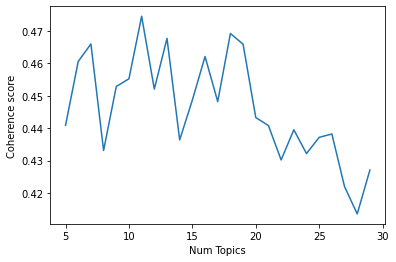

In [33]:
# Show graph
limit=30; start=5; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [34]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, 'Coherence: ', round(cv, 4))

Num Topics = 5 Coherence:  0.4409
Num Topics = 6 Coherence:  0.4606
Num Topics = 7 Coherence:  0.4659
Num Topics = 8 Coherence:  0.4331
Num Topics = 9 Coherence:  0.4528
Num Topics = 10 Coherence:  0.4552
Num Topics = 11 Coherence:  0.4745
Num Topics = 12 Coherence:  0.4521
Num Topics = 13 Coherence:  0.4677
Num Topics = 14 Coherence:  0.4364
Num Topics = 15 Coherence:  0.4487
Num Topics = 16 Coherence:  0.4621
Num Topics = 17 Coherence:  0.4482
Num Topics = 18 Coherence:  0.4692
Num Topics = 19 Coherence:  0.4659
Num Topics = 20 Coherence:  0.4433
Num Topics = 21 Coherence:  0.4408
Num Topics = 22 Coherence:  0.4302
Num Topics = 23 Coherence:  0.4395
Num Topics = 24 Coherence:  0.4322
Num Topics = 25 Coherence:  0.4372
Num Topics = 26 Coherence:  0.4382
Num Topics = 27 Coherence:  0.422
Num Topics = 28 Coherence:  0.4136
Num Topics = 29 Coherence:  0.4271


In [35]:
# Coherence for 11-topic model
print(coherence_values[6])

# Topics for 11-topic model
malletModel_11 = model_list[6]
model_topics_11 = malletModel_11.show_topics(formatted=False)
pprint(sorted(malletModel_11.print_topics(num_words=20)))

# Convert results to lda model format for visualization.
MalletLDA11 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_11)

# Visualize the topics
pyLDAvis.enable_notebook()
vis11 = pyLDAvis.gensim.prepare(MalletLDA11, corpus, id2word, sort_topics=False)
vis11

0.47447367517488337
[(0,
  '0.121*"day" + 0.084*"place" + 0.057*"winter" + 0.052*"time" + '
  '0.048*"summer" + 0.042*"town" + 0.034*"month" + 0.034*"weather" + '
  '0.025*"spring" + 0.020*"health" + 0.020*"account" + 0.016*"fall" + '
  '0.016*"snow" + 0.013*"business" + 0.012*"change" + 0.012*"deal" + '
  '0.011*"climate" + 0.010*"heat" + 0.010*"frost" + 0.009*"rain"'),
 (1,
  '0.062*"house" + 0.037*"room" + 0.021*"tree" + 0.020*"bed" + 0.020*"woman" + '
  '0.019*"road" + 0.019*"garden" + 0.019*"side" + 0.015*"fire" + 0.014*"table" '
  '+ 0.014*"lot" + 0.014*"order" + 0.013*"door" + 0.013*"building" + '
  '0.012*"lady" + 0.011*"description" + 0.011*"servant" + 0.011*"window" + '
  '0.010*"walk" + 0.010*"view"'),
 (2,
  '0.064*"land" + 0.052*"pound" + 0.050*"dollar" + 0.047*"money" + '
  '0.042*"year" + 0.035*"country" + 0.034*"acre" + 0.032*"farm" + 0.017*"cent" '
  '+ 0.016*"price" + 0.016*"crop" + 0.016*"wheat" + 0.012*"cost" + '
  '0.012*"bushel" + 0.012*"market" + 0.012*"farmer" +

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.241293  0.097288       1        1   9.042929
1      0.062841  0.117024       2        1   8.942038
2      0.260920  0.039700       3        1  10.002044
3      0.040036  0.025137       4        1   8.823394
4     -0.139143 -0.241153       5        1   8.961745
5     -0.147813  0.215384       6        1   9.036184
6     -0.017199 -0.219965       7        1   8.979686
7     -0.226242 -0.031468       8        1   8.866722
8      0.049665  0.198780       9        1   9.316638
9      0.254523  0.020415      10        1   9.211756
10     0.103703 -0.221144      11        1   8.816864, topic_info=        Term         Freq        Total Category  logprob  loglift
11    letter  1462.000000  1462.000000  Default  30.0000  30.0000
8        day  1463.000000  1463.000000  Default  29.0000  29.0000
55      time  1573.000000  1573.000000  Default  28.0000  28.0000
304    child   753.000000   753.000000  Default  27.0000  27.0000
112  country  1001.000000  1001.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
58     visit    97.776925   200.807211  Topic11  -4.3605   1.7088
28   account   103.952309   261.188724  Topic11  -4.2992   1.5072
110    woman    69.987693   225.370610  Topic11  -4.6948   1.2591
408   father    74.104617   260.090340  Topic11  -4.6377   1.1730
75   trouble    48.373847   229.240509  Topic11  -5.0642   0.8727

[710 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1018      9  1.003151     abundance
28        1  0.597269       account
28        4  0.003829       account
28       11  0.398180       account
271       5  1.004139  acquaintance
...     ...       ...           ...
715       9  0.996626          yard
59        3  0.353815          year
59       10  0.295010          year
59       11  0.350875          year
60        6  0.999255     yesterday

[830 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

## 2. Range of alphas

In [36]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for alpha in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=11, id2word=id2word, alpha=alpha, random_seed=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [37]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatizedNouns, 
                                                        start=1, 
                                                        limit=52, 
                                                        step=4)

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 74
total tokens: 85123
<10> LL/token: -8.40382
<20> LL/token: -8.09827
<30> LL/token: -7.97266
<40> LL/token: -7.87501

0	0.09091	letter time family brother health sister mother year home country friend day winter child wife week son summer work daughter 
1	0.09091	land country acre pound year farm money dollar work wheat crop day price bushel place winter potato house time wage 
2	0.09091	boat ship day cent land water foot pound luggage passenger country gold board building dollar town provision steam passage sail 
3	0.09091	letter time friend day health month happiness place sister kind pleasure country return life news father home brother write summer 
4	0.09091	letter time day week child mother home baby night month friend girl write boy house sister bed doctor kind daughter 
5	0.09091	day morning river night water house time tree wood side evening place horse road hour rain home land people church 
6	0.0

<310> LL/token: -7.62167
<320> LL/token: -7.62105
<330> LL/token: -7.61361
<340> LL/token: -7.6235

0	0.09091	letter time family brother friend mother year health sister country home son uncle child daughter wife day week winter work 
1	0.09091	land pound acre country year farm dollar money wheat work price crop bushel day house potato cent kind month winter 
2	0.09091	day boat ship board vessel store sea work water gold company passage cent luggage passenger foot man captain steam provision 
3	0.09091	letter time day friend place health month country happiness sister year summer pleasure kind news week weather home winter write 
4	0.09091	letter time week day child mother baby home girl night month sister friend bed place write work woman thing weather 
5	0.09091	day tree water morning river time wood house night town side place flower horse road home rain weather land room 
6	0.09091	life letter heart year child friend time mother death sorrow day husband home mind man trouble world 

<610> LL/token: -7.60536
<620> LL/token: -7.60812
<630> LL/token: -7.60649
<640> LL/token: -7.59976

0	0.09091	time letter brother family friend mother year health sister home child country uncle day son week wife daughter work month 
1	0.09091	pound land acre country dollar year farm money wheat work price day crop bushel house potato kind market place cent 
2	0.09091	day boat ship board gold foot water sea passage cent luggage passenger vessel steam company man sail work provision captain 
3	0.09091	letter time day friend country place month health weather summer winter sister home news happiness year kind pleasure week write 
4	0.09091	letter time week day child mother baby girl night home sister month bed news friend weather write thing wife dollar 
5	0.09091	day tree river wood morning water house time night town place horse side rain road flower home frost room snow 
6	0.09091	heart friend life year letter time death child mother father husband day home sorrow man world trouble s

<910> LL/token: -7.6069
<920> LL/token: -7.60521
<930> LL/token: -7.60334
<940> LL/token: -7.59499

0	0.09091	letter time brother family mother friend health sister year home day uncle child country son week month wife daughter work 
1	0.09091	pound land acre country year dollar farm money wheat work price crop day bushel house wood potato market farmer cent 
2	0.09091	day ship boat foot work board gold luggage water passenger vessel company passage sail steam sea cent man provision captain 
3	0.09091	letter time day health friend country place month winter summer year sister weather week news pleasure happiness return home kind 
4	0.09091	letter time week baby child girl mother day month night friend sister home room boy daughter dollar woman bed thing 
5	0.09091	day tree morning river water wood house night side town place time rain horse road land room flower frost bed 
6	0.09091	heart friend life child year letter time death day world son mother trial family home husband sorrow man

<210> LL/token: -7.73196
<220> LL/token: -7.7334
<230> LL/token: -7.72178
<240> LL/token: -7.72082

0	0.45455	letter time day week home month friend sister news place write night year baby health mother weather writing picture summer 
1	0.45455	day place town house church wood tree river road home evening winter frost time snow building weather people morning distance 
2	0.45455	pound land acre year farm country dollar price crop wheat money house bushel market farmer potato seed horse spring winter 
3	0.45455	brother letter family time friend mother sister health child year daughter son wife uncle aunt home father winter cousin day 
4	0.45455	week child school boy tea bed room home time today house visit day morning store island yesterday evening girl thing 
5	0.45455	child day flower week mother heart doctor kind baby time bed death home life wife fever pain illness anxiety month 
6	0.45455	book work hand paper letter copy woman thing life boy pen story people dollar room history acc

<510> LL/token: -7.70378
<520> LL/token: -7.70214
<530> LL/token: -7.70112
<540> LL/token: -7.70574

0	0.45455	letter time day week home month news friend weather write health place sister pleasure summer baby mother winter return happiness 
1	0.45455	day place town house church tree wood road river home morning winter frost street building people time garden side snow 
2	0.45455	pound land acre year farm country dollar money crop price wheat bushel farmer market work potato house horse seed wood 
3	0.45455	brother letter family friend time mother sister year health child son home uncle wife daughter aunt father day cousin winter 
4	0.45455	child week room school day house boy bed evening home tea today yesterday visit time table girl morning night island 
5	0.45455	child day heart time week kind mother friend baby sister wife flower girl death doctor dollar month bed life trouble 
6	0.45455	book work letter paper copy life hand boy pen thing story woman history picture age question ch

<810> LL/token: -7.70464
<820> LL/token: -7.7033
<830> LL/token: -7.70406
<840> LL/token: -7.7012

0	0.45455	letter time day week friend home month news place health write sister mother pleasure night return weather summer happiness opportunity 
1	0.45455	day town place house tree winter road wood garden weather flower church snow people river frost building home street time 
2	0.45455	land pound acre farm country year dollar money price crop wheat bushel farmer potato wood winter market horse work cow 
3	0.45455	brother letter family time friend mother sister health year child uncle home wife son aunt daughter country cousin winter father 
4	0.45455	child week school room boy home house day today church evening tea bed visit morning yesterday clock girl time dinner 
5	0.45455	child day mother girl baby heart death week year sister wife daughter friend kind doctor bed husband month life trouble 
6	0.45455	book work letter paper life hand copy thing pen story woman spirit history accoun

<70> LL/token: -7.81149
<80> LL/token: -7.79051
<90> LL/token: -7.77757

0	0.81818	day winter weather week night town time hour place month snow morning evening summer clock house road yesterday return leave 
1	0.81818	work dollar money year day country time month house pound summer place business winter week board pay wage kind expense 
2	0.81818	land pound acre farm country year price crop wheat cent wood bushel potato farmer foot horse person lot market spring 
3	0.81818	letter time book paper life health happiness pleasure copy friend interest thing return peace month news world mind fear attention 
4	0.81818	letter brother time family friend mother health sister daughter child son home uncle month father aunt write wife cousin year 
5	0.81818	house room flower water bed side garden tree river morning rain kind wood window spring walk fall lady eye head 
6	0.81818	time work hand man day pen gentleman house account bank fire business home character law week term earth trouble parent

<360> LL/token: -7.68824
<370> LL/token: -7.69901
<380> LL/token: -7.69428
<390> LL/token: -7.68941

0	0.81818	day time winter week weather summer month town place health snow night spring house home fever thing heat frost rain 
1	0.81818	dollar work money day year pound month cent time country week business place board pay wage man house rate property 
2	0.81818	land acre pound farm country year price crop wheat bushel potato market farmer horse cow kind wood family foot person 
3	0.81818	letter time book thing pleasure return paper news copy kind spirit friend happiness picture peace prayer manner darling truth trust 
4	0.81818	letter brother time friend sister mother family home health write uncle father son cousin year daughter day month wife aunt 
5	0.81818	room house flower morning side bed wood tree water garden river window door mile lady road dinner place view bank 
6	0.81818	hand work life mind time interest pen man home gentleman term attention fire city paper business troub

<660> LL/token: -7.68354
<670> LL/token: -7.68142
<680> LL/token: -7.6833
<690> LL/token: -7.68284

0	0.81818	day time winter summer week weather month health place house town snow spring year rain home frost heat business fall 
1	0.81818	dollar work money day pound year country place house cent month business board week wage man time pay situation account 
2	0.81818	land acre country pound farm year price crop wheat bushel market potato farmer horse wood cow lot flour mill spring 
3	0.81818	letter time return pleasure news thing friend picture happiness write writing mine darling trust answer sister father account kind peace 
4	0.81818	letter brother time friend mother family sister home health uncle child wife son cousin father daughter aunt write year month 
5	0.81818	room house flower tree morning side wood river place water fire door garden town window building night view lady road 
6	0.81818	book work life mind hand interest paper copy matter term city story pen gentleman success

<960> LL/token: -7.67766
<970> LL/token: -7.68212
<980> LL/token: -7.68636
<990> LL/token: -7.68131

0	0.81818	day winter time summer weather health week month place spring snow year town business home night rain house heat frost 
1	0.81818	work dollar money day year time pound place month business man week board house home cent wage pay situation country 
2	0.81818	land pound acre country farm year price crop wheat bushel potato market money farmer horse wood cow kind flour seed 
3	0.81818	letter time friend news pleasure place happiness thing sister return home month write care picture opportunity mail writing world trust 
4	0.81818	brother letter friend family mother time sister health home uncle year father cousin daughter wife son aunt child death day 
5	0.81818	room house side tree morning flower river wood water fire garden town window door bed building mile view people road 
6	0.81818	book life work hand mind paper copy interest power spirit pen story truth matter term thing su


0	1.18182	family brother child mother friend sister wife son daughter home year letter health aunt uncle father girl death cousin visit 
1	1.18182	day time man home work head company tea thing store gold office river year people provision water horse good town 
2	1.18182	land pound acre farm year country dollar cent price crop wheat house bushel market farmer money place person wage potato 
3	1.18182	book work paper life thing copy city street gentleman mind question story town earth spirit pen truth success people bank 
4	1.18182	time day winter week month summer health weather place home snow trouble doctor spring bed deal house work fever thing 
5	1.18182	day morning evening night week boat town clock yesterday side ship hour sea captain vessel water weather board visit passage 
6	1.18182	house room tree flower garden foot wood fire bed door seed night water window girl ground hand kitchen building spot 
7	1.18182	letter time week news home write sister baby mother day month friend

<510> LL/token: -7.67733
<520> LL/token: -7.67519
<530> LL/token: -7.67988
<540> LL/token: -7.68802

0	1.18182	brother family child mother friend sister wife son daughter letter year health home aunt uncle kind father death cousin girl 
1	1.18182	work day man time company thing head kind store board gold people mine provision year water war month cotton pork 
2	1.18182	pound land dollar acre year farm country money price crop wheat cent bushel farmer market potato house wood place lot 
3	1.18182	book work paper life thing copy letter dollar pen creature hand story woman truth position question eye term world history 
4	1.18182	day time winter summer week weather month health house bed snow doctor spring place country fever trouble heat frost deal 
5	1.18182	day morning night evening week boat town river hour clock water yesterday ship side sea horse dinner place passage captain 
6	1.18182	house room tree flower garden wood fire bed door night woman window walk water foot street seed bu

<810> LL/token: -7.66179
<820> LL/token: -7.66499
<830> LL/token: -7.66281
<840> LL/token: -7.66594

0	1.18182	brother family child mother friend sister wife son daughter year health letter aunt uncle death father kind home cousin husband 
1	1.18182	work man time thing kind day head company people store gold year provision mine board month clothe box dress cotton 
2	1.18182	pound land dollar acre country farm year money price crop wheat cent bushel market potato farmer wage horse house cost 
3	1.18182	book work paper life dollar copy thing pen woman creature interest gentleman story truth mind position account success hand picture 
4	1.18182	day time winter week summer month weather health snow bed doctor country house deal fever account spring frost heat town 
5	1.18182	day morning town night river boat side water evening sea ship vessel week hour captain road clock passage place horse 
6	1.18182	room house tree garden flower wood fire bed door foot building hand window street water d

<60> LL/token: -7.87087
<70> LL/token: -7.83171
<80> LL/token: -7.80514
<90> LL/token: -7.78389

0	1.54545	people summer country place winter year hand manner health house thing matter spring time mind trouble heat situation change fear 
1	1.54545	land pound country acre farm year dollar money cent price crop wheat bushel market potato farmer lot cow cost flour 
2	1.54545	town day house morning water boat side end sea place return time person night gold head passage store tea fall 
3	1.54545	brother friend mother sister letter time family father health wife month home death kind year son answer write law word 
4	1.54545	letter time friend news uncle aunt pleasure home return happiness paper blessing write cousin peace trust picture rest health mail 
5	1.54545	house foot wood tree water flower garden morning hour ship side road building fire room river frost seed mile ground 
6	1.54545	girl bed week room baby hand night child thing woman boy pen head trouble anxiety pain dress visit hou

<360> LL/token: -7.66341
<370> LL/token: -7.67504
<380> LL/token: -7.6743
<390> LL/token: -7.67148

0	1.54545	country people place summer winter hand manner thing town person time case house year heat state world comfort climate question 
1	1.54545	land pound dollar acre year farm country money price crop wheat cent lot bushel market potato farmer cost cow kind 
2	1.54545	day town morning boat night ship water house sea river board evening vessel end business yesterday street passage arrival voyage 
3	1.54545	brother family friend sister mother year wife son father child health death husband time life letter kind word account living 
4	1.54545	letter time friend news write aunt uncle pleasure daughter happiness home return writing cousin health month answer picture peace kind 
5	1.54545	house tree foot wood water garden room side fire flower building description horse window road mile ground seed river bread 
6	1.54545	girl bed baby thing hand night woman room child kind week boy daugh

<660> LL/token: -7.64199
<670> LL/token: -7.64032
<680> LL/token: -7.64379
<690> LL/token: -7.6518

0	1.54545	people country place hand person thing manner state situation difficulty mind case time opinion world matter question idea doubt town 
1	1.54545	land pound country year dollar acre farm money cent price crop wheat bushel market farmer lot wage cost potato work 
2	1.54545	day night water town boat morning board ship river hour house sea side evening vessel passage street place voyage luggage 
3	1.54545	family brother mother friend year sister wife child son health daughter death uncle father home husband aunt house life account 
4	1.54545	letter time friend news write sister home pleasure return happiness month picture writing opportunity father answer kind peace trust aunt 
5	1.54545	house tree foot wood room flower garden fire road water window building description view bread door side horse spring spot 
6	1.54545	girl baby bed child night thing woman week hand mother trouble 


0	1.54545	country people place hand thing person manner difficulty situation state opinion matter mind idea climate appearance respect question attention emigrant 
1	1.54545	land pound dollar year country acre farm money cent price crop wheat lot cost bushel market farmer wage work cow 
2	1.54545	day town river boat water ship morning board night place sea evening house vessel store side hour number arrival passage 
3	1.54545	family brother mother friend year child son wife daughter sister health death aunt home uncle father letter cousin husband boy 
4	1.54545	letter time friend news sister write pleasure opportunity happiness month answer home writing picture return father care peace kind kindness 
5	1.54545	house tree wood room foot garden water flower road seed door building window side horse fire mile spot ground view 
6	1.54545	girl night baby bed week child thing woman room trouble call head kind hand fever mother dollar pain dress hair 
7	1.54545	day time winter summer month w

<210> LL/token: -7.65257
<220> LL/token: -7.65002
<230> LL/token: -7.65846
<240> LL/token: -7.65323

0	1.90909	day time winter month summer weather week health deal home snow year spring change leave heat frost rain pleasure journey 
1	1.90909	day week town house school place church home child time tea store today servant island head yesterday distance dinner pork 
2	1.90909	pound land dollar country acre money farm year cent price crop wheat work cost bushel market potato farmer wage cow 
3	1.90909	life world year friend heart husband man comfort matter government trial mind power peace case war trouble loss rest kind 
4	1.90909	family child brother mother wife son sister daughter year health friend death baby aunt uncle girl home boy doctor cousin 
5	1.90909	wood house tree side place land water river garden lot road number horse seed mill bank mile flower building length 
6	1.90909	work hand paper thing man mine kind people account mind fire gold interest pay dress table box trouble

<510> LL/token: -7.64115
<520> LL/token: -7.64865
<530> LL/token: -7.651
<540> LL/token: -7.64946

0	1.90909	day time winter summer month week weather health home place year deal spring snow night fall work air heat frost 
1	1.90909	week day town child school house home church time evening place store yesterday visit today baby dinner island tea boy 
2	1.90909	pound land dollar year money country acre farm cent price crop wheat bushel potato market farmer cost wage person board 
3	1.90909	life world year heart friend man mind trouble comfort trial peace war husband sorrow death loss parent pain matter government 
4	1.90909	family child brother mother wife son daughter sister year health death aunt uncle girl friend husband home doctor baby cousin 
5	1.90909	house place wood tree lot river land garden horse water road building seed side foot flower description mill mile bank 
6	1.90909	work paper thing hand man kind people mind head gold mine company pay call dress table cotton stand bo

<810> LL/token: -7.65612
<820> LL/token: -7.65136
<830> LL/token: -7.64261
<840> LL/token: -7.64883

0	1.90909	day time month winter summer week weather place health home snow deal spring work year night change rain pleasure fever 
1	1.90909	week day child town home school baby church evening boy store visit today yesterday girl tea dinner island house tomorrow 
2	1.90909	pound dollar year land acre country money farm cent price crop wheat cost bushel market farmer potato wage cow work 
3	1.90909	life man heart world friend year mind trouble matter trial case war care loss husband power comfort sorrow spirit anxiety 
4	1.90909	family child brother mother sister wife son daughter health death year friend aunt uncle girl cousin husband doctor boy account 
5	1.90909	house land wood tree river foot place road garden water horse side lot town building flower mill spring number seed 
6	1.90909	work hand thing kind people company gold mind provision man mine lot servant clothe dress box call 

<60> LL/token: -7.84133
<70> LL/token: -7.80396
<80> LL/token: -7.77473
<90> LL/token: -7.74959

0	2.27273	child family brother mother sister wife home girl daughter son boy friend uncle aunt week father death baby visit writing 
1	2.27273	week town house place day school church river wood evening road store today doctor dinner island building child distance boy 
2	2.27273	land pound dollar country year acre money farm cent price crop wheat cost bushel market farmer wage horse foot person 
3	2.27273	country people business man work interest state government money city law matter fact side expense difficulty capital war account respect 
4	2.27273	board water boat thing ship servant lot hour sea captain woman tea pay passage provision afternoon employment clothe yesterday journey 
5	2.27273	letter time day news home friend write cousin picture mail kind pleasure leave pen month tomorrow prayer deal advice spirit 
6	2.27273	day time winter week weather spring thing summer house place mont

<360> LL/token: -7.63628
<370> LL/token: -7.64587
<380> LL/token: -7.64502
<390> LL/token: -7.63961

0	2.27273	child family brother sister mother wife friend son daughter health year father girl death aunt uncle boy home cousin doctor 
1	2.27273	place town day week house school church home evening river side road child boy clock dinner island building number distance 
2	2.27273	land pound year country dollar acre farm money price crop wheat cent cost bushel market farmer wage person house cow 
3	2.27273	country people business man state money city office interest government attention thing matter gentleman party fact law account difficulty war 
4	2.27273	water thing board boat ship sea captain tea vessel gold servant pay hour passage provision piece foot dress clothe woman 
5	2.27273	letter time home friend news write picture opportunity answer month mail pleasure writing mother account health pen line darling care 
6	2.27273	day winter summer weather spring tree house time month kind 

<660> LL/token: -7.64855
<670> LL/token: -7.6416
<680> LL/token: -7.64874
<690> LL/token: -7.65267

0	2.27273	child family brother mother sister health wife son daughter year friend death father home aunt boy uncle cousin girl trouble 
1	2.27273	town day evening house school place church week river child morning clock side home dinner island building road horse distance 
2	2.27273	land pound country dollar acre farm year money price crop wheat cent bushel potato market farmer wage cost cow person 
3	2.27273	country people year man business state government interest case office war difficulty city opinion matter land capital law respect emigrant 
4	2.27273	water board boat thing day ship sea vessel store gold woman passage provision piece foot dress pay clothe box good 
5	2.27273	letter time home news write week friend answer account thing opportunity picture mail sister writing kind return health mother pleasure 
6	2.27273	day winter summer weather house tree month spring flower garden

<960> LL/token: -7.63159
<970> LL/token: -7.6355
<980> LL/token: -7.64007
<990> LL/token: -7.64209

0	2.27273	child family brother mother health sister wife son year daughter boy friend death aunt uncle cousin father girl home husband 
1	2.27273	town day place school house church morning river week home evening side clock dinner island building road meeting street child 
2	2.27273	land pound dollar acre country farm year money price crop wheat house bushel market farmer wage cost cent horse cow 
3	2.27273	country people year business man state difficulty war interest office person case opinion account land government property capital money matter 
4	2.27273	water board thing boat day ship sea vessel gold store captain pay passage provision foot kind clothe woman box good 
5	2.27273	letter time home news write week sister friend thing mother answer picture father account opportunity kind mail writing month deal 
6	2.27273	day winter summer weather tree time spring month flower house gar

<210> LL/token: -7.66348
<220> LL/token: -7.65593
<230> LL/token: -7.66564
<240> LL/token: -7.65499

0	2.63636	girl woman school boy hand visit child servant spirit table book manner tomorrow home today lot fear view sort face 
1	2.63636	letter time week home day news write answer picture opportunity writing mail account word return paper leave care address folk 
2	2.63636	country land year acre farm wood house tree crop wheat place pound bushel farmer horse road market money lot person 
3	2.63636	work people man book business country paper city office copy government building war interest law bank story earth thousand power 
4	2.63636	day morning night evening room town water week house river church bed side yesterday boat clock hour dinner captain ship 
5	2.63636	day place company person night people eye sea idea head number lady fact island mine gentleman question dress illness voyage 
6	2.63636	life mind thing hand case difficulty matter account trial pen anxiety age character sick

<490> LL/token: -7.64318

0	2.63636	child boy girl woman school hand visit home today book yesterday fear spirit table baby tomorrow picture sort lot dress 
1	2.63636	letter time day home news write week account answer opportunity mail writing paper return word month pleasure address reason leave 
2	2.63636	country land year acre farm tree pound wood crop wheat price person horse bushel farmer market lot money cow house 
3	2.63636	man work people business book interest year paper country copy government office war city law opinion party story thousand earth 
4	2.63636	morning house room evening bed night day water church town side boat clock hour river dinner door ship vessel captain 
5	2.63636	day place week night town people company head person island sea gold number call street meeting fact rest question eye 
6	2.63636	life mind thing hand trouble case difficulty people trial change world account anxiety pen age matter property character service parent 
7	2.63636	family brother moth

<760> LL/token: -7.6394
<770> LL/token: -7.64351
<780> LL/token: -7.64065
<790> LL/token: -7.6431

0	2.63636	child girl boy baby school week thing woman visit today night yesterday home tomorrow hand book lot table dress morning 
1	2.63636	letter time week home news write day account answer opportunity word return mail writing month paper pleasure picture sister leave 
2	2.63636	country land year acre farm wood crop wheat money pound bushel market farmer tree lot horse road cow mill stock 
3	2.63636	work man people book interest paper copy country government business war year city party opinion law office state bank story 
4	2.63636	day room bed morning house water side boat river night evening clock ship hour sea door dinner captain vessel passage 
5	2.63636	day place town week church company person night evening people head island gold meeting fact number street house fire question 
6	2.63636	life hand mind people time trouble case thing difficulty trial spirit anxiety property comfo

<10> LL/token: -8.99182
<20> LL/token: -8.53957
<30> LL/token: -8.26608
<40> LL/token: -8.08261

0	3	people time business year home manner thing work town island city difficulty war street country paper leave kind house comfort 
1	3	day week night morning weather evening river ship hour mail town dinner rain captain board winter time air neighbourhood place 
2	3	land pound dollar money acre farm year lot country cent price wheat crop horse cost bushel potato wood seed board 
3	3	sister family mother friend wife heart father daughter death husband health uncle answer account life cousin letter brother aunt world 
4	3	letter time friend home write visit week book thing son writing picture copy word month church child acquaintance news school 
5	3	child boy baby flower store week yesterday clock doctor home today paper school mother bed tomorrow place nature son church 
6	3	house room bed work fire book woman bank building pleasure table hand door prospect gold view order parent window in

<310> LL/token: -7.62218
<320> LL/token: -7.62376
<330> LL/token: -7.61927
<340> LL/token: -7.61417

0	3	people work business man year city town interest paper government war opinion difficulty meeting office law character change manner question 
1	3	day night morning town church side hour river boat water evening clock board captain rain vessel fall horse road passage 
2	3	pound land dollar money acre farm year cent price crop wheat lot cost bushel potato farmer market wage pay cow 
3	3	family brother friend mother sister wife year son father death daughter child husband health aunt uncle kind cousin heart loss 
4	3	letter time friend news write pleasure home answer sister paper picture thing word mail writing kind acquaintance change respect prayer 
5	3	week child boy home girl baby school visit yesterday flower store today evening doctor tomorrow anxiety fear illness trouble island 
6	3	house room bed woman fire table door lady trouble heat order window tea walk manner servant hand 

<610> LL/token: -7.61323
<620> LL/token: -7.61322
<630> LL/token: -7.60542
<640> LL/token: -7.6061

0	3	people year man business interest difficulty matter city government war reason party meeting law change manner mind doubt office state 
1	3	day night town morning church side river hour evening boat water clock captain place vessel board road passage horse ship 
2	3	pound dollar land money acre year farm cent price crop wheat cost bushel potato market work farmer wage cow horse 
3	3	family brother mother year sister friend wife son father death daughter child husband aunt uncle health kind cousin blessing account 
4	3	letter time friend news write sister home answer picture opportunity mail writing paper thing place prayer return leave address mine 
5	3	child week boy girl home baby school visit flower today yesterday doctor trouble evening fear tomorrow change care call pain 
6	3	house room bed woman hand fire table dinner door order lady servant window tea head view street walk bre

<910> LL/token: -7.60653
<920> LL/token: -7.6059
<930> LL/token: -7.60392
<940> LL/token: -7.60323

0	3	people year man business city matter interest government office war company case party account mind law expense doubt thousand duty 
1	3	day town night church morning river place side evening boat water clock board ship captain vessel hour sea fall passage 
2	3	pound dollar land money acre farm year price crop cent wheat cost bushel market farmer wage board cow horse house 
3	3	family brother mother friend sister wife year health son death daughter father kind child aunt uncle husband cousin blessing loss 
4	3	letter time friend home news write sister place answer picture opportunity thing writing care mail darling prayer paper word return 
5	3	child week boy home girl baby school visit flower today store doctor trouble call fear yesterday anxiety tomorrow spirit pain 
6	3	house room bed night woman hand fire table dinner order morning door servant hour lady window walk street girl t

<190> LL/token: -7.66487

0	3.36364	room home house boy visit girl clock difficulty fire table dinner door woman head servant tea man lot night box 
1	3.36364	work book thing business paper interest year woman mail fear matter city gentleman sea order attention lady character dress story 
2	3.36364	land pound dollar year acre farm money country cent price crop wheat cost bushel potato market farmer board wage cow 
3	3.36364	town house water wood side tree foot place river church road boat fall number horse bank building end distance morning 
4	3.36364	week night bed evening school morning baby day thing yesterday ship child doctor hour boy island board captain vessel passage 
5	3.36364	day time winter weather week spring flower garden snow mine tomorrow rain frost return call fellow store walk leave likeness 
6	3.36364	brother friend mother hand sister father death letter life answer mind heart kind copy power law pen living writing paper 
7	3.36364	letter time home health month daught


0	3.36364	home room house girl woman visit bed fire hour table tea dinner door night boy servant lot hand sort bread 
1	3.36364	work book paper thing interest copy business gentleman matter account term fear question character story eye cotton pay success truth 
2	3.36364	land pound dollar acre farm year money cent price crop country wheat work cost bushel potato market farmer board wage 
3	3.36364	town house water wood side tree foot river church road boat number place horse store bank building end fall morning 
4	3.36364	week night evening school morning day child baby yesterday today ship doctor thing clock sea island board bed captain boy 
5	3.36364	day winter time weather place week spring flower garden snow mine head call rain spirit leave air frost journey return 
6	3.36364	friend brother family mother sister father hand death kind son wife deal boy answer living line address life sickness parent 
7	3.36364	letter time health home month news write week aunt uncle cousin picture


0	3.36364	hand room girl woman house bed home boy fire visit table dinner door night servant window walk hour sort bread 
1	3.36364	work book paper thing mind interest life matter copy business pen gentleman account term character question pleasure story cotton feeling 
2	3.36364	land pound dollar acre year farm money cent price crop wheat cost bushel potato market farmer kind pork wage cow 
3	3.36364	town house water wood tree foot river side road boat place church horse building lot hour distance fall morning store 
4	3.36364	day night week child evening school morning yesterday ship today thing island sea captain vessel church lady boy baby clock 
5	3.36364	day winter time week weather summer place spring flower garden account snow mine rain deal air frost description leave spirit 
6	3.36364	friend family brother mother sister son father year daughter wife death kind answer living line boy address husband parent doctor 
7	3.36364	letter time home health month news write week aunt u


0	3.36364	room house hand girl bed woman boy visit fire home servant table night dinner store door window board walk tea 
1	3.36364	work book paper thing life mind spirit copy gentleman hand interest pen order term eye story business pay truth success 
2	3.36364	land pound dollar year acre farm money cent price crop wheat cost bushel potato market farmer work wage kind cow 
3	3.36364	town house water tree foot wood river place side boat road lot church horse building morning street distance mill view 
4	3.36364	day week night school morning evening child yesterday baby thing today clock ship head island sea captain vessel boy church 
5	3.36364	day time winter summer weather place spring week deal garden snow account mine flower rain heat frost air health pleasure 
6	3.36364	friend family brother sister mother health year son father daughter wife kind death answer word boy living line acquaintance address 
7	3.36364	letter time home month week news write return aunt uncle cousin pictur

<190> LL/token: -7.666

0	3.72727	land pound dollar country money year acre farm cent price crop wheat cost bushel market farmer wage potato person horse 
1	3.72727	house place water wood spring side tree church river lot road boat state fall government bank building cow distance field 
2	3.72727	day week night morning weather home time yesterday today hour clock return account island deal rain prayer journey walk dinner 
3	3.72727	time month winter summer place town house garden day city climate respect difficulty attention property fever world situation heat frost 
4	3.72727	letter friend family brother health time kind year sister answer pleasure opportunity happiness word father son blessing trust peace law 
5	3.72727	life book child paper school uncle flower world age mind spirit heart care home eye boy fear interest soul picture 
6	3.72727	hand room bed trouble rest time store account child case doctor fire table thing boy door pen servant anxiety sickness 
7	3.72727	work country

<460> LL/token: -7.60214
<470> LL/token: -7.59812
<480> LL/token: -7.59839
<490> LL/token: -7.59782

0	3.72727	pound dollar land money year country acre farm cent price crop wheat cost bushel market farmer wage person cow flour 
1	3.72727	town place wood water side house tree lot river road boat land number city horse government foot building distance fall 
2	3.72727	day week night morning home weather hour yesterday visit today clock return account dinner island rain journey walk afternoon leave 
3	3.72727	time month winter summer country place day spring garden snow climate attention town seed fever heat street frost question week 
4	3.72727	letter friend time brother health sister family kind answer account father happiness opportunity word year pleasure blessing respect peace acquaintance 
5	3.72727	life book paper world heart mind flower age care copy fear eye pleasure nature spirit creature comfort soul trust truth 
6	3.72727	child hand house room bed trouble woman boy store doct

<710> LL/token: -7.60481
<720> LL/token: -7.60728
<730> LL/token: -7.60309
<740> LL/token: -7.60551

0	3.72727	land pound dollar money country acre farm year cent price crop wheat cost bushel market farmer wage cow person potato 
1	3.72727	town house place water wood side tree river lot road boat horse number fall building distance field street mill mile 
2	3.72727	day week night morning evening hour yesterday visit home today clock weather return dinner island rain leave walk journey account 
3	3.72727	time month winter year summer country day spring place weather health garden deal snow climate home attention heat frost air 
4	3.72727	letter friend time brother sister health pleasure account kind answer father opportunity happiness word writing blessing peace kindness line mine 
5	3.72727	life book world paper heart mind flower age copy eye spirit nature creature fear care soul face power story interest 
6	3.72727	hand child room bed trouble woman house boy doctor store fire table he

<980> LL/token: -7.59143
<990> LL/token: -7.58983

0	3.72727	land pound country dollar acre year money farm cent price crop wheat cost bushel person market farmer wage cow potato 
1	3.72727	town place house water side tree wood river road boat number lot horse building foot street distance mill mile view 
2	3.72727	day week night morning home evening hour yesterday visit today clock return dinner tomorrow rain rest walk afternoon account journey 
3	3.72727	time month winter year summer health day spring weather week garden deal country snow change climate seed attention frost air 
4	3.72727	letter time friend brother sister pleasure account answer health kind opportunity happiness word writing respect peace return kindness trust line 
5	3.72727	life book world paper heart mind flower age care copy eye power pen nature creature fear spirit soul face story 
6	3.72727	hand room house child bed trouble woman boy store head doctor fire table door girl window rest fear sickness pain 
7	3.727

<210> LL/token: -7.65441
<220> LL/token: -7.64252
<230> LL/token: -7.64011
<240> LL/token: -7.62288

0	4.09091	child thing boy girl week school aunt uncle daughter fear tea visit trouble kind account table afternoon journey cotton hair 
1	4.09091	week home time place day town church evening yesterday return today dinner island order pleasure lot distance service walk tomorrow 
2	4.09091	land pound country acre farm dollar money year price crop wheat bushel market potato farmer wage cow cost lot expense 
3	4.09091	country people person river state city house business number matter gentleman town bank building law attention end description place opinion 
4	4.09091	friend month wife health baby husband sister world change rest home comfort happiness kind trust darling heart doctor blessing trial 
5	4.09091	day night morning weather hour side water tree wood road fire fall leave horse rain clock climate fellow mile illness 
6	4.09091	work book man paper dollar month time money store compan

<470> LL/token: -7.60141
<480> LL/token: -7.60184
<490> LL/token: -7.60061

0	4.09091	child boy girl thing week daughter school aunt uncle trouble account fear woman visit kind today servant table arm afternoon 
1	4.09091	time home week day place town church evening yesterday return dinner island order tomorrow distance service walk meeting visit head 
2	4.09091	land pound dollar acre farm money country year price crop wheat bushel wood market lot farmer potato wage cost person 
3	4.09091	country people business person city manner state account number gentleman bank building attention case law opinion street description character plan 
4	4.09091	friend wife baby husband world health son rest comfort happiness month doctor trust darling home blessing kind trial heart life 
5	4.09091	day night morning weather side hour river road tree fall water fire wood clock rain air arrival view mile climate 
6	4.09091	work book paper house man money year dollar call interest pay company copy pen gol


0	4.09091	child boy girl week daughter trouble thing school aunt uncle bed fear today situation visit woman term afternoon servant yesterday 
1	4.09091	home time week place day town house return church evening pleasure dinner island order visit yesterday walk journey meeting service 
2	4.09091	land pound acre farm year dollar country money price crop wheat bushel potato market farmer lot wage horse wood cost 
3	4.09091	country people person state city manner number office government law bank building climate party opinion case street character idea respect 
4	4.09091	friend wife baby kind husband world death heart son sister comfort happiness doctor trust darling rest blessing head trial home 
5	4.09091	day night morning hour river side road tree wood fire water clock fall rain lady weather air view mile fellow 
6	4.09091	work book man paper dollar business money interest company pay mine account copy expense pen fortune reason story share debt 
7	4.09091	letter time brother mother si

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 74
total tokens: 85123
<10> LL/token: -9.04044
<20> LL/token: -8.63904
<30> LL/token: -8.35945
<40> LL/token: -8.17152

0	4.45455	water day place river morning boat town side cent ship horse clock person pork number fall yesterday captain sea gold 
1	4.45455	week weather child baby evening time church home girl place today morning mail dinner letter return fellow island office walk 
2	4.45455	pound dollar money country man business year house work month price week spring pay town expense head kind call neighbourhood 
3	4.45455	life book paper work friend husband account thing world copy case trust age pen property trouble woman care term question 
4	4.45455	letter day time mother home friend hour aunt visit daughter heart girl night week month sister room kindness kind child 
5	4.45455	land acre farm year wood tree lot crop road wheat garden person bushel cost potato bank seed half house distance 
6	4.45455	l

<260> LL/token: -7.63418
<270> LL/token: -7.62438
<280> LL/token: -7.61768
<290> LL/token: -7.61941

0	4.45455	water side river company boat ship hour board sea end morning fall captain vessel number gold passage provision view mile 
1	4.45455	week child boy room bed baby evening church morning school girl yesterday home cousin night today clock mail dinner tomorrow 
2	4.45455	pound dollar year money house work business place cent store price pay cost bank half expense board building property call 
3	4.45455	work book life paper world husband age interest city gentleman copy account attention pen trust term character question sorrow case 
4	4.45455	letter time home mother week daughter news aunt uncle visit girl picture word writing child fever darling weather face glad_hear 
5	4.45455	land acre farm wood tree lot crop year wheat garden foot horse road bushel potato market farmer seed cow field 
6	4.45455	hand thing heart mind trouble time woman life return pleasure care spirit rest co

<510> LL/token: -7.5892
<520> LL/token: -7.59216
<530> LL/token: -7.5902
<540> LL/token: -7.59785

0	4.45455	water side river boat ship end company hour morning sea captain thing vessel person fellow gold head number passage provision 
1	4.45455	child week boy room bed baby school girl evening church night morning home yesterday visit today clock tea dinner table 
2	4.45455	pound dollar money year house business place work cent store board half pay cost situation expense bank building price property 
3	4.45455	work book paper life age interest trust account copy gentleman city attention woman pen prospect case fact nature term creature 
4	4.45455	letter time home week news write return aunt picture opportunity writing mail darling month mother word girl fever answer thing 
5	4.45455	land acre farm country wood tree crop wheat horse foot lot year bushel potato market farmer seed spring cow piece 
6	4.45455	hand heart life mind trouble world husband care thing spirit comfort happiness pl

<770> LL/token: -7.60395
<780> LL/token: -7.59023
<790> LL/token: -7.59498

0	4.45455	water side river boat end ship hour night sea board morning captain vessel evening gold passage provision person arrival day 
1	4.45455	child week room boy bed girl school baby visit morning church night evening yesterday home today clock table dinner tomorrow 
2	4.45455	pound dollar money year business house work person cent price store half pay cost expense pork board wage place property 
3	4.45455	work book paper woman age gentleman case copy interest life party prospect thing nature creature pen fortune city term story 
4	4.45455	letter time home week news write thing return picture opportunity leave mail writing darling friend answer fever mother folk month 
5	4.45455	land country acre farm wood tree crop wheat foot bushel potato market farmer lot seed horse cow road garden year 
6	4.45455	life hand heart mind world husband trouble care rest comfort pleasure happiness change spirit fear trial pea

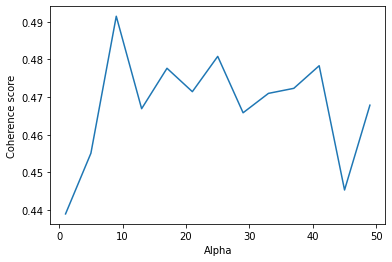

In [38]:
# Show graph
limit=50; start=1; step=4;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Alpha")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [39]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Alpha =", m, 'Coherence: ', round(cv, 4))

Alpha = 1 Coherence:  0.439
Alpha = 5 Coherence:  0.4551
Alpha = 9 Coherence:  0.4915
Alpha = 13 Coherence:  0.4669
Alpha = 17 Coherence:  0.4777
Alpha = 21 Coherence:  0.4714
Alpha = 25 Coherence:  0.4808
Alpha = 29 Coherence:  0.4658
Alpha = 33 Coherence:  0.471
Alpha = 37 Coherence:  0.4723
Alpha = 41 Coherence:  0.4783
Alpha = 45 Coherence:  0.4453
Alpha = 49 Coherence:  0.4679


In [40]:
# Coherence for alpha-9, 11-topic model
print(coherence_values[2])

# Topics for alpha-9 model, 11-topic model
malletModel_11a9 = model_list[2]
model_topics_11a9 = malletModel_11a9.show_topics(formatted=False)
pprint(sorted(malletModel_11a9.print_topics(num_words=20)))

# Convert results to lda model format for visualization.
MalletLDA11a9 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_11a9)

# Visualize the topics
pyLDAvis.enable_notebook()
vis11a9 = pyLDAvis.gensim.prepare(MalletLDA11a9, corpus, id2word, sort_topics=False)
vis11a9

0.49146551100480473
[(0,
  '0.089*"day" + 0.051*"winter" + 0.047*"time" + 0.039*"summer" + '
  '0.036*"weather" + 0.028*"week" + 0.027*"health" + 0.026*"month" + '
  '0.018*"place" + 0.018*"spring" + 0.017*"snow" + 0.016*"town" + 0.014*"year" '
  '+ 0.012*"business" + 0.012*"rain" + 0.012*"home" + 0.011*"night" + '
  '0.011*"heat" + 0.011*"country" + 0.011*"house"'),
 (1,
  '0.055*"work" + 0.053*"dollar" + 0.037*"money" + 0.031*"day" + 0.027*"year" '
  '+ 0.023*"time" + 0.021*"pound" + 0.017*"business" + 0.017*"month" + '
  '0.016*"place" + 0.014*"man" + 0.014*"cent" + 0.012*"wage" + 0.012*"house" + '
  '0.012*"home" + 0.012*"country" + 0.012*"pay" + 0.012*"board" + 0.012*"week" '
  '+ 0.010*"property"'),
 (2,
  '0.050*"land" + 0.035*"pound" + 0.035*"acre" + 0.032*"country" + '
  '0.031*"farm" + 0.030*"year" + 0.016*"crop" + 0.016*"price" + 0.016*"wheat" '
  '+ 0.013*"money" + 0.012*"bushel" + 0.012*"potato" + 0.012*"market" + '
  '0.012*"farmer" + 0.010*"wood" + 0.009*"cow" + 0.009*"h

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.045672 -0.168062       1        1   8.744189
1     -0.057677 -0.189034       2        1   8.999267
2     -0.218035 -0.207027       3        1  10.264079
3      0.252535 -0.056887       4        1   9.150899
4      0.296503 -0.089776       5        1   9.598834
5     -0.243404  0.103709       6        1   8.797596
6     -0.016962  0.251444       7        1   8.292299
7      0.019240  0.109448       8        1   9.176300
8     -0.144628  0.145960       9        1   8.127382
9      0.182839  0.176519      10        1   9.945850
10    -0.116083 -0.076294      11        1   8.903306, topic_info=        Term         Freq        Total Category  logprob  loglift
11    letter  1503.000000  1503.000000  Default  30.0000  30.0000
55      time  1574.000000  1574.000000  Default  29.0000  29.0000
8        day  1473.000000  1473.000000  Default  28.0000  28.0000
30   brother   505.000000   505.000000  Default  27.0000  27.0000
136     work   618.000000   618.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
347  company    46.444766   161.199722  Topic11  -5.1147   1.1744
31      case    45.412660   146.026815  Topic11  -5.1371   1.2507
181     side    46.444766   200.425419  Topic11  -5.1147   0.9566
557  respect    42.316342   102.127771  Topic11  -5.2078   1.5377
255     town    42.316342   332.641769  Topic11  -5.2078   0.3569

[923 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
28        1  0.273723    account
28        2  0.215894    account
28        4  0.239025    account
28        5  0.208183    account
28       11  0.069394    account
...     ...       ...        ...
60        1  0.249333  yesterday
60        8  0.685666  yesterday
60        9  0.068567  yesterday
1368      3  0.993717      yield
5562      5  1.019872       youe

[1230 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

## 3. Range of iterations

In [41]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_iter in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=11, alpha=9, id2word=id2word, random_seed=10, iterations=num_iter)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatizedNouns, 
                                                        start=500, 
                                                        limit=5500, 
                                                        step=500)

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 74
total tokens: 85123
<10> LL/token: -8.70082
<20> LL/token: -8.23806
<30> LL/token: -8.04471
<40> LL/token: -7.94317

0	0.81818	day weather night time week winter evening morning hour month town snow room thing clock table summer dinner visit leave 
1	0.81818	money work year dollar day house place time summer business winter market country pound board kind pay expense wage week 
2	0.81818	land pound acre country farm year price wheat cent dollar crop bushel farmer foot potato wood tree horse lot spring 
3	0.81818	time letter friend book health paper mind copy peace return world life month day people country news happiness spirit trust 
4	0.81818	letter brother family time mother sister friend health daughter child son uncle home wife aunt father write year month cousin 
5	0.81818	flower water house room garden boat side kind spring head wood bed morning day lady rain hair air sort fear 
6	0.81818	work day h

<310> LL/token: -7.70018
<320> LL/token: -7.70342
<330> LL/token: -7.69956
<340> LL/token: -7.69784

0	0.81818	day time winter weather week summer month town place health snow night home spring evening fever rain heat fall bed 
1	0.81818	dollar money work pound year day month house cent country time place board business week pay wage man cost expense 
2	0.81818	land acre farm country pound year price crop wheat bushel potato farmer kind spring horse wood cow person market foot 
3	0.81818	letter time book thing pleasure news paper copy friend spirit kind return happiness life mail picture peace account writing trust 
4	0.81818	letter brother time friend sister family mother health home write father uncle year son cousin month aunt daughter wife day 
5	0.81818	room house flower morning tree wood side river water garden bed door window lady people dinner walk building horse road 
6	0.81818	hand work time life interest mind pen man home power term paper gentleman fire business trouble law 


0	0.81818	day winter weather week night town time hour place month snow morning evening summer clock house road yesterday return leave 
1	0.81818	work dollar money year day country time month house pound summer place business winter week board pay wage kind expense 
2	0.81818	land pound acre farm country year price crop wheat cent wood bushel potato farmer foot horse person lot market spring 
3	0.81818	letter time book paper life health happiness pleasure copy friend interest thing return peace month news world mind fear attention 
4	0.81818	letter brother time family friend mother health sister daughter child son home uncle month father aunt write wife cousin year 
5	0.81818	house room flower water bed side garden tree river morning rain kind wood window spring walk fall lady eye head 
6	0.81818	time work hand man day pen gentleman house account bank fire business home character law week term earth trouble parent 
7	0.81818	week home time child letter boy school baby girl day night m

<360> LL/token: -7.68824
<370> LL/token: -7.69901
<380> LL/token: -7.69428
<390> LL/token: -7.68941

0	0.81818	day time winter week weather summer month town place health snow night spring house home fever thing heat frost rain 
1	0.81818	dollar work money day year pound month cent time country week business place board pay wage man house rate property 
2	0.81818	land acre pound farm country year price crop wheat bushel potato market farmer horse cow kind wood family foot person 
3	0.81818	letter time book thing pleasure return paper news copy kind spirit friend happiness picture peace prayer manner darling truth trust 
4	0.81818	letter brother time friend sister mother family home health write uncle father son cousin year daughter day month wife aunt 
5	0.81818	room house flower morning side bed wood tree water garden river window door mile lady road dinner place view bank 
6	0.81818	hand work life mind time interest pen man home gentleman term attention fire city paper business troub

<660> LL/token: -7.68354
<670> LL/token: -7.68142
<680> LL/token: -7.6833
<690> LL/token: -7.68284

0	0.81818	day time winter summer week weather month health place house town snow spring year rain home frost heat business fall 
1	0.81818	dollar work money day pound year country place house cent month business board week wage man time pay situation account 
2	0.81818	land acre country pound farm year price crop wheat bushel market potato farmer horse wood cow lot flour mill spring 
3	0.81818	letter time return pleasure news thing friend picture happiness write writing mine darling trust answer sister father account kind peace 
4	0.81818	letter brother time friend mother family sister home health uncle child wife son cousin father daughter aunt write year month 
5	0.81818	room house flower tree morning side wood river place water fire door garden town window building night view lady road 
6	0.81818	book work life mind hand interest paper copy matter term city story pen gentleman success

<960> LL/token: -7.67766
<970> LL/token: -7.68212
<980> LL/token: -7.68636
<990> LL/token: -7.68131

0	0.81818	day winter time summer weather health week month place spring snow year town business home night rain house heat frost 
1	0.81818	work dollar money day year time pound place month business man week board house home cent wage pay situation country 
2	0.81818	land pound acre country farm year price crop wheat bushel potato market money farmer horse wood cow kind flour seed 
3	0.81818	letter time friend news pleasure place happiness thing sister return home month write care picture opportunity mail writing world trust 
4	0.81818	brother letter friend family mother time sister health home uncle year father cousin daughter wife son aunt child death day 
5	0.81818	room house side tree morning flower river wood water fire garden town window door bed building mile view people road 
6	0.81818	book life work hand mind paper copy interest power spirit pen story truth matter term thing su

<260> LL/token: -7.70898
<270> LL/token: -7.70422
<280> LL/token: -7.70325
<290> LL/token: -7.70528

0	0.81818	day time winter weather week summer town month health place snow evening night home spring thing bed frost house fever 
1	0.81818	dollar money work year day pound country cent time week house month business place board wage pay man expense cost 
2	0.81818	land acre pound farm country year price crop wheat bushel potato farmer horse person market wood spring cow lot mill 
3	0.81818	letter book time thing paper pleasure fear copy month return work friend picture spirit matter news happiness mind mail peace 
4	0.81818	letter brother time friend sister family mother health home write father uncle cousin son aunt daughter month wife child year 
5	0.81818	room house flower morning tree side wood river garden bed window door people water place dinner lady mile spot road 
6	0.81818	hand time work life mind interest business pen home term gentleman man city power paper fire house accou

<560> LL/token: -7.68571
<570> LL/token: -7.69354
<580> LL/token: -7.69423
<590> LL/token: -7.69481

0	0.81818	day winter time summer weather month week health place home town house snow spring year heat frost deal business thing 
1	0.81818	dollar work money day year pound country week month house cent time board place business wage summer man people cost 
2	0.81818	land acre pound farm year country price crop wheat bushel potato market farmer wood horse lot cow kind seed flour 
3	0.81818	letter time return book pleasure friend thing news happiness kind picture mail write darling peace trust life fear writing account 
4	0.81818	letter brother time friend mother family sister home health father uncle cousin son wife write daughter aunt month year answer 
5	0.81818	room house flower tree morning side wood river water bed garden door night fire window building horse people town lady 
6	0.81818	work life mind hand book paper interest copy matter term business city gentleman pen man trouble

<860> LL/token: -7.67984
<870> LL/token: -7.67886
<880> LL/token: -7.67414
<890> LL/token: -7.68257

0	0.81818	day time winter summer weather week month place health town snow spring home house heat frost rain fall year deal 
1	0.81818	work dollar money year day time country pound month cent business place house week board man wage summer property company 
2	0.81818	land pound acre country farm year price crop wheat bushel potato market farmer money horse wood kind lot cow flour 
3	0.81818	letter time friend news thing return pleasure happiness month write home sister world picture mail writing trust place leave prayer 
4	0.81818	brother letter friend mother family time sister health home uncle year father son child cousin wife daughter aunt country write 
5	0.81818	room house flower tree morning river side water wood garden place fire night door window bed mile bank road building 
6	0.81818	book life work hand paper interest mind copy matter power pen spirit business story gentleman t

<1160> LL/token: -7.67901
<1170> LL/token: -7.68208
<1180> LL/token: -7.68706
<1190> LL/token: -7.68994

0	0.81818	day time winter summer weather month health week place town spring snow year house rain frost heat country home night 
1	0.81818	dollar work money year day time pound country business cent week man board month place wage house expense property home 
2	0.81818	land acre country pound farm year price crop wheat bushel potato farmer market wood cow spring horse lot money flour 
3	0.81818	letter time friend news sister return home place pleasure happiness day thing care month write writing opportunity father picture account 
4	0.81818	brother letter mother family friend time sister health home child uncle wife daughter year son cousin father aunt write death 
5	0.81818	room house tree flower side water wood river morning fire garden door window town bed road place night people building 
6	0.81818	book life work hand paper mind copy spirit interest pen story matter power gentle

<1460> LL/token: -7.68603
<1470> LL/token: -7.67964
<1480> LL/token: -7.68985
<1490> LL/token: -7.6861

0	0.81818	day time winter summer weather month health place town week snow home night spring rain heat frost house year pleasure 
1	0.81818	work dollar money day year pound time business month house country week board wage cent pay man store home employment 
2	0.81818	land pound acre farm country year price crop wheat bushel market potato farmer spring horse money cow person seed flour 
3	0.81818	letter time friend day news sister happiness thing return month opportunity write writing place mail kind pleasure picture father care 
4	0.81818	brother letter family mother friend time sister health home year uncle child wife son daughter cousin aunt father death write 
5	0.81818	house room tree morning wood water flower river side place fire day town garden door window bed night horse building 
6	0.81818	book work hand life paper copy interest spirit mind matter power pen letter story tru


0	0.81818	day time winter weather week summer place month town health night snow house home evening bed frost heat spring road 
1	0.81818	dollar money work year day pound country week house time cent month business pay summer board expense wage man place 
2	0.81818	land acre pound farm country year price crop wheat bushel potato farmer wood horse market foot cow person lot tree 
3	0.81818	letter book time paper thing spirit friend copy news fear pleasure life return writing happiness trust peace matter mind picture 
4	0.81818	letter brother time friend family sister mother health home father uncle write year month son wife cousin daughter aunt answer 
5	0.81818	room house flower side morning tree bed water wood garden river window lady dinner eye air spot building view table 
6	0.81818	work hand time home life mine pen mind man interest account business term gentleman law power fire party bank book 
7	0.81818	week child home day time boy school baby night girl morning today evening ch

<510> LL/token: -7.69067
<520> LL/token: -7.68759
<530> LL/token: -7.6853
<540> LL/token: -7.68925

0	0.81818	day time winter summer weather week place month health town house home snow spring year heat evening frost return business 
1	0.81818	dollar work money year day pound country week month time cent board place business house man wage situation pay summer 
2	0.81818	land acre pound country farm year price crop wheat bushel potato farmer market horse wood money cow kind person flour 
3	0.81818	letter time book news thing return pleasure friend happiness picture paper kind mail writing word write prayer darling copy peace 
4	0.81818	letter brother time friend family mother sister health home uncle write month son cousin father aunt daughter wife death year 
5	0.81818	room house flower tree side river morning wood water fire night garden door window lady bed mile place horse building 
6	0.81818	life work hand interest mind book paper trouble business term gentleman city time man pen 

<810> LL/token: -7.68234
<820> LL/token: -7.67766
<830> LL/token: -7.67329
<840> LL/token: -7.68005

0	0.81818	day time winter summer weather month week health place town snow spring heat frost rain home night business account house 
1	0.81818	dollar work money year day pound place country business week month time cent house board man wage situation cost summer 
2	0.81818	land acre country pound farm year price crop wheat bushel market farmer potato horse wood cow money spring flour kind 
3	0.81818	letter time friend thing news return pleasure happiness sister picture write writing opportunity darling mail answer month account peace prayer 
4	0.81818	brother letter friend family mother time sister home health child uncle wife father son cousin daughter aunt country write year 
5	0.81818	house room flower tree side wood river fire water morning town garden door place building window road view mile bed 
6	0.81818	book work life hand interest mind paper copy matter story pen power spirit 

<1110> LL/token: -7.68349
<1120> LL/token: -7.68478
<1130> LL/token: -7.67875
<1140> LL/token: -7.68562

0	0.81818	day time winter summer weather health month week place spring town home snow pleasure night rain heat frost business country 
1	0.81818	work dollar money day year pound business time cent house month place week home board wage property country pay man 
2	0.81818	land pound acre country farm year price crop wheat bushel potato market farmer money cow wood lot person place horse 
3	0.81818	letter time friend news day return thing happiness place sister write pleasure month writing opportunity picture care mail home prayer 
4	0.81818	brother letter family friend mother time sister health year uncle daughter home child wife cousin son week aunt country father 
5	0.81818	house room flower tree morning river wood side garden water fire town door window building road view place bank night 
6	0.81818	book hand life work paper mind interest copy spirit pen matter gentleman story tr

<1410> LL/token: -7.67823
<1420> LL/token: -7.6892
<1430> LL/token: -7.68152
<1440> LL/token: -7.67689

0	0.81818	day time winter summer weather month week health place town snow spring country home night house rain year frost heat 
1	0.81818	work dollar money year day pound country time business month week house board cent man place wage property pay expense 
2	0.81818	land acre pound farm country year price crop wheat bushel potato market farmer money lot wood foot cow seed horse 
3	0.81818	letter time friend news day sister write happiness return thing month writing home opportunity pleasure picture place kind care prayer 
4	0.81818	brother letter family mother friend time sister health home uncle year child daughter wife son cousin aunt father death month 
5	0.81818	room house side tree flower morning river place wood fire water town door window garden mile building people walk bed 
6	0.81818	book work life hand paper copy interest mind spirit power letter story thing pen truth suc

<1710> LL/token: -7.68265
<1720> LL/token: -7.68521
<1730> LL/token: -7.67487
<1740> LL/token: -7.68215

0	0.81818	day time winter weather summer month health week place town snow spring home night year rain heat fall business frost 
1	0.81818	work dollar money day year time pound week business house month place country man board cent wage property pay expense 
2	0.81818	land pound acre farm country year price crop wheat bushel potato market farmer money wood cow horse foot spring seed 
3	0.81818	letter time friend news day home return write pleasure sister happiness thing place writing month opportunity mail care week answer 
4	0.81818	brother family mother letter friend health time sister home daughter uncle son wife father cousin aunt child year country kind 
5	0.81818	house room side river water tree morning wood flower day place door town fire garden window horse building mile bank 
6	0.81818	book hand work life paper copy mind pen interest power spirit thing story friend truth ma

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 74
total tokens: 85123
<10> LL/token: -8.70082
<20> LL/token: -8.23806
<30> LL/token: -8.04471
<40> LL/token: -7.94317

0	0.81818	day weather night time week winter evening morning hour month town snow room thing clock table summer dinner visit leave 
1	0.81818	money work year dollar day house place time summer business winter market country pound board kind pay expense wage week 
2	0.81818	land pound acre country farm year price wheat cent dollar crop bushel farmer foot potato wood tree horse lot spring 
3	0.81818	time letter friend book health paper mind copy peace return world life month day people country news happiness spirit trust 
4	0.81818	letter brother family time mother sister friend health daughter child son uncle home wife aunt father write year month cousin 
5	0.81818	flower water house room garden boat side kind spring head wood bed morning day lady rain hair air sort fear 
6	0.81818	work day h

<310> LL/token: -7.70018
<320> LL/token: -7.70342
<330> LL/token: -7.69956
<340> LL/token: -7.69784

0	0.81818	day time winter weather week summer month town place health snow night home spring evening fever rain heat fall bed 
1	0.81818	dollar money work pound year day month house cent country time place board business week pay wage man cost expense 
2	0.81818	land acre farm country pound year price crop wheat bushel potato farmer kind spring horse wood cow person market foot 
3	0.81818	letter time book thing pleasure news paper copy friend spirit kind return happiness life mail picture peace account writing trust 
4	0.81818	letter brother time friend sister family mother health home write father uncle year son cousin month aunt daughter wife day 
5	0.81818	room house flower morning tree wood side river water garden bed door window lady people dinner walk building horse road 
6	0.81818	hand work time life interest mind pen man home power term paper gentleman fire business trouble law 

<610> LL/token: -7.68856
<620> LL/token: -7.69038
<630> LL/token: -7.68786
<640> LL/token: -7.68125

0	0.81818	day winter time weather summer week month place health home town snow house year business spring rain heat frost fall 
1	0.81818	dollar work money day year country week time pound month cent house summer board place pay situation man wage business 
2	0.81818	land pound acre farm country year price crop wheat bushel potato market farmer wood kind horse money cow spring seed 
3	0.81818	letter time thing return news pleasure month friend picture book happiness mail writing care trust write peace opportunity paper mine 
4	0.81818	letter brother friend time mother family sister health home uncle father write cousin year aunt son daughter wife death answer 
5	0.81818	room house side morning tree flower river water wood garden town fire bed door window building place mile horse road 
6	0.81818	work life book hand mind interest copy matter paper term city pen gentleman man business st

<910> LL/token: -7.6756
<920> LL/token: -7.68467
<930> LL/token: -7.68018
<940> LL/token: -7.68146

0	0.81818	day time winter summer weather week health month place town snow spring year home fall rain heat frost country business 
1	0.81818	dollar work money day year week time house business month man pound place country cent board wage pay summer store 
2	0.81818	land pound acre country farm year price crop wheat bushel potato market farmer lot wood horse cow seed flour money 
3	0.81818	letter time friend news return thing happiness pleasure sister month write picture care home mail writing opportunity place word trust 
4	0.81818	brother letter mother time friend family sister health home uncle year father aunt cousin wife son daughter month child day 
5	0.81818	room house flower tree morning side wood river water town garden window fire place night building door people view mile 
6	0.81818	book work life hand paper interest mind copy power matter pen story man truth term gentleman na

<1210> LL/token: -7.68809
<1220> LL/token: -7.68515
<1230> LL/token: -7.68525
<1240> LL/token: -7.68713

0	0.81818	day time winter summer weather month week health place town snow spring rain country year frost night fall heat pleasure 
1	0.81818	dollar work money year day month pound week business time cent house place board wage home pay man expense property 
2	0.81818	land pound acre farm country year price crop wheat bushel potato farmer market horse money cow seed kind wood house 
3	0.81818	letter time friend news day thing happiness pleasure sister place home return write writing care opportunity picture account mail answer 
4	0.81818	brother letter time mother family friend sister health year home daughter uncle wife son child cousin aunt country father write 
5	0.81818	room house morning tree water flower side wood river fire garden place night town people bed window door building mile 
6	0.81818	book work life hand paper mind interest copy spirit pen power story man truth gent

<1510> LL/token: -7.67483
<1520> LL/token: -7.68448
<1530> LL/token: -7.68069
<1540> LL/token: -7.67815

0	0.81818	day time winter summer weather month health week town place snow home spring country rain heat frost fall business house 
1	0.81818	work dollar money year day time month house pound week business man place pay board wage home expense cent country 
2	0.81818	land pound acre country farm year price crop wheat bushel potato market farmer wood money horse cow place spring lot 
3	0.81818	letter time friend day news sister return place happiness write pleasure writing care home thing opportunity picture month mail prayer 
4	0.81818	brother family mother letter friend time health sister son uncle home father daughter aunt child cousin wife year country kind 
5	0.81818	room house morning side tree river flower water wood fire place day night garden town door window bed building mile 
6	0.81818	book work life paper hand copy interest letter spirit mind story pen truth power thing h

<1810> LL/token: -7.67967
<1820> LL/token: -7.67951
<1830> LL/token: -7.67574
<1840> LL/token: -7.68166

0	0.81818	day time winter weather summer health month week town snow place rain fall spring night country home heat frost year 
1	0.81818	work dollar money year day business pound time place month country cent week home house man board wage property pay 
2	0.81818	land acre pound farm country year price crop wheat bushel potato farmer money market wood horse cow kind spring flour 
3	0.81818	letter time friend news day sister place pleasure write happiness opportunity month writing week care picture home return answer mail 
4	0.81818	brother family letter mother friend time sister health uncle child home son year daughter wife cousin aunt father kind boy 
5	0.81818	house room morning side water tree wood fire river flower place garden door day town window building mile view horse 
6	0.81818	book hand work life paper mind copy letter friend thing spirit interest pen story truth succes

<2110> LL/token: -7.68374
<2120> LL/token: -7.68724
<2130> LL/token: -7.68795
<2140> LL/token: -7.68418

0	0.81818	day time winter summer weather month health week country town place snow rain year heat frost business spring night fall 
1	0.81818	dollar work money day time year pound month house place country cent man week business board wage pay property summer 
2	0.81818	land acre pound farm country year price crop wheat bushel potato market farmer wood horse cow spring seed flour money 
3	0.81818	letter time friend news place home week month day happiness write return writing care opportunity pleasure sister thing mail father 
4	0.81818	brother mother family letter friend sister time health child son uncle daughter wife home cousin aunt father year kind death 
5	0.81818	room house side tree morning water river wood flower day fire garden town people door place window view lady building 
6	0.81818	book hand work life paper copy mind spirit thing interest pen letter story friend truth

<2410> LL/token: -7.68341
<2420> LL/token: -7.68971
<2430> LL/token: -7.68098
<2440> LL/token: -7.68277

0	0.81818	day time winter summer weather week month health town snow place rain spring year heat frost fall night country rest 
1	0.81818	work dollar money year day country pound time place house month board cent business man wage week people property account 
2	0.81818	land acre pound farm country year price crop wheat bushel potato farmer market horse wood cow lot kind dollar seed 
3	0.81818	letter time friend day news place write home return sister happiness month week care pleasure writing mail opportunity darling leave 
4	0.81818	brother friend family mother letter sister health time daughter child year aunt home uncle son cousin father wife country death 
5	0.81818	house room tree side morning river fire flower wood water place town door garden window day people view road bed 
6	0.81818	book work life hand paper copy mind spirit thing pen letter interest story power picture tr


0	0.81818	day time weather winter summer town week place month health snow night bed evening road home frost house climate heat 
1	0.81818	dollar money work day year pound business cent month house time country place board kind week wage pay man expense 
2	0.81818	land pound acre farm country year price crop wheat bushel potato market farmer foot horse wood cow spring flour tree 
3	0.81818	letter book thing paper time pleasure life friend copy return news work trust interest spirit fear happiness health peace picture 
4	0.81818	letter time brother friend sister family mother health home year write month uncle father child son wife cousin daughter aunt 
5	0.81818	room house morning flower tree river wood garden water side bed window place walk lady kind horse air description spot 
6	0.81818	time work hand home business mind gentleman pen character house power day man law mine bank week term book interest 
7	0.81818	week child home day baby boy time school girl night letter evening moth

<460> LL/token: -7.68942
<470> LL/token: -7.69348
<480> LL/token: -7.69329
<490> LL/token: -7.69167

0	0.81818	day time winter summer weather month week health place town home snow spring house night year heat frost fall account 
1	0.81818	dollar work money day year pound time week country month house cent board business place man wage pay trade expense 
2	0.81818	land acre pound farm country year price crop wheat bushel market farmer potato kind horse wood cow spring flour money 
3	0.81818	letter time book friend thing kind pleasure news copy return happiness mail spirit paper picture peace fear darling world prayer 
4	0.81818	letter brother time friend mother family sister home health uncle write father cousin month son aunt country daughter answer news 
5	0.81818	room house flower tree side river wood morning garden water door window mile bed building horse lady place spot hand 
6	0.81818	work life hand interest mind paper city pen matter book power term gentleman business trouble l

<760> LL/token: -7.6814
<770> LL/token: -7.68213
<780> LL/token: -7.6777
<790> LL/token: -7.67866

0	0.81818	day time winter weather summer week month health place snow town night spring home year rain thing frost business heat 
1	0.81818	dollar work money day country year week time month place pound cent board business house summer man wage cost situation 
2	0.81818	land pound acre farm country year price crop wheat bushel potato farmer market money cow kind horse flour spring wood 
3	0.81818	letter time friend news pleasure return thing month picture sister happiness writing mail write opportunity answer account trust home kind 
4	0.81818	brother letter time family friend mother sister home health uncle son year aunt father cousin write wife daughter country child 
5	0.81818	room house tree flower river wood morning side water place fire door window road garden building town view bed mile 
6	0.81818	book work life hand interest paper copy mind matter pen power story man gentleman cit

<1060> LL/token: -7.68188
<1070> LL/token: -7.68149
<1080> LL/token: -7.68273
<1090> LL/token: -7.68428

0	0.81818	day time winter summer weather month week health place spring snow town home night rain heat frost country deal fall 
1	0.81818	work dollar money year day time pound month business cent board man house week home place wage property country account 
2	0.81818	land pound acre country farm year price crop wheat bushel potato market farmer money wood cow house flour horse kind 
3	0.81818	letter time friend news return happiness pleasure sister thing place write month home writing mail opportunity picture prayer answer trust 
4	0.81818	brother letter family friend mother time sister health home son year uncle child wife daughter cousin aunt father write death 
5	0.81818	house room flower tree side river garden wood morning water fire door road window town place building bed lady mile 
6	0.81818	book work life hand paper mind copy interest spirit matter pen story term man gentle

<1360> LL/token: -7.67982
<1370> LL/token: -7.67645
<1380> LL/token: -7.67696
<1390> LL/token: -7.67877

0	0.81818	day time winter summer weather month health week place town snow country spring home rain business frost night heat year 
1	0.81818	dollar work money year day pound time business month country week board cent house man home wage property employment rate 
2	0.81818	land acre country pound farm year price crop wheat bushel potato farmer market money horse wood winter seed cow kind 
3	0.81818	letter time friend news day write happiness sister pleasure return place month opportunity care picture writing mail thing answer home 
4	0.81818	brother letter friend family mother sister time health home uncle son child wife daughter father year cousin aunt boy month 
5	0.81818	house room morning tree side flower place river fire water wood garden door window view town mile night people building 
6	0.81818	book work life hand mind copy paper interest thing spirit story pen man success 

<1660> LL/token: -7.68163
<1670> LL/token: -7.67566
<1680> LL/token: -7.68401
<1690> LL/token: -7.67474

0	0.81818	day time winter summer weather health month week place snow town spring country year rain fall heat frost night home 
1	0.81818	work dollar money day year time pound week country month business house board cent man wage place property summer home 
2	0.81818	land country pound acre farm year price crop wheat bushel potato market farmer money horse wood cow kind lot spring 
3	0.81818	letter time friend day news write place return sister pleasure happiness home month opportunity writing care answer picture thing mail 
4	0.81818	brother letter family friend mother time sister health uncle home father aunt daughter cousin child son wife year boy paper 
5	0.81818	house room morning river side water tree flower wood fire town night garden day door place window building mile bed 
6	0.81818	book life work hand paper copy mind thing interest pen spirit power story matter letter trut

<1960> LL/token: -7.67679
<1970> LL/token: -7.6797
<1980> LL/token: -7.68307
<1990> LL/token: -7.67894

0	0.81818	day time winter summer weather health month week place snow year town spring rain country night home heat frost pleasure 
1	0.81818	work dollar money day year time pound month cent business country week place board house man wage summer account expense 
2	0.81818	land acre pound country farm year price crop wheat bushel potato farmer market wood money horse foot cow spring flour 
3	0.81818	letter time friend news day month week write place home happiness sister return thing writing pleasure opportunity father mail care 
4	0.81818	brother mother friend family letter sister health child time uncle son home wife cousin year daughter aunt kind father death 
5	0.81818	house room water tree side flower morning fire wood river garden town day door place window building view mile night 
6	0.81818	book life work hand paper mind copy spirit interest pen story truth letter thing natur

<2260> LL/token: -7.6824
<2270> LL/token: -7.68509
<2280> LL/token: -7.67926
<2290> LL/token: -7.68041

0	0.81818	day time winter summer weather health month place week town snow country spring rain night business heat frost home fall 
1	0.81818	work dollar money year day time month pound house country week business board man wage place property home people expense 
2	0.81818	land pound acre farm country year crop price wheat bushel potato farmer market horse wood money cow spring flour mill 
3	0.81818	letter time friend day home news month write sister week place pleasure opportunity happiness thing return care writing mail prayer 
4	0.81818	brother family mother friend letter sister time health child year daughter uncle son aunt cousin wife father home death boy 
5	0.81818	house room side morning tree water fire flower place wood day river garden town bed door window home night view 
6	0.81818	book life work hand paper copy mind pen spirit interest power letter story truth thing matt

<2560> LL/token: -7.68563
<2570> LL/token: -7.68266
<2580> LL/token: -7.67934
<2590> LL/token: -7.68247

0	0.81818	day time winter summer month weather week health town place snow country spring night rain frost year heat business fall 
1	0.81818	work dollar money time year day pound country week man business cent board house month wage property place situation pay 
2	0.81818	land pound acre country farm year price crop wheat bushel potato market farmer money dollar wood cow horse spring seed 
3	0.81818	letter time friend day news write home sister month week happiness return place pleasure writing opportunity thing care mail picture 
4	0.81818	brother family mother letter friend sister health child son daughter year time uncle aunt home wife cousin father death answer 
5	0.81818	house room water side place tree morning flower wood river day door fire garden window building mile view town bed 
6	0.81818	book work life hand paper copy mind pen spirit interest thing story power truth fri

<2860> LL/token: -7.67915
<2870> LL/token: -7.67962
<2880> LL/token: -7.67817
<2890> LL/token: -7.67639

0	0.81818	day time winter summer weather place month week health town snow country spring year rain night heat frost deal climate 
1	0.81818	work dollar money day year pound business house cent week time month man country board wage property pay cost employment 
2	0.81818	land pound acre farm country year price crop wheat bushel potato market farmer horse wood money lot spring cow flour 
3	0.81818	letter time friend news write day month home return sister opportunity place pleasure happiness answer week care father writing thing 
4	0.81818	brother family mother letter health sister friend child daughter son time home aunt uncle year wife cousin father country boy 
5	0.81818	house room morning tree water side flower day place wood town river fire garden door building window night view people 
6	0.81818	book hand work life paper mind copy letter thing spirit fear pen interest story tr

<140> LL/token: -7.73501

0	0.81818	day winter week weather time town summer night place month snow evening health hour morning road home bed frost leave 
1	0.81818	dollar work money year day time month house pound country business place cent summer pay board man wage kind property 
2	0.81818	land pound acre farm country year crop price wheat horse bushel potato wood farmer market person spring cow lot foot 
3	0.81818	letter book time paper pleasure life thing return month mind copy friend trust spirit happiness fear peace news attention interest 
4	0.81818	letter brother time sister family friend mother health home father son child write year uncle daughter aunt cousin wife month 
5	0.81818	room house flower tree river morning garden water wood side bed window air spring walk fall spot end kind place 
6	0.81818	hand work time gentleman business pen day man bank house character term fire law care interest home table mine power 
7	0.81818	week time child home boy baby school letter day 

<410> LL/token: -7.69494
<420> LL/token: -7.69031
<430> LL/token: -7.68937
<440> LL/token: -7.69376

0	0.81818	day time winter week weather summer month health place town home snow spring house night frost account evening deal rain 
1	0.81818	dollar work money day year country pound month week cent time business board house place man wage pay cost trade 
2	0.81818	land pound acre farm year country price crop wheat bushel potato market farmer horse wood cow lot money foot flour 
3	0.81818	letter time book thing news pleasure return paper copy picture kind happiness spirit world friend peace fear writing trust mail 
4	0.81818	letter brother friend time mother sister family health home uncle month father write cousin daughter son year wife aunt kind 
5	0.81818	room house flower morning tree side wood water bed river door window garden lady road place night mile building spot 
6	0.81818	work hand life mind time interest pen home term man gentleman account business book paper city fire law 

<710> LL/token: -7.68264
<720> LL/token: -7.67582
<730> LL/token: -7.67158
<740> LL/token: -7.67271

0	0.81818	day time winter weather summer week month health place town home spring snow house fall heat frost night rain climate 
1	0.81818	dollar work money day year country place week pound month cent business summer board house man wage time situation employment 
2	0.81818	land pound acre farm country year price crop wheat bushel potato market farmer horse wood cow money seed flour mill 
3	0.81818	letter time return news friend pleasure thing picture happiness sister mail writing write month trust account peace prayer opportunity word 
4	0.81818	letter brother friend time family mother sister health home year uncle son wife father cousin daughter aunt write child country 
5	0.81818	room house flower morning tree side river place wood water fire garden road window town building bed door night mile 
6	0.81818	book work hand life mind interest paper copy matter term pen story gentleman c

<1010> LL/token: -7.68335
<1020> LL/token: -7.68559
<1030> LL/token: -7.67446
<1040> LL/token: -7.68101

0	0.81818	day time winter summer weather health month place week snow spring home year country town night heat frost rain fall 
1	0.81818	work dollar money year day pound time month business week cent man place home board wage country house property pay 
2	0.81818	land pound acre country farm year price crop wheat bushel money potato market farmer wood cow horse seed house lot 
3	0.81818	letter time friend return thing news pleasure happiness home place opportunity month write sister writing picture care father mail prayer 
4	0.81818	brother letter mother friend family time sister health uncle wife home son cousin daughter year child country aunt father write 
5	0.81818	room house side flower water tree morning river wood garden people bed town door fire road window night view horse 
6	0.81818	book work life paper hand mind copy interest matter power spirit pen story truth term gent

<1310> LL/token: -7.67501
<1320> LL/token: -7.67927
<1330> LL/token: -7.68137
<1340> LL/token: -7.67786

0	0.81818	day time winter summer weather health week month place town country snow spring home rain fall frost heat year house 
1	0.81818	dollar work money year day pound business time month week house country man place board cent wage pay property lot 
2	0.81818	land acre pound farm country year price crop wheat bushel market potato farmer wood money cow horse foot seed mill 
3	0.81818	letter time friend news day pleasure return place happiness month write sister picture mail writing thing leave care opportunity answer 
4	0.81818	brother letter mother family friend time sister health home uncle wife son daughter cousin child year aunt father month write 
5	0.81818	room house flower tree river morning side water fire wood garden night door place window view mile people building bed 
6	0.81818	book work life hand paper mind copy interest thing spirit pen matter story nature success p

<1610> LL/token: -7.67945
<1620> LL/token: -7.67861
<1630> LL/token: -7.67501
<1640> LL/token: -7.68134

0	0.81818	day time winter weather summer health month week town snow place home spring fall night year heat frost country rain 
1	0.81818	work dollar money day year pound house month business week country board time man cent wage place property expense home 
2	0.81818	land acre country farm pound year price crop wheat bushel potato market farmer horse money kind lot cow person spring 
3	0.81818	letter time friend day news place sister pleasure write home happiness month return writing opportunity thing week picture answer father 
4	0.81818	brother family letter mother friend time health sister uncle son year child home daughter wife cousin father country aunt paper 
5	0.81818	house room river tree wood morning water side flower day fire garden place door town window mile building night lady 
6	0.81818	book work life hand paper mind copy interest thing letter pen story spirit power m

<1910> LL/token: -7.67493
<1920> LL/token: -7.67742
<1930> LL/token: -7.67595
<1940> LL/token: -7.6803

0	0.81818	day time winter summer weather month health week place night snow spring town rain country frost heat home year business 
1	0.81818	work dollar money year time day pound business month cent week man country house board place wage pay property person 
2	0.81818	land pound acre country farm year price crop wheat money horse bushel market potato farmer wood cow seed flour dollar 
3	0.81818	letter time friend news day sister home write return month happiness pleasure place thing opportunity week father writing care mail 
4	0.81818	brother family letter mother friend time health sister uncle daughter home son cousin child year country wife father aunt kind 
5	0.81818	room house morning tree water flower side river wood fire day place door window garden building view people mile evening 
6	0.81818	book work hand life paper copy thing mind letter interest pen friend spirit power s

<2210> LL/token: -7.68195
<2220> LL/token: -7.69175
<2230> LL/token: -7.68782
<2240> LL/token: -7.68727

0	0.81818	day time winter summer weather health week month place town snow spring home rain night country business heat frost fall 
1	0.81818	work dollar money day year country pound time month cent place business house board man wage week property people expense 
2	0.81818	land pound acre country farm year price crop wheat bushel potato market farmer wood money horse foot lot spring cow 
3	0.81818	letter time friend news write sister month day return happiness home place opportunity care pleasure week writing picture father mail 
4	0.81818	brother family mother friend letter time sister health son daughter uncle child aunt cousin home wife year father death kind 
5	0.81818	house room tree side morning water flower fire river wood day door place bed town window garden view building mile 
6	0.81818	book work life hand paper copy mind letter thing spirit interest pen friend power trut

<2510> LL/token: -7.67942
<2520> LL/token: -7.68419
<2530> LL/token: -7.68008
<2540> LL/token: -7.68236

0	0.81818	day time winter summer weather week month health place town snow year country rain spring night home frost heat business 
1	0.81818	dollar work money day year country pound business cent man time board month week wage house property account store place 
2	0.81818	land pound acre farm year country price crop wheat bushel potato farmer market wood horse cow lot place flour seed 
3	0.81818	letter time friend news write month home day sister place happiness return opportunity pleasure care writing thing week answer picture 
4	0.81818	brother family mother friend letter time sister health child son daughter uncle year wife cousin aunt home father boy country 
5	0.81818	house room tree morning side water flower fire wood place river day door town garden window building mile people view 
6	0.81818	book life work hand paper copy mind spirit letter interest pen story truth thing na

<2810> LL/token: -7.67542
<2820> LL/token: -7.67412
<2830> LL/token: -7.6805
<2840> LL/token: -7.68031

0	0.81818	day time winter weather summer health place month week snow country town spring rain year heat frost pleasure night business 
1	0.81818	work dollar money day year pound time business country week month cent board house wage property man account place home 
2	0.81818	land pound acre country farm year price crop wheat bushel potato market farmer wood cow horse money spring foot dollar 
3	0.81818	letter time friend month news day sister write home opportunity happiness pleasure return week thing place mail writing care answer 
4	0.81818	brother family mother letter friend health sister time child daughter wife aunt son uncle home cousin year father death kind 
5	0.81818	room house morning tree river side flower place water fire wood garden door building window view town mile day road 
6	0.81818	book hand work life paper mind copy spirit letter thing pen interest story truth fe

<3110> LL/token: -7.68074
<3120> LL/token: -7.68001
<3130> LL/token: -7.67756
<3140> LL/token: -7.67973

0	0.81818	day time winter summer weather month health week place town snow country spring rain fall night heat frost home road 
1	0.81818	work dollar money day pound time year country business cent house man board month week place wage property expense cost 
2	0.81818	land acre pound farm country year price crop wheat bushel potato market farmer horse cow lot wood money spring flour 
3	0.81818	letter time friend news day write place sister return month home happiness opportunity week care father mail picture answer pleasure 
4	0.81818	brother family mother letter friend sister health child daughter year son aunt uncle time home wife cousin father boy death 
5	0.81818	house room tree side wood morning water river flower place garden fire door town day window building view mile people 
6	0.81818	book work hand life paper copy spirit thing letter mind friend interest fear story pen tru

<3410> LL/token: -7.67601
<3420> LL/token: -7.67493
<3430> LL/token: -7.67459
<3440> LL/token: -7.6779

0	0.81818	day time winter summer weather week health month place town snow country year rain night business spring heat frost fall 
1	0.81818	dollar work money day pound year month time cent country board business man house week place wage pay store expense 
2	0.81818	land country acre farm pound year price crop wheat bushel potato market farmer horse money cow wood spring seed person 
3	0.81818	letter time friend home news day month write sister opportunity return happiness week father place pleasure thing picture writing answer 
4	0.81818	brother family letter mother friend sister health year child time daughter wife aunt uncle son cousin home girl father death 
5	0.81818	house room morning tree side river wood day place water flower road fire town window door building garden view mile 
6	0.81818	book work hand life paper copy spirit letter pen thing mind story interest truth power


0	0.81818	day time weather winter summer town week place month health snow night bed evening road home frost house climate heat 
1	0.81818	dollar money work day year pound business cent month house time country place board kind week wage pay man expense 
2	0.81818	land pound acre farm country year price crop wheat bushel potato market farmer foot horse wood cow spring flour tree 
3	0.81818	letter book thing paper time pleasure life friend copy return news work trust interest spirit fear happiness health peace picture 
4	0.81818	letter time brother friend sister family mother health home year write month uncle father child son wife cousin daughter aunt 
5	0.81818	room house morning flower tree river wood garden water side bed window place walk lady kind horse air description spot 
6	0.81818	time work hand home business mind gentleman pen character house power day man law mine bank week term book interest 
7	0.81818	week child home day baby boy time school girl night letter evening moth

<460> LL/token: -7.68942
<470> LL/token: -7.69348
<480> LL/token: -7.69329
<490> LL/token: -7.69167

0	0.81818	day time winter summer weather month week health place town home snow spring house night year heat frost fall account 
1	0.81818	dollar work money day year pound time week country month house cent board business place man wage pay trade expense 
2	0.81818	land acre pound farm country year price crop wheat bushel market farmer potato kind horse wood cow spring flour money 
3	0.81818	letter time book friend thing kind pleasure news copy return happiness mail spirit paper picture peace fear darling world prayer 
4	0.81818	letter brother time friend mother family sister home health uncle write father cousin month son aunt country daughter answer news 
5	0.81818	room house flower tree side river wood morning garden water door window mile bed building horse lady place spot hand 
6	0.81818	work life hand interest mind paper city pen matter book power term gentleman business trouble l

<760> LL/token: -7.6814
<770> LL/token: -7.68213
<780> LL/token: -7.6777
<790> LL/token: -7.67866

0	0.81818	day time winter weather summer week month health place snow town night spring home year rain thing frost business heat 
1	0.81818	dollar work money day country year week time month place pound cent board business house summer man wage cost situation 
2	0.81818	land pound acre farm country year price crop wheat bushel potato farmer market money cow kind horse flour spring wood 
3	0.81818	letter time friend news pleasure return thing month picture sister happiness writing mail write opportunity answer account trust home kind 
4	0.81818	brother letter time family friend mother sister home health uncle son year aunt father cousin write wife daughter country child 
5	0.81818	room house tree flower river wood morning side water place fire door window road garden building town view bed mile 
6	0.81818	book work life hand interest paper copy mind matter pen power story man gentleman cit

<1060> LL/token: -7.68188
<1070> LL/token: -7.68149
<1080> LL/token: -7.68273
<1090> LL/token: -7.68428

0	0.81818	day time winter summer weather month week health place spring snow town home night rain heat frost country deal fall 
1	0.81818	work dollar money year day time pound month business cent board man house week home place wage property country account 
2	0.81818	land pound acre country farm year price crop wheat bushel potato market farmer money wood cow house flour horse kind 
3	0.81818	letter time friend news return happiness pleasure sister thing place write month home writing mail opportunity picture prayer answer trust 
4	0.81818	brother letter family friend mother time sister health home son year uncle child wife daughter cousin aunt father write death 
5	0.81818	house room flower tree side river garden wood morning water fire door road window town place building bed lady mile 
6	0.81818	book work life hand paper mind copy interest spirit matter pen story term man gentle

<1360> LL/token: -7.67982
<1370> LL/token: -7.67645
<1380> LL/token: -7.67696
<1390> LL/token: -7.67877

0	0.81818	day time winter summer weather month health week place town snow country spring home rain business frost night heat year 
1	0.81818	dollar work money year day pound time business month country week board cent house man home wage property employment rate 
2	0.81818	land acre country pound farm year price crop wheat bushel potato farmer market money horse wood winter seed cow kind 
3	0.81818	letter time friend news day write happiness sister pleasure return place month opportunity care picture writing mail thing answer home 
4	0.81818	brother letter friend family mother sister time health home uncle son child wife daughter father year cousin aunt boy month 
5	0.81818	house room morning tree side flower place river fire water wood garden door window view town mile night people building 
6	0.81818	book work life hand mind copy paper interest thing spirit story pen man success 

<1660> LL/token: -7.68163
<1670> LL/token: -7.67566
<1680> LL/token: -7.68401
<1690> LL/token: -7.67474

0	0.81818	day time winter summer weather health month week place snow town spring country year rain fall heat frost night home 
1	0.81818	work dollar money day year time pound week country month business house board cent man wage place property summer home 
2	0.81818	land country pound acre farm year price crop wheat bushel potato market farmer money horse wood cow kind lot spring 
3	0.81818	letter time friend day news write place return sister pleasure happiness home month opportunity writing care answer picture thing mail 
4	0.81818	brother letter family friend mother time sister health uncle home father aunt daughter cousin child son wife year boy paper 
5	0.81818	house room morning river side water tree flower wood fire town night garden day door place window building mile bed 
6	0.81818	book life work hand paper copy mind thing interest pen spirit power story matter letter trut

<1960> LL/token: -7.67679
<1970> LL/token: -7.6797
<1980> LL/token: -7.68307
<1990> LL/token: -7.67894

0	0.81818	day time winter summer weather health month week place snow year town spring rain country night home heat frost pleasure 
1	0.81818	work dollar money day year time pound month cent business country week place board house man wage summer account expense 
2	0.81818	land acre pound country farm year price crop wheat bushel potato farmer market wood money horse foot cow spring flour 
3	0.81818	letter time friend news day month week write place home happiness sister return thing writing pleasure opportunity father mail care 
4	0.81818	brother mother friend family letter sister health child time uncle son home wife cousin year daughter aunt kind father death 
5	0.81818	house room water tree side flower morning fire wood river garden town day door place window building view mile night 
6	0.81818	book life work hand paper mind copy spirit interest pen story truth letter thing natur

<2260> LL/token: -7.6824
<2270> LL/token: -7.68509
<2280> LL/token: -7.67926
<2290> LL/token: -7.68041

0	0.81818	day time winter summer weather health month place week town snow country spring rain night business heat frost home fall 
1	0.81818	work dollar money year day time month pound house country week business board man wage place property home people expense 
2	0.81818	land pound acre farm country year crop price wheat bushel potato farmer market horse wood money cow spring flour mill 
3	0.81818	letter time friend day home news month write sister week place pleasure opportunity happiness thing return care writing mail prayer 
4	0.81818	brother family mother friend letter sister time health child year daughter uncle son aunt cousin wife father home death boy 
5	0.81818	house room side morning tree water fire flower place wood day river garden town bed door window home night view 
6	0.81818	book life work hand paper copy mind pen spirit interest power letter story truth thing matt

<2560> LL/token: -7.68563
<2570> LL/token: -7.68266
<2580> LL/token: -7.67934
<2590> LL/token: -7.68247

0	0.81818	day time winter summer month weather week health town place snow country spring night rain frost year heat business fall 
1	0.81818	work dollar money time year day pound country week man business cent board house month wage property place situation pay 
2	0.81818	land pound acre country farm year price crop wheat bushel potato market farmer money dollar wood cow horse spring seed 
3	0.81818	letter time friend day news write home sister month week happiness return place pleasure writing opportunity thing care mail picture 
4	0.81818	brother family mother letter friend sister health child son daughter year time uncle aunt home wife cousin father death answer 
5	0.81818	house room water side place tree morning flower wood river day door fire garden window building mile view town bed 
6	0.81818	book work life hand paper copy mind pen spirit interest thing story power truth fri

<2860> LL/token: -7.67915
<2870> LL/token: -7.67962
<2880> LL/token: -7.67817
<2890> LL/token: -7.67639

0	0.81818	day time winter summer weather place month week health town snow country spring year rain night heat frost deal climate 
1	0.81818	work dollar money day year pound business house cent week time month man country board wage property pay cost employment 
2	0.81818	land pound acre farm country year price crop wheat bushel potato market farmer horse wood money lot spring cow flour 
3	0.81818	letter time friend news write day month home return sister opportunity place pleasure happiness answer week care father writing thing 
4	0.81818	brother family mother letter health sister friend child daughter son time home aunt uncle year wife cousin father country boy 
5	0.81818	house room morning tree water side flower day place wood town river fire garden door building window night view people 
6	0.81818	book hand work life paper mind copy letter thing spirit fear pen interest story tr

<3160> LL/token: -7.67308
<3170> LL/token: -7.67235
<3180> LL/token: -7.67985
<3190> LL/token: -7.67931

0	0.81818	day time winter weather summer month health week place country town snow spring rain heat frost night climate fall business 
1	0.81818	dollar work money year day pound time month business cent country house week board man place wage people property store 
2	0.81818	land acre pound farm country year price crop wheat bushel potato market farmer wood spring horse money cow seed mill 
3	0.81818	letter time friend news day home write sister month happiness opportunity place pleasure thing week writing return answer mail care 
4	0.81818	brother family mother letter friend health son daughter year sister time aunt uncle child wife cousin father home death boy 
5	0.81818	house room morning river tree place side water day flower fire wood garden town door night window building mile view 
6	0.81818	book work hand life paper copy spirit mind letter pen interest fear story thing man t

<3460> LL/token: -7.67678
<3470> LL/token: -7.6814
<3480> LL/token: -7.67384
<3490> LL/token: -7.67642

0	0.81818	day time winter summer weather month week health town place snow rain year spring night heat frost house country climate 
1	0.81818	dollar work money day year time pound cent business month house country week board place home wage property man pay 
2	0.81818	land pound country acre farm year price crop wheat bushel potato market farmer wood money kind spring cow horse flour 
3	0.81818	letter time friend home news write day sister month week opportunity happiness place pleasure return thing care answer picture mother 
4	0.81818	brother family letter mother friend health time sister daughter child wife son year aunt uncle cousin home father death boy 
5	0.81818	room house tree place side morning river water flower wood garden fire day door window town people horse view mile 
6	0.81818	book work hand life paper copy mind spirit pen letter story interest man truth friend thing 

<3760> LL/token: -7.67866
<3770> LL/token: -7.68045
<3780> LL/token: -7.68141
<3790> LL/token: -7.67918

0	0.81818	day time winter summer weather month week health place town snow country spring fall heat frost rain house deal business 
1	0.81818	work dollar money day year time pound business month country cent place board week man wage property house person home 
2	0.81818	land pound acre farm country year crop price wheat bushel potato market farmer money spring horse wood cow seed foot 
3	0.81818	letter time friend home write news day place month sister opportunity return week pleasure care thing writing answer father happiness 
4	0.81818	brother family letter friend mother health child sister year daughter son wife uncle time aunt cousin home father country kind 
5	0.81818	room house side tree river wood morning flower water day garden fire place window road night door mile bed town 
6	0.81818	book work hand life paper copy letter thing mind interest pen spirit story eye truth ques

<60> LL/token: -7.84699
<70> LL/token: -7.81149
<80> LL/token: -7.79051
<90> LL/token: -7.77757

0	0.81818	day winter weather week night town time hour place month snow morning evening summer clock house road yesterday return leave 
1	0.81818	work dollar money year day country time month house pound summer place business winter week board pay wage kind expense 
2	0.81818	land pound acre farm country year price crop wheat cent wood bushel potato farmer foot horse person lot market spring 
3	0.81818	letter time book paper life health happiness pleasure copy friend interest thing return peace month news world mind fear attention 
4	0.81818	letter brother time family friend mother health sister daughter child son home uncle month father aunt write wife cousin year 
5	0.81818	house room flower water bed side garden tree river morning rain kind wood window spring walk fall lady eye head 
6	0.81818	time work hand man day pen gentleman house account bank fire business home character law week t

<360> LL/token: -7.68824
<370> LL/token: -7.69901
<380> LL/token: -7.69428
<390> LL/token: -7.68941

0	0.81818	day time winter week weather summer month town place health snow night spring house home fever thing heat frost rain 
1	0.81818	dollar work money day year pound month cent time country week business place board pay wage man house rate property 
2	0.81818	land acre pound farm country year price crop wheat bushel potato market farmer horse cow kind wood family foot person 
3	0.81818	letter time book thing pleasure return paper news copy kind spirit friend happiness picture peace prayer manner darling truth trust 
4	0.81818	letter brother time friend sister mother family home health write uncle father son cousin year daughter day month wife aunt 
5	0.81818	room house flower morning side bed wood tree water garden river window door mile lady road dinner place view bank 
6	0.81818	hand work life mind time interest pen man home gentleman term attention fire city paper business troub

<660> LL/token: -7.68354
<670> LL/token: -7.68142
<680> LL/token: -7.6833
<690> LL/token: -7.68284

0	0.81818	day time winter summer week weather month health place house town snow spring year rain home frost heat business fall 
1	0.81818	dollar work money day pound year country place house cent month business board week wage man time pay situation account 
2	0.81818	land acre country pound farm year price crop wheat bushel market potato farmer horse wood cow lot flour mill spring 
3	0.81818	letter time return pleasure news thing friend picture happiness write writing mine darling trust answer sister father account kind peace 
4	0.81818	letter brother time friend mother family sister home health uncle child wife son cousin father daughter aunt write year month 
5	0.81818	room house flower tree morning side wood river place water fire door garden town window building night view lady road 
6	0.81818	book work life mind hand interest paper copy matter term city story pen gentleman success

<960> LL/token: -7.67766
<970> LL/token: -7.68212
<980> LL/token: -7.68636
<990> LL/token: -7.68131

0	0.81818	day winter time summer weather health week month place spring snow year town business home night rain house heat frost 
1	0.81818	work dollar money day year time pound place month business man week board house home cent wage pay situation country 
2	0.81818	land pound acre country farm year price crop wheat bushel potato market money farmer horse wood cow kind flour seed 
3	0.81818	letter time friend news pleasure place happiness thing sister return home month write care picture opportunity mail writing world trust 
4	0.81818	brother letter friend family mother time sister health home uncle year father cousin daughter wife son aunt child death day 
5	0.81818	room house side tree morning flower river wood water fire garden town window door bed building mile view people road 
6	0.81818	book life work hand mind paper copy interest power spirit pen story truth matter term thing su

<1260> LL/token: -7.68442
<1270> LL/token: -7.67785
<1280> LL/token: -7.678
<1290> LL/token: -7.67713

0	0.81818	day time winter summer weather month health week place snow town home spring year country rain night heat frost climate 
1	0.81818	dollar work money year day pound country time business cent month week home board place wage house man pay property 
2	0.81818	land acre pound farm country year price crop wheat bushel potato market farmer wood person cow kind spring seed flour 
3	0.81818	letter time friend day news return place happiness thing pleasure sister care picture write writing month opportunity home prayer mail 
4	0.81818	brother letter family friend mother time sister health uncle son year child cousin daughter home father wife aunt write death 
5	0.81818	house room river side flower tree water morning fire wood garden door people window place town view building mile night 
6	0.81818	book life work hand paper mind copy interest man power spirit pen story nature success

<1560> LL/token: -7.67832
<1570> LL/token: -7.6836
<1580> LL/token: -7.68173
<1590> LL/token: -7.68141

0	0.81818	day time winter summer weather month health week place town snow home business spring night year pleasure country frost rain 
1	0.81818	dollar work money day month country year pound cent week business house time man board wage property expense summer store 
2	0.81818	land pound acre farm country year price crop wheat bushel market farmer potato horse cow seed family place spring money 
3	0.81818	letter time day friend news return write place sister happiness writing opportunity pleasure mail month thing father care home trust 
4	0.81818	brother letter family mother friend time health sister year home wife uncle son child aunt cousin daughter father kind week 
5	0.81818	room house morning river tree wood side water flower fire town day night door place window garden bed mile road 
6	0.81818	book work life hand paper copy mind interest spirit thing pen story letter power tru

<1860> LL/token: -7.67493
<1870> LL/token: -7.67576
<1880> LL/token: -7.67002
<1890> LL/token: -7.67455

0	0.81818	day time winter weather summer month health week town snow place country home spring business year rain night heat frost 
1	0.81818	work dollar money year day time pound week business month cent house country place board wage man property pay rate 
2	0.81818	land pound acre farm country year price crop wheat bushel potato market farmer wood horse money lot kind cow spring 
3	0.81818	letter time friend news write day place sister month pleasure happiness thing return opportunity week writing care home mail answer 
4	0.81818	brother family mother letter friend time health sister home son uncle child daughter cousin year wife father aunt death country 
5	0.81818	house room side water tree morning river flower wood fire garden place day door town window mile building people horse 
6	0.81818	book life work hand copy paper mind interest power pen letter friend spirit story matte

<2160> LL/token: -7.6822
<2170> LL/token: -7.67918
<2180> LL/token: -7.67889
<2190> LL/token: -7.68436

0	0.81818	day time winter summer weather health month week place town snow country year spring rain home business fall frost heat 
1	0.81818	work dollar money year day time pound country month week cent board place business man house wage summer hand property 
2	0.81818	land pound acre farm country year price crop wheat bushel potato market farmer money wood cow horse flour mill seed 
3	0.81818	letter time friend news day write home return week happiness pleasure month place writing sister care opportunity thing leave picture 
4	0.81818	brother mother family letter friend sister health wife uncle time daughter child son aunt cousin home year father country kind 
5	0.81818	house room side tree morning place flower wood fire river water door people night town day window view mile garden 
6	0.81818	book life work hand paper letter copy friend thing spirit mind pen interest power story m

<2460> LL/token: -7.67956
<2470> LL/token: -7.68777
<2480> LL/token: -7.68364
<2490> LL/token: -7.68432

0	0.81818	day time winter summer weather month health week town snow place night spring country year rain home fall frost heat 
1	0.81818	work dollar money year day pound time business week house board country cent wage man month place property store home 
2	0.81818	land country acre pound farm year price crop wheat bushel potato market farmer money wood cow horse kind flour seed 
3	0.81818	letter time friend news day place month sister write home return happiness thing week pleasure writing opportunity care mail answer 
4	0.81818	brother family letter friend mother health sister time child son daughter uncle aunt home year cousin wife father death country 
5	0.81818	room house water tree side morning place wood flower fire day door river garden town window building mile horse view 
6	0.81818	book work hand life paper copy mind letter spirit pen story nature interest power truth eye

<2760> LL/token: -7.68038
<2770> LL/token: -7.67293
<2780> LL/token: -7.67169
<2790> LL/token: -7.67602

0	0.81818	day time winter summer weather month place health week town snow spring year country rain fall heat night frost house 
1	0.81818	work dollar money day year time pound business country month week house cent board man wage place property pay expense 
2	0.81818	land acre pound country farm year price crop wheat bushel potato market farmer horse wood money cow kind dollar flour 
3	0.81818	letter time friend news home write sister pleasure week day opportunity happiness return month place writing father picture care kind 
4	0.81818	brother family friend letter mother health sister year child son uncle aunt daughter time wife cousin home father death kind 
5	0.81818	room house morning side tree river water wood flower fire garden place door window people night day view building town 
6	0.81818	book work hand life paper copy thing letter spirit pen friend story interest truth fea

<3060> LL/token: -7.68332
<3070> LL/token: -7.69068
<3080> LL/token: -7.68396
<3090> LL/token: -7.68544

0	0.81818	day time winter summer weather week place month health town country snow night spring rain year heat frost fall climate 
1	0.81818	work dollar money year time day pound business month country week man board cent wage place property store employment rate 
2	0.81818	land acre pound farm country year price crop wheat bushel potato market farmer wood horse cow spring kind house lot 
3	0.81818	letter time friend day home news write sister month opportunity happiness week return place pleasure care mail answer writing mother 
4	0.81818	brother family mother letter friend child health sister son daughter year wife home aunt uncle cousin time father boy death 
5	0.81818	house room morning water river tree side flower wood garden day door place fire window town building mile walk view 
6	0.81818	book hand work life letter copy paper mind spirit pen story truth interest thing fear q

<3360> LL/token: -7.67145
<3370> LL/token: -7.67667
<3380> LL/token: -7.67592
<3390> LL/token: -7.67364

0	0.81818	day time winter summer weather month health week place town snow country year night spring rain heat frost account deal 
1	0.81818	dollar work money year day pound cent time business week month country board man house place wage pay account home 
2	0.81818	land acre pound country farm year price wheat crop bushel potato market farmer horse person cow seed spring foot money 
3	0.81818	letter time friend home news day write sister week month happiness opportunity place pleasure thing care return writing answer father 
4	0.81818	brother family letter mother friend health sister child time son daughter year home wife aunt uncle cousin father death month 
5	0.81818	house room morning tree wood river side water place flower fire garden day door town people window building mile view 
6	0.81818	book work hand life paper copy thing spirit mind pen fear boy story interest letter tru

<3660> LL/token: -7.67441
<3670> LL/token: -7.67721
<3680> LL/token: -7.67686
<3690> LL/token: -7.6812

0	0.81818	day time winter summer weather month health week town place snow year spring house rain country fall pleasure night frost 
1	0.81818	work dollar money year day time cent month country pound board week business place wage person house property man people 
2	0.81818	land pound country acre farm year price crop wheat bushel potato market farmer horse wood cow money flour spring foot 
3	0.81818	letter time home news friend week write month day opportunity sister place return pleasure happiness writing picture mail care father 
4	0.81818	brother family friend letter mother sister daughter health year child son aunt uncle wife cousin home time father kind death 
5	0.81818	room house side morning tree water wood river flower place day garden fire town door building window mile lady church 
6	0.81818	book work hand paper life copy thing spirit pen mind story letter interest truth f

<3960> LL/token: -7.67565
<3970> LL/token: -7.66982
<3980> LL/token: -7.6786
<3990> LL/token: -7.678

0	0.81818	day time winter summer weather health week month place country town snow spring year rain frost heat fall night air 
1	0.81818	dollar work money year day time pound business week month country cent place board man house wage summer property pay 
2	0.81818	land pound acre farm country year price crop wheat bushel potato farmer market lot spring foot seed money cow horse 
3	0.81818	letter time home news friend write month sister place opportunity day pleasure return week thing picture answer mail writing care 
4	0.81818	brother family friend mother letter sister health child daughter year son wife aunt uncle time cousin father home kind death 
5	0.81818	room house day water tree side river wood morning fire flower garden door place window people mile building horse night 
6	0.81818	book work hand life paper letter copy thing mind story pen spirit interest truth order eye succes

<4260> LL/token: -7.68566
<4270> LL/token: -7.68705
<4280> LL/token: -7.68322
<4290> LL/token: -7.68696

0	0.81818	day time winter summer weather month health week place snow town country year spring rain frost heat fall climate business 
1	0.81818	work dollar money year day month country time pound business man week place board cent house wage home person pay 
2	0.81818	land pound acre farm country year price wheat crop potato market bushel farmer lot cow wood horse flour mill dollar 
3	0.81818	letter time friend home news day write sister week opportunity pleasure month return mother answer place care writing mail happiness 
4	0.81818	brother family letter mother friend health sister child son daughter year uncle aunt wife time cousin kind father death paper 
5	0.81818	room house river side tree morning wood flower fire water place town door building day garden window horse road mile 
6	0.81818	book hand work life paper copy thing interest letter pen mind boy spirit story truth fear 


0	0.81818	day weather night time week winter evening morning hour month town snow room thing clock table summer dinner visit leave 
1	0.81818	money work year dollar day house place time summer business winter market country pound board kind pay expense wage week 
2	0.81818	land pound acre country farm year price wheat cent dollar crop bushel farmer foot potato wood tree horse lot spring 
3	0.81818	time letter friend book health paper mind copy peace return world life month day people country news happiness spirit trust 
4	0.81818	letter brother family time mother sister friend health daughter child son uncle home wife aunt father write year month cousin 
5	0.81818	flower water house room garden boat side kind spring head wood bed morning day lady rain hair air sort fear 
6	0.81818	work day house time river hand bank man pen gentleman book fire tree affection parent week business law account trouble 
7	0.81818	week time home letter child boy baby girl day school mother today mail night

<310> LL/token: -7.70018
<320> LL/token: -7.70342
<330> LL/token: -7.69956
<340> LL/token: -7.69784

0	0.81818	day time winter weather week summer month town place health snow night home spring evening fever rain heat fall bed 
1	0.81818	dollar money work pound year day month house cent country time place board business week pay wage man cost expense 
2	0.81818	land acre farm country pound year price crop wheat bushel potato farmer kind spring horse wood cow person market foot 
3	0.81818	letter time book thing pleasure news paper copy friend spirit kind return happiness life mail picture peace account writing trust 
4	0.81818	letter brother time friend sister family mother health home write father uncle year son cousin month aunt daughter wife day 
5	0.81818	room house flower morning tree wood side river water garden bed door window lady people dinner walk building horse road 
6	0.81818	hand work time life interest mind pen man home power term paper gentleman fire business trouble law 

<610> LL/token: -7.68856
<620> LL/token: -7.69038
<630> LL/token: -7.68786
<640> LL/token: -7.68125

0	0.81818	day winter time weather summer week month place health home town snow house year business spring rain heat frost fall 
1	0.81818	dollar work money day year country week time pound month cent house summer board place pay situation man wage business 
2	0.81818	land pound acre farm country year price crop wheat bushel potato market farmer wood kind horse money cow spring seed 
3	0.81818	letter time thing return news pleasure month friend picture book happiness mail writing care trust write peace opportunity paper mine 
4	0.81818	letter brother friend time mother family sister health home uncle father write cousin year aunt son daughter wife death answer 
5	0.81818	room house side morning tree flower river water wood garden town fire bed door window building place mile horse road 
6	0.81818	work life book hand mind interest copy matter paper term city pen gentleman man business st

<910> LL/token: -7.6756
<920> LL/token: -7.68467
<930> LL/token: -7.68018
<940> LL/token: -7.68146

0	0.81818	day time winter summer weather week health month place town snow spring year home fall rain heat frost country business 
1	0.81818	dollar work money day year week time house business month man pound place country cent board wage pay summer store 
2	0.81818	land pound acre country farm year price crop wheat bushel potato market farmer lot wood horse cow seed flour money 
3	0.81818	letter time friend news return thing happiness pleasure sister month write picture care home mail writing opportunity place word trust 
4	0.81818	brother letter mother time friend family sister health home uncle year father aunt cousin wife son daughter month child day 
5	0.81818	room house flower tree morning side wood river water town garden window fire place night building door people view mile 
6	0.81818	book work life hand paper interest mind copy power matter pen story man truth term gentleman na

<1210> LL/token: -7.68809
<1220> LL/token: -7.68515
<1230> LL/token: -7.68525
<1240> LL/token: -7.68713

0	0.81818	day time winter summer weather month week health place town snow spring rain country year frost night fall heat pleasure 
1	0.81818	dollar work money year day month pound week business time cent house place board wage home pay man expense property 
2	0.81818	land pound acre farm country year price crop wheat bushel potato farmer market horse money cow seed kind wood house 
3	0.81818	letter time friend news day thing happiness pleasure sister place home return write writing care opportunity picture account mail answer 
4	0.81818	brother letter time mother family friend sister health year home daughter uncle wife son child cousin aunt country father write 
5	0.81818	room house morning tree water flower side wood river fire garden place night town people bed window door building mile 
6	0.81818	book work life hand paper mind interest copy spirit pen power story man truth gent

<1510> LL/token: -7.67483
<1520> LL/token: -7.68448
<1530> LL/token: -7.68069
<1540> LL/token: -7.67815

0	0.81818	day time winter summer weather month health week town place snow home spring country rain heat frost fall business house 
1	0.81818	work dollar money year day time month house pound week business man place pay board wage home expense cent country 
2	0.81818	land pound acre country farm year price crop wheat bushel potato market farmer wood money horse cow place spring lot 
3	0.81818	letter time friend day news sister return place happiness write pleasure writing care home thing opportunity picture month mail prayer 
4	0.81818	brother family mother letter friend time health sister son uncle home father daughter aunt child cousin wife year country kind 
5	0.81818	room house morning side tree river flower water wood fire place day night garden town door window bed building mile 
6	0.81818	book work life paper hand copy interest letter spirit mind story pen truth power thing h

<1810> LL/token: -7.67967
<1820> LL/token: -7.67951
<1830> LL/token: -7.67574
<1840> LL/token: -7.68166

0	0.81818	day time winter weather summer health month week town snow place rain fall spring night country home heat frost year 
1	0.81818	work dollar money year day business pound time place month country cent week home house man board wage property pay 
2	0.81818	land acre pound farm country year price crop wheat bushel potato farmer money market wood horse cow kind spring flour 
3	0.81818	letter time friend news day sister place pleasure write happiness opportunity month writing week care picture home return answer mail 
4	0.81818	brother family letter mother friend time sister health uncle child home son year daughter wife cousin aunt father kind boy 
5	0.81818	house room morning side water tree wood fire river flower place garden door day town window building mile view horse 
6	0.81818	book hand work life paper mind copy letter friend thing spirit interest pen story truth succes

<2110> LL/token: -7.68374
<2120> LL/token: -7.68724
<2130> LL/token: -7.68795
<2140> LL/token: -7.68418

0	0.81818	day time winter summer weather month health week country town place snow rain year heat frost business spring night fall 
1	0.81818	dollar work money day time year pound month house place country cent man week business board wage pay property summer 
2	0.81818	land acre pound farm country year price crop wheat bushel potato market farmer wood horse cow spring seed flour money 
3	0.81818	letter time friend news place home week month day happiness write return writing care opportunity pleasure sister thing mail father 
4	0.81818	brother mother family letter friend sister time health child son uncle daughter wife home cousin aunt father year kind death 
5	0.81818	room house side tree morning water river wood flower day fire garden town people door place window view lady building 
6	0.81818	book hand work life paper copy mind spirit thing interest pen letter story friend truth

<2410> LL/token: -7.68341
<2420> LL/token: -7.68971
<2430> LL/token: -7.68098
<2440> LL/token: -7.68277

0	0.81818	day time winter summer weather week month health town snow place rain spring year heat frost fall night country rest 
1	0.81818	work dollar money year day country pound time place house month board cent business man wage week people property account 
2	0.81818	land acre pound farm country year price crop wheat bushel potato farmer market horse wood cow lot kind dollar seed 
3	0.81818	letter time friend day news place write home return sister happiness month week care pleasure writing mail opportunity darling leave 
4	0.81818	brother friend family mother letter sister health time daughter child year aunt home uncle son cousin father wife country death 
5	0.81818	house room tree side morning river fire flower wood water place town door garden window day people view road bed 
6	0.81818	book work life hand paper copy mind spirit thing pen letter interest story power picture tr

<2710> LL/token: -7.68175
<2720> LL/token: -7.6818
<2730> LL/token: -7.68199
<2740> LL/token: -7.68239

0	0.81818	day time winter summer weather month health week place town snow spring country rain house year night heat frost fall 
1	0.81818	work dollar money year day pound time business month country man cent board week wage house property expense place pay 
2	0.81818	land pound acre farm country year price crop wheat money bushel potato market farmer wood dollar cow foot horse flour 
3	0.81818	letter time friend news sister write day week home place opportunity happiness return pleasure month picture writing kind mail thing 
4	0.81818	brother family mother letter health friend child year sister son aunt uncle wife daughter time cousin father home death country 
5	0.81818	room house morning place side tree river flower day fire wood water garden door people town window building mile view 
6	0.81818	book work hand life letter paper copy thing spirit interest mind pen story truth histo

<3010> LL/token: -7.68339
<3020> LL/token: -7.6858
<3030> LL/token: -7.68067
<3040> LL/token: -7.67969

0	0.81818	day time winter weather summer month place health week town country snow spring rain night home fall frost heat business 
1	0.81818	dollar work money day year month time pound business man place house board country week cent wage property situation cost 
2	0.81818	land pound acre country farm year price crop wheat bushel potato market farmer horse cow money kind wood lot flour 
3	0.81818	letter time friend day home news sister write week return place opportunity happiness month pleasure writing mail father care thing 
4	0.81818	brother family mother letter health friend sister son daughter child time year uncle aunt wife cousin home father death country 
5	0.81818	house room tree flower water wood morning side river day fire garden town door window road building people view mile 
6	0.81818	book work hand life paper copy spirit thing mind pen interest story truth term boy su

<3310> LL/token: -7.68429
<3320> LL/token: -7.68432
<3330> LL/token: -7.68443
<3340> LL/token: -7.68191

0	0.81818	day time winter summer weather month health week town snow spring country year place rain heat fall frost deal business 
1	0.81818	work dollar money day time cent year pound place month week business country house board man wage account people employment 
2	0.81818	land pound acre farm year country price crop wheat bushel potato farmer market cow wood money kind foot horse flour 
3	0.81818	letter time friend home news write month day sister opportunity happiness place week return answer care pleasure writing father mail 
4	0.81818	brother family letter mother friend health sister child year wife daughter son time uncle aunt cousin home father country death 
5	0.81818	house room side morning river tree wood water place day flower town garden night window fire horse door view building 
6	0.81818	book work hand life paper thing copy mind spirit pen interest story truth pictur

<3610> LL/token: -7.67714
<3620> LL/token: -7.67059
<3630> LL/token: -7.6786
<3640> LL/token: -7.672

0	0.81818	day time winter summer weather month health week place town snow spring country house night rain frost year heat climate 
1	0.81818	work dollar money day year country business pound time cent board month people house man wage week place home property 
2	0.81818	land pound acre farm country year price crop wheat bushel market farmer potato wood horse money cow seed spring kind 
3	0.81818	letter time friend home news write week place month day opportunity return sister picture happiness pleasure answer writing mail care 
4	0.81818	brother family letter friend mother health sister daughter year son child aunt uncle wife home cousin father time death boy 
5	0.81818	house room morning side river tree water wood place flower garden day town door fire window building view road walk 
6	0.81818	book work hand life paper copy letter mind thing interest spirit pen story truth boy man fr

<3910> LL/token: -7.67958
<3920> LL/token: -7.6834
<3930> LL/token: -7.68427
<3940> LL/token: -7.67869

0	0.81818	day time winter summer weather month week health place town snow country spring night rain fall heat frost business year 
1	0.81818	work dollar money day year pound time business place week month home cent house board wage country property pay summer 
2	0.81818	land acre farm pound country year crop wheat price potato market bushel farmer kind foot money wood seed lot horse 
3	0.81818	letter time friend home news write day sister week place opportunity month writing return care pleasure picture happiness mail thing 
4	0.81818	brother family friend letter mother sister health year daughter child uncle wife son aunt father home time cousin girl month 
5	0.81818	house room side tree river wood flower fire water morning day place town window door garden view mile building bank 
6	0.81818	book work hand paper life copy letter pen mind thing interest spirit story truth order acco

<4210> LL/token: -7.6786
<4220> LL/token: -7.67643
<4230> LL/token: -7.67893
<4240> LL/token: -7.69091

0	0.81818	day time winter summer weather month health week town place snow year spring country rain heat fall frost night climate 
1	0.81818	work dollar money month year day business country time pound board cent week house man wage home place store situation 
2	0.81818	land pound acre farm country year price crop wheat bushel potato market farmer cow horse money foot lot seed wood 
3	0.81818	letter time friend news home day write week place opportunity return sister pleasure month answer mother mail writing care picture 
4	0.81818	brother family letter mother friend sister health year daughter child son time wife aunt uncle father death home cousin boy 
5	0.81818	room house tree side morning wood day water flower fire river town garden place road door night window building horse 
6	0.81818	book work hand paper life copy letter pen boy spirit thing interest mind truth friend story ch

<4510> LL/token: -7.67826
<4520> LL/token: -7.67818
<4530> LL/token: -7.67821
<4540> LL/token: -7.6805

0	0.81818	day time winter summer weather month health place week town snow country spring rain year frost heat fall night climate 
1	0.81818	work dollar money day year business time pound week house month cent board place man pay country home wage property 
2	0.81818	land pound acre country farm year crop wheat price money bushel market potato farmer cow wood kind seed horse flour 
3	0.81818	letter time friend news home write week day place sister opportunity month mother return answer father writing pleasure care picture 
4	0.81818	brother family letter mother sister health friend son child daughter year wife aunt uncle time cousin home country kind death 
5	0.81818	room house tree river morning side wood water fire flower town garden place day door window horse people view building 
6	0.81818	book work hand paper life letter copy mind thing spirit pen friend story boy truth fear in

<4810> LL/token: -7.67752
<4820> LL/token: -7.68152
<4830> LL/token: -7.68164
<4840> LL/token: -7.67999

0	0.81818	day time winter summer weather month health week town place snow country spring night business year house heat frost rain 
1	0.81818	dollar work money day year pound time place cent month board business country week house home wage person property pay 
2	0.81818	land acre country pound farm year crop wheat price bushel potato market farmer horse money wood spring cow lot kind 
3	0.81818	letter time friend home news write sister month week day place opportunity return thing answer pleasure writing mail mother care 
4	0.81818	brother family friend mother health letter year child sister son daughter aunt wife uncle time father home kind death boy 
5	0.81818	house room river tree side morning wood town water fire place day flower garden door road building window mile view 
6	0.81818	book work hand paper life copy thing mind letter spirit pen friend story eye truth picture flow

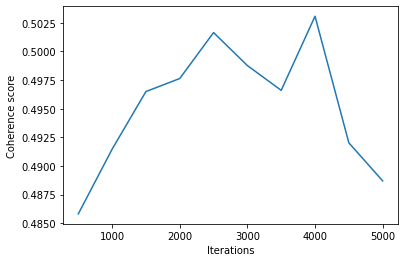

In [44]:
# Show graph
limit=5500; start=500; step=500;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Iterations")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [43]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Iterations =", m, 'Coherence: ', round(cv, 4))

Iterations = 500 Coherence:  0.4858
Iterations = 1000 Coherence:  0.4915
Iterations = 1500 Coherence:  0.4965
Iterations = 2000 Coherence:  0.4976
Iterations = 2500 Coherence:  0.5017
Iterations = 3000 Coherence:  0.4988
Iterations = 3500 Coherence:  0.4966
Iterations = 4000 Coherence:  0.5031
Iterations = 4500 Coherence:  0.492
Iterations = 5000 Coherence:  0.4887


In [51]:
#model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=11, alpha=9, id2word=id2word, random_seed=10, iterations=4000)
#coherencemodel = CoherenceModel(model=model, coherence='c_v', dictionary=id2word, corpus=corpus, texts=data_lemmatizedNouns)
#coherencemodel.get_coherence()

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 74
total tokens: 85123
<10> LL/token: -8.70082
<20> LL/token: -8.23806
<30> LL/token: -8.04471
<40> LL/token: -7.94317

0	0.81818	day weather night time week winter evening morning hour month town snow room thing clock table summer dinner visit leave 
1	0.81818	money work year dollar day house place time summer business winter market country pound board kind pay expense wage week 
2	0.81818	land pound acre country farm year price wheat cent dollar crop bushel farmer foot potato wood tree horse lot spring 
3	0.81818	time letter friend book health paper mind copy peace return world life month day people country news happiness spirit trust 
4	0.81818	letter brother family time mother sister friend health daughter child son uncle home wife aunt father write year month cousin 
5	0.81818	flower water house room garden boat side kind spring head wood bed morning day lady rain hair air sort fear 
6	0.81818	work day h

<310> LL/token: -7.70018
<320> LL/token: -7.70342
<330> LL/token: -7.69956
<340> LL/token: -7.69784

0	0.81818	day time winter weather week summer month town place health snow night home spring evening fever rain heat fall bed 
1	0.81818	dollar money work pound year day month house cent country time place board business week pay wage man cost expense 
2	0.81818	land acre farm country pound year price crop wheat bushel potato farmer kind spring horse wood cow person market foot 
3	0.81818	letter time book thing pleasure news paper copy friend spirit kind return happiness life mail picture peace account writing trust 
4	0.81818	letter brother time friend sister family mother health home write father uncle year son cousin month aunt daughter wife day 
5	0.81818	room house flower morning tree wood side river water garden bed door window lady people dinner walk building horse road 
6	0.81818	hand work time life interest mind pen man home power term paper gentleman fire business trouble law 

<610> LL/token: -7.68856
<620> LL/token: -7.69038
<630> LL/token: -7.68786
<640> LL/token: -7.68125

0	0.81818	day winter time weather summer week month place health home town snow house year business spring rain heat frost fall 
1	0.81818	dollar work money day year country week time pound month cent house summer board place pay situation man wage business 
2	0.81818	land pound acre farm country year price crop wheat bushel potato market farmer wood kind horse money cow spring seed 
3	0.81818	letter time thing return news pleasure month friend picture book happiness mail writing care trust write peace opportunity paper mine 
4	0.81818	letter brother friend time mother family sister health home uncle father write cousin year aunt son daughter wife death answer 
5	0.81818	room house side morning tree flower river water wood garden town fire bed door window building place mile horse road 
6	0.81818	work life book hand mind interest copy matter paper term city pen gentleman man business st

<910> LL/token: -7.6756
<920> LL/token: -7.68467
<930> LL/token: -7.68018
<940> LL/token: -7.68146

0	0.81818	day time winter summer weather week health month place town snow spring year home fall rain heat frost country business 
1	0.81818	dollar work money day year week time house business month man pound place country cent board wage pay summer store 
2	0.81818	land pound acre country farm year price crop wheat bushel potato market farmer lot wood horse cow seed flour money 
3	0.81818	letter time friend news return thing happiness pleasure sister month write picture care home mail writing opportunity place word trust 
4	0.81818	brother letter mother time friend family sister health home uncle year father aunt cousin wife son daughter month child day 
5	0.81818	room house flower tree morning side wood river water town garden window fire place night building door people view mile 
6	0.81818	book work life hand paper interest mind copy power matter pen story man truth term gentleman na

<1210> LL/token: -7.68809
<1220> LL/token: -7.68515
<1230> LL/token: -7.68525
<1240> LL/token: -7.68713

0	0.81818	day time winter summer weather month week health place town snow spring rain country year frost night fall heat pleasure 
1	0.81818	dollar work money year day month pound week business time cent house place board wage home pay man expense property 
2	0.81818	land pound acre farm country year price crop wheat bushel potato farmer market horse money cow seed kind wood house 
3	0.81818	letter time friend news day thing happiness pleasure sister place home return write writing care opportunity picture account mail answer 
4	0.81818	brother letter time mother family friend sister health year home daughter uncle wife son child cousin aunt country father write 
5	0.81818	room house morning tree water flower side wood river fire garden place night town people bed window door building mile 
6	0.81818	book work life hand paper mind interest copy spirit pen power story man truth gent

<1510> LL/token: -7.67483
<1520> LL/token: -7.68448
<1530> LL/token: -7.68069
<1540> LL/token: -7.67815

0	0.81818	day time winter summer weather month health week town place snow home spring country rain heat frost fall business house 
1	0.81818	work dollar money year day time month house pound week business man place pay board wage home expense cent country 
2	0.81818	land pound acre country farm year price crop wheat bushel potato market farmer wood money horse cow place spring lot 
3	0.81818	letter time friend day news sister return place happiness write pleasure writing care home thing opportunity picture month mail prayer 
4	0.81818	brother family mother letter friend time health sister son uncle home father daughter aunt child cousin wife year country kind 
5	0.81818	room house morning side tree river flower water wood fire place day night garden town door window bed building mile 
6	0.81818	book work life paper hand copy interest letter spirit mind story pen truth power thing h

<1810> LL/token: -7.67967
<1820> LL/token: -7.67951
<1830> LL/token: -7.67574
<1840> LL/token: -7.68166

0	0.81818	day time winter weather summer health month week town snow place rain fall spring night country home heat frost year 
1	0.81818	work dollar money year day business pound time place month country cent week home house man board wage property pay 
2	0.81818	land acre pound farm country year price crop wheat bushel potato farmer money market wood horse cow kind spring flour 
3	0.81818	letter time friend news day sister place pleasure write happiness opportunity month writing week care picture home return answer mail 
4	0.81818	brother family letter mother friend time sister health uncle child home son year daughter wife cousin aunt father kind boy 
5	0.81818	house room morning side water tree wood fire river flower place garden door day town window building mile view horse 
6	0.81818	book hand work life paper mind copy letter friend thing spirit interest pen story truth succes

<2110> LL/token: -7.68374
<2120> LL/token: -7.68724
<2130> LL/token: -7.68795
<2140> LL/token: -7.68418

0	0.81818	day time winter summer weather month health week country town place snow rain year heat frost business spring night fall 
1	0.81818	dollar work money day time year pound month house place country cent man week business board wage pay property summer 
2	0.81818	land acre pound farm country year price crop wheat bushel potato market farmer wood horse cow spring seed flour money 
3	0.81818	letter time friend news place home week month day happiness write return writing care opportunity pleasure sister thing mail father 
4	0.81818	brother mother family letter friend sister time health child son uncle daughter wife home cousin aunt father year kind death 
5	0.81818	room house side tree morning water river wood flower day fire garden town people door place window view lady building 
6	0.81818	book hand work life paper copy mind spirit thing interest pen letter story friend truth

<2410> LL/token: -7.68341
<2420> LL/token: -7.68971
<2430> LL/token: -7.68098
<2440> LL/token: -7.68277

0	0.81818	day time winter summer weather week month health town snow place rain spring year heat frost fall night country rest 
1	0.81818	work dollar money year day country pound time place house month board cent business man wage week people property account 
2	0.81818	land acre pound farm country year price crop wheat bushel potato farmer market horse wood cow lot kind dollar seed 
3	0.81818	letter time friend day news place write home return sister happiness month week care pleasure writing mail opportunity darling leave 
4	0.81818	brother friend family mother letter sister health time daughter child year aunt home uncle son cousin father wife country death 
5	0.81818	house room tree side morning river fire flower wood water place town door garden window day people view road bed 
6	0.81818	book work life hand paper copy mind spirit thing pen letter interest story power picture tr

<2710> LL/token: -7.68175
<2720> LL/token: -7.6818
<2730> LL/token: -7.68199
<2740> LL/token: -7.68239

0	0.81818	day time winter summer weather month health week place town snow spring country rain house year night heat frost fall 
1	0.81818	work dollar money year day pound time business month country man cent board week wage house property expense place pay 
2	0.81818	land pound acre farm country year price crop wheat money bushel potato market farmer wood dollar cow foot horse flour 
3	0.81818	letter time friend news sister write day week home place opportunity happiness return pleasure month picture writing kind mail thing 
4	0.81818	brother family mother letter health friend child year sister son aunt uncle wife daughter time cousin father home death country 
5	0.81818	room house morning place side tree river flower day fire wood water garden door people town window building mile view 
6	0.81818	book work hand life letter paper copy thing spirit interest mind pen story truth histo

<3010> LL/token: -7.68339
<3020> LL/token: -7.6858
<3030> LL/token: -7.68067
<3040> LL/token: -7.67969

0	0.81818	day time winter weather summer month place health week town country snow spring rain night home fall frost heat business 
1	0.81818	dollar work money day year month time pound business man place house board country week cent wage property situation cost 
2	0.81818	land pound acre country farm year price crop wheat bushel potato market farmer horse cow money kind wood lot flour 
3	0.81818	letter time friend day home news sister write week return place opportunity happiness month pleasure writing mail father care thing 
4	0.81818	brother family mother letter health friend sister son daughter child time year uncle aunt wife cousin home father death country 
5	0.81818	house room tree flower water wood morning side river day fire garden town door window road building people view mile 
6	0.81818	book work hand life paper copy spirit thing mind pen interest story truth term boy su

<3310> LL/token: -7.68429
<3320> LL/token: -7.68432
<3330> LL/token: -7.68443
<3340> LL/token: -7.68191

0	0.81818	day time winter summer weather month health week town snow spring country year place rain heat fall frost deal business 
1	0.81818	work dollar money day time cent year pound place month week business country house board man wage account people employment 
2	0.81818	land pound acre farm year country price crop wheat bushel potato farmer market cow wood money kind foot horse flour 
3	0.81818	letter time friend home news write month day sister opportunity happiness place week return answer care pleasure writing father mail 
4	0.81818	brother family letter mother friend health sister child year wife daughter son time uncle aunt cousin home father country death 
5	0.81818	house room side morning river tree wood water place day flower town garden night window fire horse door view building 
6	0.81818	book work hand life paper thing copy mind spirit pen interest story truth pictur

<3610> LL/token: -7.67714
<3620> LL/token: -7.67059
<3630> LL/token: -7.6786
<3640> LL/token: -7.672

0	0.81818	day time winter summer weather month health week place town snow spring country house night rain frost year heat climate 
1	0.81818	work dollar money day year country business pound time cent board month people house man wage week place home property 
2	0.81818	land pound acre farm country year price crop wheat bushel market farmer potato wood horse money cow seed spring kind 
3	0.81818	letter time friend home news write week place month day opportunity return sister picture happiness pleasure answer writing mail care 
4	0.81818	brother family letter friend mother health sister daughter year son child aunt uncle wife home cousin father time death boy 
5	0.81818	house room morning side river tree water wood place flower garden day town door fire window building view road walk 
6	0.81818	book work hand life paper copy letter mind thing interest spirit pen story truth boy man fr

<3910> LL/token: -7.67958
<3920> LL/token: -7.6834
<3930> LL/token: -7.68427
<3940> LL/token: -7.67869

0	0.81818	day time winter summer weather month week health place town snow country spring night rain fall heat frost business year 
1	0.81818	work dollar money day year pound time business place week month home cent house board wage country property pay summer 
2	0.81818	land acre farm pound country year crop wheat price potato market bushel farmer kind foot money wood seed lot horse 
3	0.81818	letter time friend home news write day sister week place opportunity month writing return care pleasure picture happiness mail thing 
4	0.81818	brother family friend letter mother sister health year daughter child uncle wife son aunt father home time cousin girl month 
5	0.81818	house room side tree river wood flower fire water morning day place town window door garden view mile building bank 
6	0.81818	book work hand paper life copy letter pen mind thing interest spirit story truth order acco

0.5030769191054243

In [52]:
# Coherence for alpha-9, iteration 4k, 11-topic model
#coherencemodel.get_coherence()
print(coherence_values[7])

# Topics for alpha-9, iteration 4k, 11-topic model
#malletModel_11a9i4k = model
malletModel_11a9i4k = model_list[7]
model_topics_11a9i4k = malletModel_11a9i4k.show_topics(formatted=False)
pprint(sorted(malletModel_11a9i4k.print_topics(num_words=20)))

# Convert results to lda model format for visualization.
MalletLDA11a9i4k = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_11a9i4k)

# Visualize the topics
pyLDAvis.enable_notebook()
vis11a9i4k = pyLDAvis.gensim.prepare(MalletLDA11a9i4k, corpus, id2word, sort_topics=False)
vis11a9i4k

[(0,
  '0.086*"day" + 0.054*"time" + 0.045*"winter" + 0.038*"summer" + '
  '0.037*"weather" + 0.030*"health" + 0.026*"week" + 0.023*"month" + '
  '0.020*"place" + 0.018*"country" + 0.018*"town" + 0.017*"spring" + '
  '0.017*"snow" + 0.012*"year" + 0.011*"rain" + 0.011*"fall" + 0.011*"frost" + '
  '0.011*"heat" + 0.009*"account" + 0.009*"climate"'),
 (1,
  '0.055*"dollar" + 0.053*"work" + 0.044*"money" + 0.031*"year" + 0.027*"day" '
  '+ 0.022*"time" + 0.021*"business" + 0.020*"pound" + 0.020*"week" + '
  '0.018*"month" + 0.017*"country" + 0.017*"cent" + 0.015*"house" + '
  '0.015*"board" + 0.014*"man" + 0.013*"place" + 0.012*"wage" + 0.012*"pay" + '
  '0.011*"property" + 0.011*"summer"'),
 (2,
  '0.046*"land" + 0.036*"pound" + 0.034*"acre" + 0.032*"farm" + '
  '0.026*"country" + 0.024*"year" + 0.016*"price" + 0.016*"crop" + '
  '0.016*"wheat" + 0.012*"bushel" + 0.012*"potato" + 0.012*"farmer" + '
  '0.011*"market" + 0.011*"wood" + 0.010*"money" + 0.010*"lot" + 0.010*"horse" '
  '+ 0.00

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.052019 -0.102518       1        1   8.699786
1      0.081068  0.080304       2        1   9.036533
2      0.217791  0.168766       3        1  10.287593
3     -0.197371 -0.068269       4        1   9.316317
4     -0.289022  0.005074       5        1   9.241339
5      0.213377 -0.132139       6        1   9.000159
6     -0.110691  0.149439       7        1   8.344433
7      0.013785 -0.270162       8        1   9.134786
8      0.166126 -0.121047       9        1   8.094276
9     -0.240181  0.025267      10        1   9.661735
10     0.093100  0.265286      11        1   9.183043, topic_info=         Term         Freq        Total Category  logprob  loglift
11     letter  1514.000000  1514.000000  Default  30.0000  30.0000
55       time  1581.000000  1581.000000  Default  29.0000  29.0000
8         day  1479.000000  1479.000000  Default  28.0000  28.0000
30    brother   513.000000   513.000000  Default  27.0000  27.0000
136      work   617.000000   617.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1964  capital    40.967813    66.757159  Topic11  -5.2711   1.8995
181      side    54.282352   199.284282  Topic11  -4.9897   1.0873
223     world    48.137180   221.389726  Topic11  -5.1098   0.8619
275      idea    43.016203   124.038678  Topic11  -5.2223   1.3288
376    person    44.040399   244.105845  Topic11  -5.1988   0.6753

[921 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
615      10  1.001073  acceptance
28        1  0.269281     account
28        2  0.238506     account
28        4  0.203884     account
28        5  0.250047     account
...     ...       ...         ...
59       11  0.172029        year
60        1  0.162431   yesterday
60        8  0.780917   yesterday
60        9  0.062473   yesterday
5562      5  1.003991        youe

[1222 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

## 4. Optimize hyperparameters

In [46]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for optimize_interval in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=11, alpha=9, id2word=id2word, random_seed=10, iterations=4000, optimize_interval=optimize_interval)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatizedNouns, 
                                                        start=100, 
                                                        limit=2200, 
                                                        step=200)

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 74
total tokens: 85123
<10> LL/token: -8.70082
<20> LL/token: -8.23806
<30> LL/token: -8.04471
<40> LL/token: -7.94317

0	0.81818	day weather night time week winter evening morning hour month town snow room thing clock table summer dinner visit leave 
1	0.81818	money work year dollar day house place time summer business winter market country pound board kind pay expense wage week 
2	0.81818	land pound acre country farm year price wheat cent dollar crop bushel farmer foot potato wood tree horse lot spring 
3	0.81818	time letter friend book health paper mind copy peace return world life month day people country news happiness spirit trust 
4	0.81818	letter brother family time mother sister friend health daughter child son uncle home wife aunt father write year month cousin 
5	0.81818	flower water house room garden boat side kind spring head wood bed morning day lady rain hair air sort fear 
6	0.81818	work day h

<310> LL/token: -7.7288
<320> LL/token: -7.74736
<330> LL/token: -7.74509
<340> LL/token: -7.75587

0	0.78245	day time winter week weather place summer month health town snow night home house spring fall year heat rain fever 
1	0.70829	dollar work money pound year day country cent board house time business man place pay wage week month cost property 
2	0.65209	land acre farm country pound year price crop wheat bushel farmer potato person horse market cow wood flour spring mill 
3	0.74003	letter time book thing copy paper news friend pleasure return happiness mail writing kind picture life trust peace world people 
4	0.81589	letter brother time friend sister family mother home health year father uncle write month aunt cousin daughter day son child 
5	0.67778	room house flower river tree water wood morning side garden door window bed building dinner horse people lady road foot 
6	0.68744	hand work life interest time mind paper business pen power term home gentleman matter man city attent

<610> LL/token: -7.74482
<620> LL/token: -7.75047
<630> LL/token: -7.75308
<640> LL/token: -7.74359

0	0.57818	day time winter weather summer month week place health town snow home year country rain frost climate house spring business 
1	0.45125	dollar work money pound day year country time month board house cent business week wage man place cost pay situation 
2	0.36145	land acre pound country farm year wheat price crop bushel wood farmer market potato spring place horse money seed cow 
3	0.54755	letter time friend day place news happiness return thing pleasure month sister week write father opportunity mine attention care hand 
4	0.66952	letter time brother friend mother family sister health home year child son uncle daughter aunt father cousin write wife country 
5	0.37994	room house tree morning river water side day wood flower night place road window boat mile door town horse building 
6	0.34562	book work life copy paper hand interest matter story mind man friend page letter histo

<910> LL/token: -7.70627
<920> LL/token: -7.70364
<930> LL/token: -7.70336
<940> LL/token: -7.70027

0	0.38269	day time winter weather summer place month week health town snow spring year frost fall heat climate rain business street 
1	0.29071	dollar work money pound day year country month house board business cent man wage time place property employment cost expense 
2	0.23216	land acre pound country farm year wheat crop price bushel potato farmer market wood money kind horse place seed cow 
3	0.42566	letter time friend day place month return news country sister home happiness pleasure manner father thing health year kind people 
4	0.496	letter time brother mother family friend home sister week health uncle year child son daughter aunt cousin write day country 
5	0.22159	day tree room river house water wood side morning flower boat night road town horse place land mile door window 
6	0.18788	book work copy letter life paper hand story interest truth mind volume spirit picture history 

<1210> LL/token: -7.67023
<1220> LL/token: -7.66476
<1230> LL/token: -7.66861
<1240> LL/token: -7.67064

0	0.24759	day time winter summer weather month week town snow place fire health home night frost heat rain spring change fall 
1	0.20997	dollar work pound money day year country cent time business board wage place house month man people expense week summer 
2	0.16786	land acre country pound farm year wheat crop price bushel farmer money potato horse tree dollar market cow seed wood 
3	0.32823	letter time day friend place month happiness return news kind country health sister home pleasure week father year hand opportunity 
4	0.38313	letter time brother mother family friend sister year week home day child health uncle daughter wife son country aunt month 
5	0.14677	water house day tree room wood river morning side boat time flower night town place foot horse people road window 
6	0.11358	book work copy paper letter life hand story truth volume interest man pen page people history spi

<1510> LL/token: -7.63479
<1520> LL/token: -7.63437
<1530> LL/token: -7.6316
<1540> LL/token: -7.63601

0	0.17317	day time winter weather week town summer snow home night month place frost rain street fire house heat work mind 
1	0.16731	dollar work money pound country day year cent time business board wage place month man house expense property person home 
2	0.13407	land acre country pound year farm wheat crop price bushel farmer dollar house wood potato market place tree money horse 
3	0.25663	letter time day friend place health country month news happiness year week return home kind pleasure life people write summer 
4	0.30888	letter time brother mother friend family sister home year child week health day month wife son uncle father country daughter 
5	0.11147	room tree water day house river morning wood side night road land boat building foot town place horse time view 
6	0.07961	book work copy letter paper life story truth mind volume hand history man interest title matter author

<1810> LL/token: -7.62193
<1820> LL/token: -7.61328
<1830> LL/token: -7.61371
<1840> LL/token: -7.61704

0	0.13191	day time winter weather snow summer town month week fire frost night place health home road yesterday business heat rain 
1	0.14206	dollar pound work money country year day time business cent month house board wage place man week property farm people 
2	0.11757	land acre country year pound farm wheat crop bushel money price market place potato seed kind wood farmer horse dollar 
3	0.21331	letter time day friend place month health country sister happiness year news return week home summer manner pleasure father opportunity 
4	0.26208	letter time brother mother family friend home sister day week child year health work month write uncle wife son aunt 
5	0.09467	day house water tree wood room river morning side town boat road foot place flower evening night bed horse coal 
6	0.06654	book work copy life paper letter story hand interest truth mind volume man history author natur

<2110> LL/token: -7.60258
<2120> LL/token: -7.59911
<2130> LL/token: -7.60015
<2140> LL/token: -7.60149

0	0.10561	day winter time weather snow town summer week night month frost fire home place rain street road mind evening work 
1	0.12776	dollar work money pound country day year time cent business month board wage place man house week employment property person 
2	0.10647	land acre country year pound farm wheat crop bushel price potato market place farmer money dollar wood seed horse house 
3	0.18593	letter time friend day place country month health happiness kind news hand summer pleasure year sister world week father attention 
4	0.2424	letter time brother mother friend family home sister week day year health child son uncle wife month country aunt write 
5	0.08328	tree river water room day side wood house morning boat road time night foot place town evening bank land flower 
6	0.05977	book work copy life letter paper hand story mind pen truth volume man interest flower history spi

<2410> LL/token: -7.57823
<2420> LL/token: -7.59485
<2430> LL/token: -7.58631
<2440> LL/token: -7.58835

0	0.08814	day time winter weather town fire snow frost summer night week month mind rain letter yesterday place street hand people 
1	0.11854	dollar work pound money country day year time cent board wage month place man business week house situation property home 
2	0.09984	land acre country pound year farm wheat crop bushel price wood potato farmer money market seed dollar house winter place 
3	0.17206	letter time day friend place country month health happiness life pleasure home hand return people year news world week summer 
4	0.22876	letter time brother friend mother family sister home week health day year child wife country month daughter son uncle work 
5	0.07614	day tree water river house morning room side wood place road boat foot night time flower bank town land coal 
6	0.05833	book work copy life letter paper story hand man truth interest volume mind nature matter people p

<2710> LL/token: -7.57085
<2720> LL/token: -7.57545
<2730> LL/token: -7.57964
<2740> LL/token: -7.57638

0	0.07696	day time winter weather letter town snow frost fire night month summer rain week home morning place mail hand evening 
1	0.10892	dollar pound work money day year country cent board wage house time place month business servant employment trade man week 
2	0.09555	land acre country year pound farm wheat crop bushel price money place farmer dollar winter wood market summer potato seed 
3	0.15818	letter time day friend place health month country happiness weather week home summer kind year return pleasure news sister father 
4	0.21977	letter time brother family mother friend home sister day week health child year month son wife work country write cousin 
5	0.07406	tree day house river morning water wood room side boat town time place land night road foot door people coal 
6	0.05606	book work copy letter paper hand life story interest truth volume mind man pen page nature table

<3010> LL/token: -7.57545
<3020> LL/token: -7.57646
<3030> LL/token: -7.57349
<3040> LL/token: -7.56649

0	0.07419	day winter time weather town snow frost fire month summer week night rain yesterday home street morning people place thing 
1	0.10527	dollar pound work money day country year cent wage time place month board business house week home people man flour 
2	0.09348	land acre country year pound farm wheat crop bushel money price dollar summer farmer potato wood place horse market seed 
3	0.15418	letter time day friend place health month country home happiness summer year weather pleasure hand return week kind life opportunity 
4	0.20766	letter time brother family mother friend sister week home year day health child month country uncle son write work wife 
5	0.06959	day house tree water river room side morning wood boat town place night road building door time bank evening foot 
6	0.05348	book work letter copy paper life flower story hand volume interest truth mind boy man nature

<3310> LL/token: -7.56962
<3320> LL/token: -7.56998
<3330> LL/token: -7.57317
<3340> LL/token: -7.57596

0	0.06945	day time winter town weather month night snow frost fire week place letter summer home rain friend yesterday horse evening 
1	0.10047	dollar work pound day money country cent month board wage year place week time house business man flour person winter 
2	0.09518	land acre country year farm pound wheat crop bushel money price place summer dollar winter potato farmer horse family wood 
3	0.14752	letter time day friend country place health month happiness summer year life pleasure people week weather return kind home father 
4	0.20344	letter time brother friend mother family sister home health week day year child country month write wife uncle son money 
5	0.07036	day river house tree room water side wood morning boat road place town night evening foot bank time coal bed 
6	0.05201	book work copy life paper letter hand story year flower mind truth volume interest man world na

<3610> LL/token: -7.56028
<3620> LL/token: -7.56505
<3630> LL/token: -7.56891
<3640> LL/token: -7.56449

0	0.0672	day time winter fire town night letter frost weather snow rain week morning place month evening summer room mail yesterday 
1	0.09397	dollar pound work money day year country cent month board wage house business flour week place man price time tea 
2	0.09073	land acre country year farm pound wheat crop money bushel winter price place wood dollar farmer summer horse seed potato 
3	0.14247	letter time day friend country place month health week summer weather happiness life pleasure home winter news year return people 
4	0.20035	letter time brother friend mother family sister day home health week month year child country work write wife son uncle 
5	0.0689	day house tree river room water side morning wood boat place foot road night town city time bank window coal 
6	0.05056	book work copy paper letter life story flower hand man truth volume interest mind nature spirit author p

<3910> LL/token: -7.56487
<3920> LL/token: -7.56369
<3930> LL/token: -7.56454
<3940> LL/token: -7.5624

0	0.06861	day time letter night fire winter town frost weather home snow week rain month mail place thing mother mind hand 
1	0.08918	pound dollar work money year day cent month country board wage week time business price tea flour place man trade 
2	0.08986	land country acre year farm pound wheat money crop dollar bushel price place winter farmer potato market house seed kind 
3	0.14142	letter time day friend health country month place summer weather sister life week year happiness winter news pleasure hand kind 
4	0.19474	letter time brother friend family mother sister day home week year health work month child country wife uncle money write 
5	0.06731	day house room water tree river morning wood side boat town place foot night time bank road window coal evening 
6	0.04996	book work letter copy life paper story hand truth volume man interest flower people clearing author spirit suc


0	0.81818	day time weather winter summer town week place month health snow night bed evening road home frost house climate heat 
1	0.81818	dollar money work day year pound business cent month house time country place board kind week wage pay man expense 
2	0.81818	land pound acre farm country year price crop wheat bushel potato market farmer foot horse wood cow spring flour tree 
3	0.81818	letter book thing paper time pleasure life friend copy return news work trust interest spirit fear happiness health peace picture 
4	0.81818	letter time brother friend sister family mother health home year write month uncle father child son wife cousin daughter aunt 
5	0.81818	room house morning flower tree river wood garden water side bed window place walk lady kind horse air description spot 
6	0.81818	time work hand home business mind gentleman pen character house power day man law mine bank week term book interest 
7	0.81818	week child home day baby boy time school girl night letter evening moth

<460> LL/token: -7.74658
<470> LL/token: -7.74398
<480> LL/token: -7.74851
<490> LL/token: -7.74298

0	0.78245	day time winter summer weather month week health town place snow country home spring house frost business heat fall year 
1	0.70829	dollar work money day year pound board week business cent month house time country man wage place pay property cost 
2	0.65209	land acre pound farm country year wheat price crop bushel farmer potato market horse kind place wood cow person seed 
3	0.74003	letter time day friend thing news return sister pleasure happiness mail write picture home care month opportunity writing peace trust 
4	0.81589	letter brother time friend family mother sister home health year uncle child wife son daughter cousin father write aunt country 
5	0.67778	house room tree side river water wood morning flower fire garden window night building mile door bed road bank place 
6	0.68744	book work life paper interest copy hand pen matter power story mind gentleman man history 

<760> LL/token: -7.77122
<770> LL/token: -7.76928
<780> LL/token: -7.7598
<790> LL/token: -7.76577

0	0.71947	day time winter summer weather month health week place town snow year spring home country rain business night frost heat 
1	0.60264	dollar work money day year pound country month board business house cent time wage place man week summer property rate 
2	0.52323	land acre pound farm country year crop wheat price bushel potato farmer money market cow horse wood flour seed foot 
3	0.67625	letter time friend day place news pleasure sister month return thing happiness week write home writing picture mail opportunity trust 
4	0.7702	brother letter mother time family friend home sister health child uncle aunt son cousin father year daughter wife write death 
5	0.55746	room house morning tree river wood water day side flower fire garden door night window lady building place view mile 
6	0.5464	book work life paper copy letter interest mind world story man power truth pen hand thing his

<1060> LL/token: -7.74894
<1070> LL/token: -7.7561
<1080> LL/token: -7.75732
<1090> LL/token: -7.75603

0	0.63525	day winter time summer weather month week place town snow country health year spring night rain frost fall home house 
1	0.51473	dollar work money pound year day cent house board business wage country place man time cost rate property month home 
2	0.42922	land acre country pound farm year wheat crop price bushel farmer potato market money seed wood place horse cow tree 
3	0.63323	letter time friend day sister month place news happiness return pleasure home writing father kind care write mail trust thing 
4	0.69794	letter brother family time mother friend sister home health year child son wife uncle cousin daughter week write father aunt 
5	0.45977	room house morning tree water wood side river flower fire window day night door town people time garden road horse 
6	0.42754	book work paper life copy hand letter mind pen story spirit man page truth interest volume friend histo

<1360> LL/token: -7.74396
<1370> LL/token: -7.74624
<1380> LL/token: -7.74305
<1390> LL/token: -7.74429

0	0.55817	day time winter summer weather month town place health week snow country spring home rain frost heat air fall business 
1	0.43985	dollar work money pound day year time month cent board business man country house place wage cost week situation property 
2	0.35677	land acre country farm pound year wheat crop price bushel farmer potato wood seed horse market money foot place cow 
3	0.59229	letter time friend day place home sister news month happiness pleasure return week opportunity write mail manner writing care year 
4	0.62559	letter brother time family friend mother sister home child year health uncle son country daughter cousin wife father aunt write 
5	0.38217	room house morning tree water side night wood river day fire window flower door town mile garden road horse place 
6	0.33197	book work copy hand paper life story flower letter pen spirit interest man thing mind tru

<1660> LL/token: -7.72344
<1670> LL/token: -7.72353
<1680> LL/token: -7.73049
<1690> LL/token: -7.72684

0	0.48399	day time winter weather summer month place week health town snow country night frost spring home rain heat fall thing 
1	0.3803	dollar work money pound year country day house cent month business board place man time wage person property pay price 
2	0.30225	land acre farm country pound year wheat crop bushel farmer potato price money market cow seed wood horse foot lot 
3	0.55106	letter time friend day place month return sister happiness news home father pleasure health write opportunity kind world hand trust 
4	0.56284	letter brother family time mother friend home year sister health uncle wife child aunt son daughter cousin week country father 
5	0.32353	room house day tree wood water river morning side night road town door place time building fire boat flower lady 
6	0.25876	book work copy paper hand life pen story flower letter mind truth man spirit interest volume crea

<1960> LL/token: -7.70907
<1970> LL/token: -7.71806
<1980> LL/token: -7.71716
<1990> LL/token: -7.71859

0	0.41769	day winter weather time summer month place town snow health week home heat spring frost country fall thing house night 
1	0.33532	dollar work pound money year day country business cent month board wage man house place time cost property rate employment 
2	0.26007	land acre country pound farm year wheat crop bushel price money wood farmer potato seed market kind horse place garden 
3	0.51135	letter time friend day place month home sister country happiness news return thing write health year life pleasure world care 
4	0.50455	letter brother time mother family friend sister child home uncle health son wife year aunt cousin week day daughter paper 
5	0.27387	house day room tree water river morning side wood night boat town foot building road mile window evening dinner time 
6	0.20737	book work copy paper letter hand life story interest spirit flower man mind truth heart volum

<2260> LL/token: -7.70092
<2270> LL/token: -7.70817
<2280> LL/token: -7.70172
<2290> LL/token: -7.69951

0	0.35996	day time winter weather summer month town week snow night place spring health home frost fire rain heat thing air 
1	0.29893	dollar work money pound year day country month cent time house board business man wage place week summer property expense 
2	0.22749	land acre country pound farm year wheat crop price bushel wood potato farmer market seed horse kind cow money place 
3	0.47671	letter time friend day place sister home month health country life pleasure happiness year news return father week kind opportunity 
4	0.45223	letter time brother mother family friend sister year child home health son uncle day daughter wife aunt cousin week write 
5	0.23112	house day river water morning tree wood room side boat horse night time road place bank home town mile window 
6	0.16857	book work copy paper life hand letter story flower interest volume truth mind pen history spirit nature

<2560> LL/token: -7.68186
<2570> LL/token: -7.69478
<2580> LL/token: -7.68998
<2590> LL/token: -7.6912

0	0.31576	day time winter weather summer week night snow town month health fire house spring thing rain heat country home place 
1	0.26955	dollar work money pound day year country time cent month man business board wage house place property week employment home 
2	0.20221	land acre country pound farm year wheat crop price bushel farmer market money potato place wood seed horse cow dollar 
3	0.44293	letter time friend day place month country sister health return news year happiness kind pleasure home life father writing trust 
4	0.40863	letter time brother mother family sister friend home child year uncle daughter son week health wife aunt day cousin girl 
5	0.19685	day house river tree water wood room side morning boat place town road building bank night flower window mile door 
6	0.14003	book work copy paper hand life letter story truth interest flower volume spirit pen man mind nat

<2860> LL/token: -7.67756
<2870> LL/token: -7.67539
<2880> LL/token: -7.67221
<2890> LL/token: -7.68026

0	0.27416	day time winter weather summer week snow month place night town house frost fire rain work health air thing street 
1	0.24426	dollar work pound money country year day cent time business house man month board wage place property cost person week 
2	0.18099	land acre farm country year pound wheat crop bushel price market seed money horse tree potato cow farmer wood spring 
3	0.40745	letter time day friend place month country health sister happiness home return news year pleasure life week kind father care 
4	0.37602	letter time brother family mother friend home sister year child week health son uncle day wife daughter aunt month cousin 
5	0.16835	day river wood water tree house side morning room boat road place town night bank foot building horse window view 
6	0.12046	book work copy life paper letter hand story flower interest man truth volume nature table mind spirit matte

<3160> LL/token: -7.66707
<3170> LL/token: -7.66362
<3180> LL/token: -7.66495
<3190> LL/token: -7.66436

0	0.23812	day time winter weather month summer night snow town week fire frost rain room home health letter street house air 
1	0.22356	dollar work pound money country year day cent time place board business house wage man month person employment cost rate 
2	0.16336	land acre country year pound farm wheat crop bushel price money farmer market horse potato cow seed spring tree kind 
3	0.37696	letter time friend day place country month sister health home happiness week kind year pleasure father news life opportunity summer 
4	0.34541	letter time brother mother family friend home sister child day health week year son daughter uncle work wife country aunt 
5	0.14663	day wood river water tree house morning side boat foot place town road room night bank horse land evening city 
6	0.10629	book work copy life letter paper hand story flower volume pen interest truth man heart table page nat

<3460> LL/token: -7.66172
<3470> LL/token: -7.65704
<3480> LL/token: -7.65914
<3490> LL/token: -7.65065

0	0.20638	day time winter weather night week town snow fire month summer frost room rain people place heat mind health street 
1	0.20483	dollar work pound money year country day cent business place board time man month wage house week home land winter 
2	0.15111	land acre country year farm pound wheat crop bushel money price farmer market potato dollar wood seed spring horse place 
3	0.34858	letter time friend day country place month sister year health pleasure home happiness news return kind father week summer life 
4	0.31914	letter time brother family mother friend sister home child health day week year wife son daughter uncle cousin month aunt 
5	0.1297	tree river day water wood house side morning place boat town foot land road night flower time evening coal bank 
6	0.0941	book work copy paper life letter story hand truth people mind man flower pen volume interest page history na

<3760> LL/token: -7.63819
<3770> LL/token: -7.64887
<3780> LL/token: -7.64503
<3790> LL/token: -7.6424

0	0.17952	day time winter weather night snow town fire month summer frost rain week room letter house morning heat hand people 
1	0.18998	pound dollar work country money year time day place cent month man person business wage board house people week land 
2	0.13997	land acre year country farm pound wheat crop bushel price money potato dollar market farmer horse wood seed cow house 
3	0.32447	letter time friend day health place country month happiness pleasure week news year summer sister return kind hand life home 
4	0.29896	letter time brother mother family friend home sister week child day wife health year son month daughter write work uncle 
5	0.1148	day river tree wood morning water place side town boat house road foot time night horse hour coal bank home 
6	0.08592	book work copy letter paper life story flower hand volume interest mind truth history husband title author picture 

<60> LL/token: -7.84699
<70> LL/token: -7.81149
<80> LL/token: -7.79051
<90> LL/token: -7.77757

0	0.81818	day winter weather week night town time hour place month snow morning evening summer clock house road yesterday return leave 
1	0.81818	work dollar money year day country time month house pound summer place business winter week board pay wage kind expense 
2	0.81818	land pound acre farm country year price crop wheat cent wood bushel potato farmer foot horse person lot market spring 
3	0.81818	letter time book paper life health happiness pleasure copy friend interest thing return peace month news world mind fear attention 
4	0.81818	letter brother time family friend mother health sister daughter child son home uncle month father aunt write wife cousin year 
5	0.81818	house room flower water bed side garden tree river morning rain kind wood window spring walk fall lady eye head 
6	0.81818	time work hand man day pen gentleman house account bank fire business home character law week t

<360> LL/token: -7.68824
<370> LL/token: -7.69901
<380> LL/token: -7.69428
<390> LL/token: -7.68941

0	0.81818	day time winter week weather summer month town place health snow night spring house home fever thing heat frost rain 
1	0.81818	dollar work money day year pound month cent time country week business place board pay wage man house rate property 
2	0.81818	land acre pound farm country year price crop wheat bushel potato market farmer horse cow kind wood family foot person 
3	0.81818	letter time book thing pleasure return paper news copy kind spirit friend happiness picture peace prayer manner darling truth trust 
4	0.81818	letter brother time friend sister mother family home health write uncle father son cousin year daughter day month wife aunt 
5	0.81818	room house flower morning side bed wood tree water garden river window door mile lady road dinner place view bank 
6	0.81818	hand work life mind time interest pen man home gentleman term attention fire city paper business troub

<660> LL/token: -7.74632
<670> LL/token: -7.74205
<680> LL/token: -7.74475
<690> LL/token: -7.7482

0	0.7824	day time winter summer weather month health week town home place snow spring house rain year frost heat night thing 
1	0.70644	work dollar money day pound country year month week board business house cent man place wage time pay people employment 
2	0.65332	land acre pound farm country year crop wheat price bushel potato farmer market horse money kind wood cow lot flour 
3	0.73488	letter time friend day news pleasure return sister happiness place thing picture write kind writing care opportunity darling world mail 
4	0.81407	letter brother time mother friend family sister health home uncle year daughter child country son wife cousin father aunt write 
5	0.68028	room house tree water side wood river morning day flower place town door garden window building fire view lady mile 
6	0.68647	book work life paper hand interest copy mind matter truth story gentleman business power spiri

<960> LL/token: -7.75128
<970> LL/token: -7.74727
<980> LL/token: -7.75329
<990> LL/token: -7.75376

0	0.7824	day time winter summer weather week health month place town snow home year spring country rain night house heat change 
1	0.70644	dollar work money year day pound country time place business board cent month wage property man house week employment rate 
2	0.65332	land acre pound country farm year price wheat crop bushel farmer potato wood horse market money spring foot seed mill 
3	0.73488	letter time friend day place month news pleasure happiness return sister write thing care opportunity mail account trust answer picture 
4	0.81407	brother letter family mother friend time sister home health uncle daughter child year father cousin son death wife aunt write 
5	0.68028	room house morning river tree side wood water night flower fire place garden day window door building mile road people 
6	0.68647	book work life paper hand copy letter mind interest story spirit man power pen trut

<1260> LL/token: -7.76555
<1270> LL/token: -7.75571
<1280> LL/token: -7.75612
<1290> LL/token: -7.7549

0	0.70756	day time winter summer weather month week health place town country snow year spring rain home frost work heat climate 
1	0.60364	dollar work money pound day year month time cent house business place country man board wage week situation cost lot 
2	0.52206	land acre farm pound country year crop wheat price bushel farmer potato wood market money person horse seed cow flour 
3	0.6901	letter time friend day news place sister happiness month return write pleasure opportunity care thing writing week home father picture 
4	0.75116	brother letter family mother friend time sister home child year health son uncle daughter wife aunt cousin father day country 
5	0.55752	house room morning tree river water side day wood flower window place door garden horse fire night town building view 
6	0.54226	book work hand paper life copy letter mind story interest man flower eye spirit pen trut

<1560> LL/token: -7.74696
<1570> LL/token: -7.74953
<1580> LL/token: -7.75335
<1590> LL/token: -7.74687

0	0.62149	day time winter weather summer month place health week town snow spring country people rain year work frost fall climate 
1	0.51901	dollar work money pound country day year cent board month business house time man wage place week store cost property 
2	0.42813	land acre pound country farm year wheat crop price bushel farmer potato wood market money cow seed spring flour kind 
3	0.65257	letter time friend day home write news place week sister month opportunity writing return mother pleasure care answer thing kind 
4	0.67138	brother family letter mother friend year child sister time health daughter wife son uncle aunt cousin home father girl death 
5	0.46339	room house morning water tree wood day side river night town flower window fire door mile place boat building lady 
6	0.42095	book work hand life paper copy letter story pen mind picture truth thing interest man spirit h

<1860> LL/token: -7.76182
<1870> LL/token: -7.74962
<1880> LL/token: -7.7454
<1890> LL/token: -7.75546

0	0.62149	day time winter summer weather month town health place week snow year country spring house frost home heat climate fall 
1	0.51901	dollar work money pound day year country cent man time board business wage house expense week place rate month cost 
2	0.42813	land acre country pound farm year wheat crop price bushel farmer potato wood market money horse seed place lot spring 
3	0.65257	letter time friend day home week write news place sister month pleasure return thing mother writing opportunity mail answer happiness 
4	0.67138	brother family friend mother letter year time child sister health son daughter uncle wife father aunt home death kind cousin 
5	0.46339	house room river morning tree water day side wood night flower place window boat door lady foot fire evening mile 
6	0.42095	book work hand life copy paper letter story thing pen truth history interest spirit page man 

<2160> LL/token: -7.74754
<2170> LL/token: -7.73823
<2180> LL/token: -7.74347
<2190> LL/token: -7.74913

0	0.54038	day time winter summer weather month place week health town country snow business year spring heat frost climate fall home 
1	0.44536	dollar work money pound year day country business time month cent board man wage week house place pay rate cost 
2	0.35795	land acre pound country farm year wheat crop price bushel potato farmer market wood seed money horse spring place tree 
3	0.61484	letter time day home friend news week month write sister place mother pleasure night girl opportunity thing writing baby picture 
4	0.59507	brother family letter mother friend time sister health year child wife uncle son aunt daughter country home day cousin death 
5	0.38703	room house morning tree wood day water river side flower night fire boat town door window garden lady foot time 
6	0.33013	book work copy paper hand letter life story spirit pen mind interest truth friend boy volume page w

<2460> LL/token: -7.74869
<2470> LL/token: -7.74857
<2480> LL/token: -7.7451
<2490> LL/token: -7.74339

0	0.54038	day winter time weather summer month week town country place snow health house home frost heat spring rain climate pleasure 
1	0.44536	dollar work money pound year day country business cent month place board time man house wage cost expense week property 
2	0.35795	land acre country farm pound year wheat crop price bushel potato farmer market wood seed money horse place spring cow 
3	0.61484	letter time day friend week home news place sister write month mother thing baby pleasure opportunity return night answer mail 
4	0.59507	brother family letter friend time mother health child sister son year wife daughter uncle aunt home death father cousin country 
5	0.38703	room water day tree house wood morning side night river fire door road boat flower lady building garden horse town 
6	0.33013	book work hand copy paper letter life flower story pen eye truth man mind history pictur

<2760> LL/token: -7.73452
<2770> LL/token: -7.73138
<2780> LL/token: -7.74134
<2790> LL/token: -7.73336

0	0.47054	day summer time winter weather place country month garden snow health town week spring frost flower people air fall heat 
1	0.38845	dollar work money pound year day country business month time cent house board man wage week expense cost pay place 
2	0.3015	land acre country pound farm year wheat crop price bushel potato farmer place horse wood money market spring kind cow 
3	0.5734	letter time day home friend week month news sister place write mother night pleasure baby picture thing care return mail 
4	0.52354	brother family letter friend time mother health year child sister son uncle daughter aunt wife home death father country cousin 
5	0.32338	water river house room day morning side wood tree boat foot night place town horse road time mile hour city 
6	0.26439	book work copy paper hand life letter flower story interest spirit pen mind truth year history volume woman th

<3060> LL/token: -7.71388
<3070> LL/token: -7.71926
<3080> LL/token: -7.7244
<3090> LL/token: -7.72455

0	0.40665	day summer winter time weather country place garden snow month flower week town spring house health frost lady people air 
1	0.34594	dollar work money pound day year time country cent month business house board wage man week place cost employment person 
2	0.25452	land acre country pound farm year wheat crop bushel price farmer potato market wood horse money cow foot place family 
3	0.53884	letter time day week friend home news sister month write place thing night mother girl health opportunity pleasure year baby 
4	0.45687	brother family letter friend mother time year health child sister son wife country uncle daughter day death aunt home father 
5	0.2677	day river house water morning room night town wood side tree time boat road foot place building horse fire clock 
6	0.20887	book work copy paper life letter hand story interest truth flower mind pen volume spirit matter p

<3360> LL/token: -7.70938
<3370> LL/token: -7.72187
<3380> LL/token: -7.72303
<3390> LL/token: -7.72024

0	0.40665	day winter time summer weather garden country month snow place town house flower health frost spring climate year lady air 
1	0.34594	dollar work money pound day country year cent time board business man wage house week place month expense situation pay 
2	0.25452	land acre pound country farm year wheat crop bushel farmer price money potato market place cow wood foot horse lot 
3	0.53884	letter time day week friend home month news place sister write night mother girl baby writing pleasure thing opportunity return 
4	0.45687	brother family friend letter mother time sister health year child son daughter uncle wife aunt country home death cousin father 
5	0.2677	river house water room day morning tree wood side road foot boat night place town door horse fire time mile 
6	0.20887	book work copy life hand paper flower story letter truth mind spirit pen volume nature sort eye hi

<3660> LL/token: -7.70006
<3670> LL/token: -7.7018
<3680> LL/token: -7.70192
<3690> LL/token: -7.71031

0	0.35009	day weather winter summer time country garden month flower place town lady frost snow health air tree heat house climate 
1	0.30861	work dollar money day pound time cent year month board business country man week house wage place rate expense cost 
2	0.21959	land acre pound country farm year wheat crop bushel price money farmer market potato wood horse place cow spring lot 
3	0.50657	letter time day friend week home month sister news write night place mother baby answer writing pleasure return father opportunity 
4	0.40058	brother family letter time friend mother health year child sister daughter uncle wife son country aunt summer home death kind 
5	0.22414	day house river water room morning side wood night boat town foot tree place road horse time building fire bed 
6	0.16883	book work copy paper hand letter life story interest truth mind flower volume pen man history spir

<3960> LL/token: -7.70418
<3970> LL/token: -7.70097
<3980> LL/token: -7.70113
<3990> LL/token: -7.70401

0	0.35009	day weather winter summer time garden place flower country town snow month lady frost house evening air spring week heat 
1	0.30861	dollar work money pound year day time country cent business place month board man wage house cost employment home expense 
2	0.21959	land acre pound farm year country wheat crop price bushel farmer wood house market potato money spring horse lot place 
3	0.50657	letter time day friend week home sister month mother news write place night year health opportunity pleasure writing answer thing 
4	0.40058	brother family letter time mother friend child health sister year son uncle wife country daughter aunt winter home father death 
5	0.22414	water river day morning house room tree side boat wood night foot place town horse road fire clock mile view 
6	0.16883	book work copy paper hand life letter story matter interest pen spirit truth flower man vo

<240> LL/token: -7.7103

0	0.81818	day time winter weather week summer place month town health night snow house home evening bed frost heat spring road 
1	0.81818	dollar money work year day pound country week house time cent month business pay summer board expense wage man place 
2	0.81818	land acre pound farm country year price crop wheat bushel potato farmer wood horse market foot cow person lot tree 
3	0.81818	letter book time paper thing spirit friend copy news fear pleasure life return writing happiness trust peace matter mind picture 
4	0.81818	letter brother time friend family sister mother health home father uncle write year month son wife cousin daughter aunt answer 
5	0.81818	room house flower side morning tree bed water wood garden river window lady dinner eye air spot building view table 
6	0.81818	work hand time home life mine pen mind man interest account business term gentleman law power fire party bank book 
7	0.81818	week child home day time boy school baby night girl 

<510> LL/token: -7.69067
<520> LL/token: -7.68759
<530> LL/token: -7.6853
<540> LL/token: -7.68925

0	0.81818	day time winter summer weather week place month health town house home snow spring year heat evening frost return business 
1	0.81818	dollar work money year day pound country week month time cent board place business house man wage situation pay summer 
2	0.81818	land acre pound country farm year price crop wheat bushel potato farmer market horse wood money cow kind person flour 
3	0.81818	letter time book news thing return pleasure friend happiness picture paper kind mail writing word write prayer darling copy peace 
4	0.81818	letter brother time friend family mother sister health home uncle write month son cousin father aunt daughter wife death year 
5	0.81818	room house flower tree side river morning wood water fire night garden door window lady bed mile place horse building 
6	0.81818	life work hand interest mind book paper trouble business term gentleman city time man pen 

<810> LL/token: -7.74204
<820> LL/token: -7.73902
<830> LL/token: -7.73253
<840> LL/token: -7.73606

0	0.77721	day time winter summer month week weather health place town snow rain year house spring heat frost home thing fall 
1	0.70915	dollar work money pound day business year cent house country month time board wage cost man pay property expense place 
2	0.65137	land acre farm country pound year price crop wheat bushel farmer potato money market horse seed wood cow kind flour 
3	0.74166	letter time friend news return thing pleasure happiness place home picture writing write sister care mail attention opportunity month prayer 
4	0.80613	brother letter friend mother time family sister home health year uncle child son cousin country daughter father aunt write month 
5	0.68219	room house tree side wood place flower river water fire morning garden door town window building people view bed mile 
6	0.67981	book work life hand paper copy interest mind story matter power spirit pen truth worl

<1110> LL/token: -7.75643
<1120> LL/token: -7.74892
<1130> LL/token: -7.74814
<1140> LL/token: -7.74705

0	0.77721	day time winter weather summer month health week town place snow night spring rain heat frost climate fall year air 
1	0.70915	work dollar money day year pound business cent place country house board month time people wage man home week pay 
2	0.65137	land country acre pound farm year wheat price crop bushel potato market farmer wood money lot cow horse person flour 
3	0.74166	letter time friend day news month return place sister happiness write opportunity pleasure father mail week thing home care world 
4	0.80613	brother letter family time mother friend sister home health child uncle year daughter wife son cousin aunt kind death write 
5	0.68219	room house tree side morning river flower wood day water garden fire town door window road place building mile view 
6	0.67981	book work paper hand life copy mind letter pen spirit story thing truth interest picture history man s

<1410> LL/token: -7.75435
<1420> LL/token: -7.76429
<1430> LL/token: -7.75302
<1440> LL/token: -7.75553

0	0.6904	day time winter summer weather week month place health snow country town spring year frost heat fall air night house 
1	0.60638	work dollar money day year pound country man business month house board place time cent week wage home property expense 
2	0.52534	land acre pound country farm year price wheat crop bushel farmer market potato wood cow foot seed money horse lot 
3	0.70435	letter time friend day sister news place home write month week opportunity thing return pleasure happiness picture writing father answer 
4	0.73792	brother family letter mother friend time health sister child year home daughter wife son uncle aunt cousin father death month 
5	0.56418	room house morning tree side river water wood day flower fire window town garden door horse building mile view boat 
6	0.53115	book work hand paper life copy letter story pen spirit truth nature thing interest people 

<1710> LL/token: -7.759
<1720> LL/token: -7.75846
<1730> LL/token: -7.7625
<1740> LL/token: -7.76393

0	0.6904	day time winter weather summer month health place week town snow home year rain spring country frost heat house climate 
1	0.60638	dollar work money pound day country year business cent man house time place month board wage pay property employment week 
2	0.52534	land acre pound country farm year wheat crop price bushel potato farmer money market seed foot horse lot wood kind 
3	0.70435	letter time friend day news week sister write home month pleasure place thing opportunity return answer kind writing mother happiness 
4	0.73792	brother family mother friend letter health year sister child daughter son wife aunt time uncle home cousin father death boy 
5	0.56418	room water house morning side tree river wood day flower night fire door window horse town place lady mile view 
6	0.53115	book work hand paper life copy mind interest pen story letter spirit man truth picture matter bo

<2010> LL/token: -7.76225
<2020> LL/token: -7.76132
<2030> LL/token: -7.76398
<2040> LL/token: -7.7587

0	0.6904	day winter time weather summer month health place week snow country town spring heat business frost fall house rest change 
1	0.60638	dollar work money pound day year month cent country business board time man week wage home place rate cost employment 
2	0.52534	land acre pound country farm year wheat crop price bushel farmer potato market money horse cow wood place seed house 
3	0.70435	letter time friend week day news write home sister pleasure month mother opportunity place writing thing answer father picture return 
4	0.73792	family brother letter friend mother sister year child health time daughter son wife home uncle aunt kind death father country 
5	0.56418	room house morning tree water wood river night side day fire flower town place door garden window horse mile home 
6	0.53115	book work hand paper life copy letter story thing truth mind interest spirit eye pen page

<2310> LL/token: -7.74924
<2320> LL/token: -7.75576
<2330> LL/token: -7.75125
<2340> LL/token: -7.746

0	0.61144	day time winter weather summer health month place town week snow country thing spring business frost home year heat fall 
1	0.51879	dollar work money pound day year country cent business house man month board wage place time rate summer cost trade 
2	0.43077	land acre country pound farm year wheat crop price bushel farmer potato money horse seed market wood place foot spring 
3	0.67211	letter time week friend news month write day sister home mother place father thing opportunity picture pleasure happiness answer night 
4	0.65496	brother family friend letter mother year time health sister child daughter son uncle wife home country aunt father death kind 
5	0.46758	room house morning tree wood water side river day fire night door flower window garden boat town building mile view 
6	0.41524	book work life hand copy paper letter flower mind story spirit pen truth history interes

<2610> LL/token: -7.75962
<2620> LL/token: -7.75621
<2630> LL/token: -7.7497
<2640> LL/token: -7.75317

0	0.61144	day time winter summer weather health month week place country snow town home night frost heat spring change air climate 
1	0.51879	dollar work money pound day year country week time business board house cent month wage place man expense property rate 
2	0.43077	land acre pound country year farm wheat crop price bushel farmer potato money market cow wood horse place seed lot 
3	0.67211	letter time friend day week news home write sister month mother place baby girl opportunity return pleasure answer night thing 
4	0.65496	brother family letter friend time mother sister child year health daughter son uncle wife aunt country home father death cousin 
5	0.46758	room house tree morning water wood river side fire day flower door window night garden building lady road horse people 
6	0.41524	book work paper hand copy life pen story letter interest man truth spirit boy flower mind 

<2910> LL/token: -7.74274
<2920> LL/token: -7.74249
<2930> LL/token: -7.7492
<2940> LL/token: -7.73908

0	0.53979	day time winter summer weather month health place town week country snow spring frost fall climate rain heat pleasure road 
1	0.44564	dollar work money pound day year country man business month house time place board wage cent cost home week rate 
2	0.35994	land acre pound country farm year wheat crop price bushel farmer potato wood horse market money place seed cow lot 
3	0.63108	letter time home friend week day news sister month write night girl baby mother place thing writing answer opportunity picture 
4	0.57814	brother family friend letter mother time health sister year child daughter son wife uncle aunt country home father death winter 
5	0.38897	room morning house day tree river water wood side night fire door time window horse boat road building evening place 
6	0.32321	book work life copy paper hand letter flower story mind truth interest eye pen spirit boy people 

<3210> LL/token: -7.7432
<3220> LL/token: -7.74046
<3230> LL/token: -7.7452
<3240> LL/token: -7.74628

0	0.53979	day winter time summer weather health country place month snow garden town flower spring home house frost attention manner thing 
1	0.44564	dollar work money pound day place year cent month country board business house man wage week time expense home rate 
2	0.35994	land acre country pound farm year wheat crop price bushel farmer potato wood market lot horse money spring house cow 
3	0.63108	letter time week day home news sister month friend write mother thing night place girl baby answer father picture pleasure 
4	0.57814	brother family friend letter mother time child sister health year son daughter uncle wife aunt country home father cousin paper 
5	0.38897	room water day morning house river night side fire tree wood town horse door bed window boat city foot building 
6	0.32321	book work copy hand life letter paper story flower man spirit mind truth pen matter eye interest

<3510> LL/token: -7.73143
<3520> LL/token: -7.7275
<3530> LL/token: -7.72233
<3540> LL/token: -7.72526

0	0.47139	day winter time summer weather place month country snow health garden spring flower home town frost week heat year tree 
1	0.38645	dollar work money pound day year month country cent man board business time house place wage week home cost person 
2	0.30169	land acre pound farm country year wheat crop price bushel farmer money market wood potato horse foot house place spring 
3	0.58646	letter time week day home news friend month write sister night mother baby girl place opportunity answer writing thing father 
4	0.50923	brother family letter friend mother health time year sister son child uncle wife country home daughter aunt father death winter 
5	0.32502	room day morning house water river side night wood tree door road horse fire town bed boat time window hour 
6	0.25189	book work copy hand letter paper life story flower spirit truth mind matter power interest volume heart

<3810> LL/token: -7.73003
<3820> LL/token: -7.723
<3830> LL/token: -7.73055
<3840> LL/token: -7.73537

0	0.47139	day time winter summer weather country month snow garden health spring place town flower year frost pleasure house home week 
1	0.38645	dollar work money day pound year time business month man cent board wage week place house home country cost rate 
2	0.30169	land acre pound farm country year wheat crop price bushel farmer potato money place horse market wood person dollar house 
3	0.58646	letter time week day home news friend mother write baby sister month night thing girl answer place return opportunity mail 
4	0.50923	brother family letter friend time health mother child sister son country daughter uncle year wife father aunt home cousin death 
5	0.32502	room day morning house river water side night wood tree town place door bed horse boat road hour fire foot 
6	0.25189	book work copy life paper hand letter story flower interest mind truth pen spirit man volume matter pow


0	0.81818	day winter weather week night town time hour place month snow morning evening summer clock house road yesterday return leave 
1	0.81818	work dollar money year day country time month house pound summer place business winter week board pay wage kind expense 
2	0.81818	land pound acre farm country year price crop wheat cent wood bushel potato farmer foot horse person lot market spring 
3	0.81818	letter time book paper life health happiness pleasure copy friend interest thing return peace month news world mind fear attention 
4	0.81818	letter brother time family friend mother health sister daughter child son home uncle month father aunt write wife cousin year 
5	0.81818	house room flower water bed side garden tree river morning rain kind wood window spring walk fall lady eye head 
6	0.81818	time work hand man day pen gentleman house account bank fire business home character law week term earth trouble parent 
7	0.81818	week home time child letter boy school baby girl day night m

<360> LL/token: -7.68824
<370> LL/token: -7.69901
<380> LL/token: -7.69428
<390> LL/token: -7.68941

0	0.81818	day time winter week weather summer month town place health snow night spring house home fever thing heat frost rain 
1	0.81818	dollar work money day year pound month cent time country week business place board pay wage man house rate property 
2	0.81818	land acre pound farm country year price crop wheat bushel potato market farmer horse cow kind wood family foot person 
3	0.81818	letter time book thing pleasure return paper news copy kind spirit friend happiness picture peace prayer manner darling truth trust 
4	0.81818	letter brother time friend sister mother family home health write uncle father son cousin year daughter day month wife aunt 
5	0.81818	room house flower morning side bed wood tree water garden river window door mile lady road dinner place view bank 
6	0.81818	hand work life mind time interest pen man home gentleman term attention fire city paper business troub

<660> LL/token: -7.68354
<670> LL/token: -7.68142
<680> LL/token: -7.6833
<690> LL/token: -7.68284

0	0.81818	day time winter summer week weather month health place house town snow spring year rain home frost heat business fall 
1	0.81818	dollar work money day pound year country place house cent month business board week wage man time pay situation account 
2	0.81818	land acre country pound farm year price crop wheat bushel market potato farmer horse wood cow lot flour mill spring 
3	0.81818	letter time return pleasure news thing friend picture happiness write writing mine darling trust answer sister father account kind peace 
4	0.81818	letter brother time friend mother family sister home health uncle child wife son cousin father daughter aunt write year month 
5	0.81818	room house flower tree morning side wood river place water fire door garden town window building night view lady road 
6	0.81818	book work life mind hand interest paper copy matter term city story pen gentleman success

<960> LL/token: -7.72853
<970> LL/token: -7.74426
<980> LL/token: -7.74522
<990> LL/token: -7.74207

0	0.77432	day time winter weather summer week month health place snow country town year spring night business rain home heat frost 
1	0.71097	dollar work money year day pound month country time business board man week cent wage place house pay property home 
2	0.64867	land acre pound country farm year price crop wheat bushel potato farmer market wood money horse kind spring cow seed 
3	0.75159	letter time friend news pleasure place return happiness month week write thing home sister opportunity writing picture mail account care 
4	0.79547	brother letter family friend mother sister time home health daughter uncle year child wife son father cousin aunt death month 
5	0.68041	house room side tree morning water wood river fire place town flower garden window door building people road mile view 
6	0.67749	book work life hand paper copy interest mind pen power story matter man truth spirit su

<1260> LL/token: -7.74127
<1270> LL/token: -7.74261
<1280> LL/token: -7.74095
<1290> LL/token: -7.74224

0	0.77432	day time winter summer weather month health place week snow town country year night spring home heat frost house climate 
1	0.71097	dollar work money day pound year business cent house country month time place board week wage property man situation employment 
2	0.64867	land acre country farm pound year wheat crop price bushel market potato farmer wood person cow horse money flour seed 
3	0.75159	letter time friend day news place happiness return sister write pleasure care writing week opportunity month home thing picture answer 
4	0.79547	brother letter family mother friend time sister child health home son year daughter uncle wife father aunt death month cousin 
5	0.68041	house room morning river tree side water day wood flower garden fire door window view place horse road building night 
6	0.67749	book work life hand paper copy letter mind story interest pen power truth

<1560> LL/token: -7.73757
<1570> LL/token: -7.74147
<1580> LL/token: -7.74405
<1590> LL/token: -7.74035

0	0.77432	day time winter summer weather month week health place town snow year house country spring frost heat night fall rain 
1	0.71097	dollar work money pound day country year house cent month time board business week man wage place home person store 
2	0.64867	land acre farm pound country year crop wheat price bushel farmer potato spring wood market horse seed cow kind mill 
3	0.75159	letter time friend home news day write place sister week month opportunity return care mother mail answer father thing pleasure 
4	0.79547	brother family friend letter mother year health sister child daughter wife time son aunt uncle cousin father home death kind 
5	0.68041	room house morning tree water wood side river fire flower night town door window home day mile building road garden 
6	0.67749	book work hand life paper letter copy thing mind story pen picture interest spirit truth boy history

<1860> LL/token: -7.75625
<1870> LL/token: -7.74643
<1880> LL/token: -7.74238
<1890> LL/token: -7.74818

0	0.69057	day time winter weather summer health month week place town country snow spring year home night frost pleasure road heat 
1	0.60853	dollar work money day pound year country month cent board business house man place wage week time rate home store 
2	0.51977	land acre pound farm country year crop wheat price bushel potato farmer market money wood lot horse seed cow flour 
3	0.72034	letter time friend week home news place write day sister month pleasure return thing opportunity writing answer mother care kind 
4	0.72104	brother family mother letter friend time year sister health child daughter son aunt uncle wife father home cousin death kind 
5	0.56171	room house river tree water morning side wood fire town flower night day horse door window foot garden place boat 
6	0.5356	book work hand life copy paper letter story pen thing interest truth man history matter mind spirit su

<2160> LL/token: -7.75896
<2170> LL/token: -7.76031
<2180> LL/token: -7.75891
<2190> LL/token: -7.76341

0	0.69057	day winter time summer weather health month week place town snow spring year country fall business frost heat night air 
1	0.60853	dollar work money day pound year country month place business cent house man board week wage time home property cost 
2	0.51977	land acre pound country farm year wheat crop price bushel potato market farmer money wood kind cow seed flour horse 
3	0.72034	letter time home day friend news write place month week sister pleasure opportunity answer writing picture return mother care thing 
4	0.72104	brother family letter mother friend sister year health child time daughter son wife uncle aunt home father cousin country boy 
5	0.56171	room morning house tree water river wood side night fire day town horse door window flower place lady church boat 
6	0.5356	book work paper hand letter copy life story pen flower mind interest spirit truth thing man boy

<2460> LL/token: -7.76264
<2470> LL/token: -7.76222
<2480> LL/token: -7.75819
<2490> LL/token: -7.76481

0	0.69057	day winter time summer weather month health week place town snow house country year spring frost heat fall rain climate 
1	0.60853	dollar work money pound country year day business cent board week place time man house month wage store cost home 
2	0.51977	land acre pound country farm year wheat crop price bushel potato farmer market money cow seed horse place wood flour 
3	0.72034	letter time friend day news home week month write place sister return pleasure thing opportunity mother answer happiness writing picture 
4	0.72104	brother family friend letter mother sister child time son health daughter year wife uncle aunt home death father cousin kind 
5	0.56171	room water tree house morning wood river side night fire day flower door foot window road building town lady time 
6	0.5356	book work hand paper copy life letter pen story truth spirit people mind flower interest boy 

<2760> LL/token: -7.75124
<2770> LL/token: -7.74795
<2780> LL/token: -7.7474
<2790> LL/token: -7.74822

0	0.60806	day time winter weather summer month place week health town country snow year spring fall frost heat house rain home 
1	0.52091	dollar work money day pound year country month cent business board man week house place wage time store rate cost 
2	0.42628	land acre pound country farm year wheat crop price bushel farmer potato market horse wood money kind lot cow seed 
3	0.68557	letter time friend day home news week write sister month place pleasure father opportunity writing picture return care answer thing 
4	0.64027	brother family letter mother time friend child health sister year son daughter aunt uncle wife home death cousin father boy 
5	0.46851	room house tree water morning wood side river fire flower night window door garden lady day horse gentleman boat building 
6	0.41658	book work hand copy paper life letter story spirit woman interest truth mind man pen thing pictur

<3060> LL/token: -7.74882
<3070> LL/token: -7.75654
<3080> LL/token: -7.76271
<3090> LL/token: -7.75734

0	0.60806	day time winter summer weather month health week town snow place country year business spring frost climate heat fall night 
1	0.52091	dollar work money day pound country year month place man time cent business board week wage house cost rate store 
2	0.42628	land acre pound country farm year wheat crop price bushel potato farmer horse seed market kind wood cow money lot 
3	0.68557	letter time friend home day news sister week write month opportunity place thing mother return pleasure writing answer care mail 
4	0.64027	brother family friend mother letter year time child sister son health daughter wife uncle aunt death home cousin kind day 
5	0.46851	house room morning water river wood tree side day fire door night flower window garden town lady boat building view 
6	0.41658	book work hand letter copy paper life story pen picture truth interest spirit boy history thing natu

<3360> LL/token: -7.76211
<3370> LL/token: -7.75852
<3380> LL/token: -7.75461
<3390> LL/token: -7.75758

0	0.60806	day time winter summer weather health month place week snow town country year spring rain fall heat climate frost house 
1	0.52091	dollar work money day pound year country week cent business board man house place wage time month rate expense store 
2	0.42628	land acre pound country farm year wheat crop price bushel farmer potato money horse market seed cow place lot kind 
3	0.68557	letter time friend home news day week sister month write place opportunity pleasure girl answer mother writing father thing picture 
4	0.64027	brother family mother letter friend child daughter sister health son year wife time uncle aunt home death country cousin father 
5	0.46851	house room wood morning tree river day water side flower fire door night garden window road place lady building town 
6	0.41658	book work hand paper copy life story pen letter truth mind boy man interest spirit thing t

<3660> LL/token: -7.73574
<3670> LL/token: -7.74535
<3680> LL/token: -7.74029
<3690> LL/token: -7.74637

0	0.53243	day winter time weather summer month health place country town snow week year spring heat frost thing rain pleasure climate 
1	0.44665	dollar work money day pound year cent house board month time wage country place man business week person cost people 
2	0.35589	land acre country pound farm year wheat crop price bushel farmer potato market wood money cow seed horse spring place 
3	0.64869	letter time friend week day home month news sister write mother place answer opportunity pleasure writing baby picture night thing 
4	0.56013	brother family friend letter mother daughter sister health child time year uncle son wife aunt home death father kind boy 
5	0.39212	room house morning tree water river side day wood flower night place fire garden window door bed building boat town 
6	0.32518	book work copy hand paper life letter story pen interest mind eye truth spirit matter man h

<3960> LL/token: -7.74622
<3970> LL/token: -7.74298
<3980> LL/token: -7.75173
<3990> LL/token: -7.74211

0	0.53243	day winter weather time summer month country place health snow town garden spring home week frost flower year heat thing 
1	0.44665	dollar work money day pound year time cent month country house place business board man week wage home expense employment 
2	0.35589	land acre pound farm year country wheat crop price bushel money farmer wood potato market spring horse place cow lot 
3	0.64869	letter time day friend week home month news sister write night pleasure thing place opportunity baby answer mother writing kind 
4	0.56013	brother family mother letter friend child health sister year time daughter uncle son wife country aunt home death father cousin 
5	0.39212	room water day house river morning tree side night fire wood place horse door time window bed boat town building 
6	0.32518	book work copy paper life letter hand flower story interest pen matter truth man history t


0	0.81818	day time winter weather week summer place month town health night snow house home evening bed frost heat spring road 
1	0.81818	dollar money work year day pound country week house time cent month business pay summer board expense wage man place 
2	0.81818	land acre pound farm country year price crop wheat bushel potato farmer wood horse market foot cow person lot tree 
3	0.81818	letter book time paper thing spirit friend copy news fear pleasure life return writing happiness trust peace matter mind picture 
4	0.81818	letter brother time friend family sister mother health home father uncle write year month son wife cousin daughter aunt answer 
5	0.81818	room house flower side morning tree bed water wood garden river window lady dinner eye air spot building view table 
6	0.81818	work hand time home life mine pen mind man interest account business term gentleman law power fire party bank book 
7	0.81818	week child home day time boy school baby night girl morning today evening ch

<510> LL/token: -7.69067
<520> LL/token: -7.68759
<530> LL/token: -7.6853
<540> LL/token: -7.68925

0	0.81818	day time winter summer weather week place month health town house home snow spring year heat evening frost return business 
1	0.81818	dollar work money year day pound country week month time cent board place business house man wage situation pay summer 
2	0.81818	land acre pound country farm year price crop wheat bushel potato farmer market horse wood money cow kind person flour 
3	0.81818	letter time book news thing return pleasure friend happiness picture paper kind mail writing word write prayer darling copy peace 
4	0.81818	letter brother time friend family mother sister health home uncle write month son cousin father aunt daughter wife death year 
5	0.81818	room house flower tree side river morning wood water fire night garden door window lady bed mile place horse building 
6	0.81818	life work hand interest mind book paper trouble business term gentleman city time man pen 

<810> LL/token: -7.68234
<820> LL/token: -7.67766
<830> LL/token: -7.67329
<840> LL/token: -7.68005

0	0.81818	day time winter summer weather month week health place town snow spring heat frost rain home night business account house 
1	0.81818	dollar work money year day pound place country business week month time cent house board man wage situation cost summer 
2	0.81818	land acre country pound farm year price crop wheat bushel market farmer potato horse wood cow money spring flour kind 
3	0.81818	letter time friend thing news return pleasure happiness sister picture write writing opportunity darling mail answer month account peace prayer 
4	0.81818	brother letter friend family mother time sister home health child uncle wife father son cousin daughter aunt country write year 
5	0.81818	house room flower tree side wood river fire water morning town garden door place building window road view mile bed 
6	0.81818	book work life hand interest mind paper copy matter story pen power spirit 

<1110> LL/token: -7.70662
<1120> LL/token: -7.71983
<1130> LL/token: -7.72499
<1140> LL/token: -7.72966

0	0.76918	day time winter summer weather month health week place town snow spring night country heat frost rain pleasure climate deal 
1	0.71073	work dollar money day year pound business cent place month house time board country wage man property week store pay 
2	0.64812	land pound acre country farm year crop wheat price bushel potato market farmer money wood lot cow horse place flour 
3	0.75986	letter time friend news return home place month thing happiness write sister pleasure picture care mail writing opportunity prayer peace 
4	0.78966	brother letter family friend mother time sister health home child uncle year daughter cousin wife son aunt week country father 
5	0.67893	house room tree side flower morning wood water river garden place town fire window door building road mile bank walk 
6	0.67446	book work hand life paper copy interest mind matter story spirit pen power truth 

<1410> LL/token: -7.75421
<1420> LL/token: -7.76005
<1430> LL/token: -7.7476
<1440> LL/token: -7.74943

0	0.76918	day time winter summer weather month health place week town snow spring country year frost heat fall house business deal 
1	0.71073	dollar work money day pound year country month place house time cent board business week man wage pay property expense 
2	0.64812	land acre pound farm country year wheat price crop bushel potato farmer market wood lot money foot horse seed spring 
3	0.75986	letter time friend week news home write day sister place month thing opportunity writing picture pleasure answer happiness care return 
4	0.78966	brother family letter mother friend health sister time home child daughter son year uncle wife cousin aunt father kind death 
5	0.67893	room house tree side river morning day flower wood water fire door night window garden place view road mile town 
6	0.67446	book work hand life paper copy mind letter power pen interest story pleasure truth spirit 

<1710> LL/token: -7.74349
<1720> LL/token: -7.75135
<1730> LL/token: -7.74847
<1740> LL/token: -7.74948

0	0.76918	day time winter summer weather month place health week town snow home year spring country rain heat frost fall house 
1	0.71073	dollar work money year day pound country business house cent month place man time board wage week property cost rate 
2	0.64812	land acre pound country farm year crop wheat price bushel potato horse farmer wood market foot money seed cow mill 
3	0.75986	letter time friend news day sister home write week place return answer pleasure month thing opportunity happiness father picture care 
4	0.78966	brother family friend mother letter time child health year sister daughter son wife aunt uncle home cousin father boy country 
5	0.67893	room house water morning tree side river day wood night flower door fire garden window town building view lady people 
6	0.67446	book hand work paper life copy thing mind letter pen story spirit matter interest power pict

<2010> LL/token: -7.74341
<2020> LL/token: -7.74164
<2030> LL/token: -7.74434
<2040> LL/token: -7.74554

0	0.76918	day time winter summer weather month place health week town snow country spring year business rain frost heat fall house 
1	0.71073	dollar work money year day pound country month cent time business board house home wage place week cost expense summer 
2	0.64812	land pound acre farm country year price wheat crop bushel potato market farmer horse cow place seed wood flour money 
3	0.75986	letter time friend news write sister home week day month opportunity pleasure place mother thing answer writing picture father return 
4	0.78966	brother family mother friend letter child sister daughter health year son wife uncle aunt time home cousin death father kind 
5	0.67893	room house tree water wood side day river morning flower fire door town place night window building mile garden road 
6	0.67446	book work hand life paper copy letter thing interest man story spirit pen truth mind q

<2310> LL/token: -7.76252
<2320> LL/token: -7.75606
<2330> LL/token: -7.75502
<2340> LL/token: -7.75181

0	0.68282	day time winter summer weather health month town week place snow year country house spring frost heat business rain fall 
1	0.6104	dollar work money pound year day time country business cent man month board house place wage home cost rate expense 
2	0.52176	land acre country farm pound year wheat crop price bushel farmer potato wood money horse seed market place cow flour 
3	0.72771	letter time week friend news month write home sister mother place day thing opportunity pleasure father night picture answer baby 
4	0.71399	brother family friend mother letter child health sister year time son wife uncle daughter aunt kind home father death country 
5	0.55986	room house tree wood morning water side river day fire place night flower garden road lady door bed view window 
6	0.53305	book work hand life paper copy letter interest story spirit flower pen truth mind history table su

<2610> LL/token: -7.75984
<2620> LL/token: -7.7609
<2630> LL/token: -7.7565
<2640> LL/token: -7.7574

0	0.68282	day time winter summer weather health month week country place snow town year business house home frost heat spring change 
1	0.6104	dollar work money pound day year country time business board cent place week wage house month man store rate cost 
2	0.52176	land acre pound country farm year wheat crop price bushel potato farmer money market seed horse wood cow lot dollar 
3	0.72771	letter time day friend week news home month write sister mother place opportunity baby return night girl writing answer mail 
4	0.71399	brother family letter mother friend child sister health year daughter time son wife uncle aunt home father cousin death kind 
5	0.55986	house room tree water morning river wood day side night fire flower window door garden town building boat road lady 
6	0.53305	book work paper hand copy life letter story mind pen interest spirit truth boy woman eye man table page 

<2910> LL/token: -7.75422
<2920> LL/token: -7.76841
<2930> LL/token: -7.76503
<2940> LL/token: -7.75348

0	0.68282	day time winter summer weather health month week place town country snow spring year frost house heat fall climate business 
1	0.6104	dollar work money day pound year time month house country business man cent place board wage week property cost people 
2	0.52176	land acre country pound farm year wheat crop price bushel farmer wood potato market horse seed lot kind money place 
3	0.72771	letter time home friend day news week write sister month place thing mother return answer night baby pleasure girl picture 
4	0.71399	brother family friend mother letter child daughter son health time wife year sister aunt uncle father home boy cousin death 
5	0.55986	room house morning tree river day water night side fire wood door window flower time place horse road building hour 
6	0.53305	book work hand paper copy life letter flower pen story mind truth spirit eye history man picture i

<3210> LL/token: -7.76087
<3220> LL/token: -7.75796
<3230> LL/token: -7.76763
<3240> LL/token: -7.76514

0	0.68282	day time winter weather summer health place month week town country snow home business year house frost spring fall heat 
1	0.6104	dollar work money pound day year cent country place board month house business week man wage time expense rate property 
2	0.52176	land acre country farm pound year wheat crop price bushel farmer potato market money cow seed wood horse lot spring 
3	0.72771	letter time week friend news day home write sister month mother thing place return answer baby pleasure opportunity picture night 
4	0.71399	brother family friend letter mother child sister son health year daughter time uncle wife aunt kind death father home cousin 
5	0.55986	room house day tree wood morning side water river fire night flower window door mile garden horse boat place description 
6	0.53305	book work hand paper copy life mind eye letter story truth interest pen flower man spir

<3510> LL/token: -7.75598
<3520> LL/token: -7.75179
<3530> LL/token: -7.75465
<3540> LL/token: -7.76226

0	0.60411	day time winter weather summer month place health week country town snow spring home heat frost fall thing business rest 
1	0.52154	dollar work money pound day year country place time month business cent board house wage man week home expense cost 
2	0.4272	land acre farm pound country year wheat crop price bushel potato farmer market money seed place cow horse dollar wood 
3	0.68948	letter time friend week news day home write sister month mother place opportunity return night answer writing girl pleasure father 
4	0.63572	brother family friend letter mother year health child sister son daughter wife uncle aunt time home boy father kind country 
5	0.46353	room house tree water wood morning side river day flower night fire door window garden horse road bed mile lady 
6	0.41439	book work hand copy paper letter life story truth pen spirit eye thing man flower page picture min

<3810> LL/token: -7.75413
<3820> LL/token: -7.7499
<3830> LL/token: -7.75429
<3840> LL/token: -7.75705

0	0.60411	day time winter weather summer month town week health place country snow spring year home house change frost business rain 
1	0.52154	dollar work money day pound year country cent house man week time place month board summer wage business store people 
2	0.4272	land acre pound country farm year wheat crop price bushel potato farmer horse wood market seed person cow money spring 
3	0.68948	letter time friend day week news month home write sister mother night pleasure opportunity answer baby thing return place father 
4	0.63572	brother family letter friend mother child year sister daughter health son wife time uncle aunt home father kind country cousin 
5	0.46353	room house morning tree wood water day river side flower night fire window garden door place building lady boat view 
6	0.41439	book work hand copy paper life letter woman story interest spirit pen man truth picture 

<90> LL/token: -7.77757

0	0.81818	day winter weather week night town time hour place month snow morning evening summer clock house road yesterday return leave 
1	0.81818	work dollar money year day country time month house pound summer place business winter week board pay wage kind expense 
2	0.81818	land pound acre farm country year price crop wheat cent wood bushel potato farmer foot horse person lot market spring 
3	0.81818	letter time book paper life health happiness pleasure copy friend interest thing return peace month news world mind fear attention 
4	0.81818	letter brother time family friend mother health sister daughter child son home uncle month father aunt write wife cousin year 
5	0.81818	house room flower water bed side garden tree river morning rain kind wood window spring walk fall lady eye head 
6	0.81818	time work hand man day pen gentleman house account bank fire business home character law week term earth trouble parent 
7	0.81818	week home time child letter boy scho

<360> LL/token: -7.68824
<370> LL/token: -7.69901
<380> LL/token: -7.69428
<390> LL/token: -7.68941

0	0.81818	day time winter week weather summer month town place health snow night spring house home fever thing heat frost rain 
1	0.81818	dollar work money day year pound month cent time country week business place board pay wage man house rate property 
2	0.81818	land acre pound farm country year price crop wheat bushel potato market farmer horse cow kind wood family foot person 
3	0.81818	letter time book thing pleasure return paper news copy kind spirit friend happiness picture peace prayer manner darling truth trust 
4	0.81818	letter brother time friend sister mother family home health write uncle father son cousin year daughter day month wife aunt 
5	0.81818	room house flower morning side bed wood tree water garden river window door mile lady road dinner place view bank 
6	0.81818	hand work life mind time interest pen man home gentleman term attention fire city paper business troub

<660> LL/token: -7.68354
<670> LL/token: -7.68142
<680> LL/token: -7.6833
<690> LL/token: -7.68284

0	0.81818	day time winter summer week weather month health place house town snow spring year rain home frost heat business fall 
1	0.81818	dollar work money day pound year country place house cent month business board week wage man time pay situation account 
2	0.81818	land acre country pound farm year price crop wheat bushel market potato farmer horse wood cow lot flour mill spring 
3	0.81818	letter time return pleasure news thing friend picture happiness write writing mine darling trust answer sister father account kind peace 
4	0.81818	letter brother time friend mother family sister home health uncle child wife son cousin father daughter aunt write year month 
5	0.81818	room house flower tree morning side wood river place water fire door garden town window building night view lady road 
6	0.81818	book work life mind hand interest paper copy matter term city story pen gentleman success

<960> LL/token: -7.67766
<970> LL/token: -7.68212
<980> LL/token: -7.68636
<990> LL/token: -7.68131

0	0.81818	day winter time summer weather health week month place spring snow year town business home night rain house heat frost 
1	0.81818	work dollar money day year time pound place month business man week board house home cent wage pay situation country 
2	0.81818	land pound acre country farm year price crop wheat bushel potato market money farmer horse wood cow kind flour seed 
3	0.81818	letter time friend news pleasure place happiness thing sister return home month write care picture opportunity mail writing world trust 
4	0.81818	brother letter friend family mother time sister health home uncle year father cousin daughter wife son aunt child death day 
5	0.81818	room house side tree morning flower river wood water fire garden town window door bed building mile view people road 
6	0.81818	book life work hand mind paper copy interest power spirit pen story truth matter term thing su

<1260> LL/token: -7.68442
<1270> LL/token: -7.67785
<1280> LL/token: -7.678
<1290> LL/token: -7.67713

0	0.81818	day time winter summer weather month health week place snow town home spring year country rain night heat frost climate 
1	0.81818	dollar work money year day pound country time business cent month week home board place wage house man pay property 
2	0.81818	land acre pound farm country year price crop wheat bushel potato market farmer wood person cow kind spring seed flour 
3	0.81818	letter time friend day news return place happiness thing pleasure sister care picture write writing month opportunity home prayer mail 
4	0.81818	brother letter family friend mother time sister health uncle son year child cousin daughter home father wife aunt write death 
5	0.81818	house room river side flower tree water morning fire wood garden door people window place town view building mile night 
6	0.81818	book life work hand paper mind copy interest man power spirit pen story nature success

<1560> LL/token: -7.74493
<1570> LL/token: -7.74297
<1580> LL/token: -7.74216
<1590> LL/token: -7.74531

0	0.76591	day time winter weather summer month health place week snow town year business spring country night pleasure frost rain house 
1	0.71058	dollar work money day pound country month cent house year board man business week wage time place store expense cost 
2	0.64818	land acre farm pound country year wheat crop price bushel potato market farmer cow seed wood spring money flour mill 
3	0.76722	letter time friend day home news write sister place happiness month opportunity return writing week care pleasure mail thing mother 
4	0.78356	brother family letter friend mother time health sister year child wife uncle son daughter aunt cousin home father country paper 
5	0.67827	room house morning water tree side wood river night flower fire day place horse door window mile town road building 
6	0.6721	book work life hand paper copy letter mind thing story pen interest spirit truth boy

<1860> LL/token: -7.74577
<1870> LL/token: -7.74055
<1880> LL/token: -7.73732
<1890> LL/token: -7.75031

0	0.76591	day time winter summer weather health month week place town country snow spring rain year home business night house frost 
1	0.71058	dollar work money day pound country year cent month place business board house wage week man pay time expense rate 
2	0.64818	land acre country pound farm year crop wheat price bushel potato farmer market money seed horse lot wood kind spring 
3	0.76722	letter time friend news week write day month sister home place return thing opportunity answer pleasure mother mail picture writing 
4	0.78356	brother family friend mother letter year health daughter son time sister child home uncle wife father aunt death cousin kind 
5	0.67827	room house water tree side morning river wood flower fire day town door night garden window building place horse mile 
6	0.6721	book work hand paper life copy thing letter pen interest story eye man truth history spirit

<2160> LL/token: -7.74243
<2170> LL/token: -7.73924
<2180> LL/token: -7.73938
<2190> LL/token: -7.74936

0	0.76591	day winter time summer weather month health week place town country snow year spring frost heat house fall night air 
1	0.71058	work dollar money pound day country month year business place man cent board house wage week time home expense situation 
2	0.64818	land acre pound country farm year wheat crop price bushel potato farmer market wood horse money cow seed spring flour 
3	0.76722	letter time home news week write friend month day place sister pleasure mother return writing picture opportunity answer thing mail 
4	0.78356	brother family friend year child mother sister daughter letter health wife son uncle aunt time home father cousin boy death 
5	0.67827	room morning house tree river wood side water night fire day place town door flower window horse people mile lady 
6	0.6721	book work hand paper letter life copy thing mind pen eye story spirit flower truth man interes

<2460> LL/token: -7.74814
<2470> LL/token: -7.74492
<2480> LL/token: -7.75014
<2490> LL/token: -7.74708

0	0.76591	day time winter summer weather month health week place town snow home country spring house heat frost year fall rain 
1	0.71058	dollar work money year pound day country business time cent man board week house wage place month pay cost expense 
2	0.64818	land acre country farm pound year wheat crop price bushel potato market farmer money cow seed wood horse flour person 
3	0.76722	letter time friend day news home month write sister week place opportunity mother answer thing return writing pleasure picture father 
4	0.78356	brother family friend letter mother child sister daughter health son year wife aunt uncle time death father home cousin boy 
5	0.67827	room water house tree morning day side wood river night fire door window town flower place view mile garden building 
6	0.6721	book work hand paper life copy letter flower mind pen thing eye story truth spirit woman nature

<2760> LL/token: -7.75618
<2770> LL/token: -7.74991
<2780> LL/token: -7.75188
<2790> LL/token: -7.75722

0	0.6801	day time winter summer weather month health week town place country snow spring year fall frost heat house night rain 
1	0.60706	dollar work money pound day year country month business cent board place house man week wage time store pay rate 
2	0.52191	land acre country pound farm year wheat crop price bushel potato market farmer horse kind money wood flour seed foot 
3	0.73472	letter time friend home week day news place write sister mother month father pleasure return answer opportunity writing picture care 
4	0.7096	brother family friend child mother letter sister health daughter son year time wife aunt uncle home cousin father death boy 
5	0.5612	room house water tree wood side morning river fire flower night door window day garden place road lady mile horse 
6	0.52647	book work hand copy paper life letter story spirit mind truth pen flower man thing interest picture wom

<3060> LL/token: -7.75617
<3070> LL/token: -7.76042
<3080> LL/token: -7.76006
<3090> LL/token: -7.76309

0	0.6801	day time winter summer weather place health week month country town snow year business spring frost heat fall house climate 
1	0.60706	dollar work money day pound year country cent board week business time man house place wage month situation rate cost 
2	0.52191	land acre pound country farm year wheat crop price bushel potato farmer market wood money horse kind cow seed lot 
3	0.73472	letter time friend sister news home day month week write opportunity return thing place mother pleasure answer mail picture leave 
4	0.7096	family brother child friend mother year daughter letter son health sister wife aunt uncle father time home cousin kind death 
5	0.5612	room house river tree water morning side wood night day fire flower door window garden building road horse town lady 
6	0.52647	book work hand copy life paper letter story pen boy truth eye flower mind picture history spir

<3360> LL/token: -7.75762
<3370> LL/token: -7.76209
<3380> LL/token: -7.75367
<3390> LL/token: -7.7512

0	0.6801	day time winter summer weather month health place week town snow country year heat frost climate spring fall house business 
1	0.60706	dollar work money day pound year country time week cent business month board house man wage place pay expense rate 
2	0.52191	land acre pound farm country year wheat crop price bushel potato farmer market money place horse person cow seed wood 
3	0.73472	letter time friend week day news home write sister place month thing mother girl pleasure opportunity return writing answer care 
4	0.7096	brother family letter mother friend child sister health son year daughter wife aunt uncle time home father death cousin country 
5	0.5612	room house tree morning wood water side river fire flower door day window night garden place lady people road city 
6	0.52647	book work hand paper life copy mind story pen man thing truth letter interest page people flow

<3660> LL/token: -7.75463
<3670> LL/token: -7.75394
<3680> LL/token: -7.76014
<3690> LL/token: -7.76144

0	0.6801	day time winter summer weather health month town week place snow country year house heat spring rain frost change fall 
1	0.60706	dollar work money pound day country year cent time month board place week business house wage man home property employment 
2	0.52191	land acre country pound farm year wheat crop price bushel farmer money potato horse market wood seed cow flour spring 
3	0.73472	letter time friend week day month news home write sister mother pleasure place answer writing opportunity baby return thing picture 
4	0.7096	brother family friend letter mother daughter health child year sister wife uncle aunt son time father death home cousin boy 
5	0.5612	room house morning tree side night wood water river flower fire window door garden bed building lady day horse place 
6	0.52647	book work hand paper copy life letter story pen spirit truth eye mind man interest pictur

<3960> LL/token: -7.75245
<3970> LL/token: -7.74671
<3980> LL/token: -7.75514
<3990> LL/token: -7.75337

0	0.602	day time winter weather summer health month town place country snow week year rain home frost fall spring heat house 
1	0.52002	dollar work money year pound day country month business time board place cent house week man wage summer home cost 
2	0.4272	land acre farm pound year country wheat crop price bushel potato farmer seed market cow wood house horse flour money 
3	0.69661	letter time week day friend home news write sister month mother night thing place opportunity answer pleasure baby writing picture 
4	0.62649	brother family friend letter mother health sister child son daughter year wife time uncle aunt father cousin country home death 
5	0.4646	room water tree morning house day wood river fire side night flower window door garden lady horse time mile boat 
6	0.41135	book work hand paper copy life letter story matter people man pen thing interest truth spirit mind tab

<260> LL/token: -7.70898
<270> LL/token: -7.70422
<280> LL/token: -7.70325
<290> LL/token: -7.70528

0	0.81818	day time winter weather week summer town month health place snow evening night home spring thing bed frost house fever 
1	0.81818	dollar money work year day pound country cent time week house month business place board wage pay man expense cost 
2	0.81818	land acre pound farm country year price crop wheat bushel potato farmer horse person market wood spring cow lot mill 
3	0.81818	letter book time thing paper pleasure fear copy month return work friend picture spirit matter news happiness mind mail peace 
4	0.81818	letter brother time friend sister family mother health home write father uncle cousin son aunt daughter month wife child year 
5	0.81818	room house flower morning tree side wood river garden bed window door people water place dinner lady mile spot road 
6	0.81818	hand time work life mind interest business pen home term gentleman man city power paper fire house accou

<560> LL/token: -7.68571
<570> LL/token: -7.69354
<580> LL/token: -7.69423
<590> LL/token: -7.69481

0	0.81818	day winter time summer weather month week health place home town house snow spring year heat frost deal business thing 
1	0.81818	dollar work money day year pound country week month house cent time board place business wage summer man people cost 
2	0.81818	land acre pound farm year country price crop wheat bushel potato market farmer wood horse lot cow kind seed flour 
3	0.81818	letter time return book pleasure friend thing news happiness kind picture mail write darling peace trust life fear writing account 
4	0.81818	letter brother time friend mother family sister home health father uncle cousin son wife write daughter aunt month year answer 
5	0.81818	room house flower tree morning side wood river water bed garden door night fire window building horse people town lady 
6	0.81818	work life mind hand book paper interest copy matter term business city gentleman pen man trouble

<860> LL/token: -7.67984
<870> LL/token: -7.67886
<880> LL/token: -7.67414
<890> LL/token: -7.68257

0	0.81818	day time winter summer weather week month place health town snow spring home house heat frost rain fall year deal 
1	0.81818	work dollar money year day time country pound month cent business place house week board man wage summer property company 
2	0.81818	land pound acre country farm year price crop wheat bushel potato market farmer money horse wood kind lot cow flour 
3	0.81818	letter time friend news thing return pleasure happiness month write home sister world picture mail writing trust place leave prayer 
4	0.81818	brother letter friend mother family time sister health home uncle year father son child cousin wife daughter aunt country write 
5	0.81818	room house flower tree morning river side water wood garden place fire night door window bed mile bank road building 
6	0.81818	book life work hand paper interest mind copy matter power pen spirit business story gentleman t

<1160> LL/token: -7.67901
<1170> LL/token: -7.68208
<1180> LL/token: -7.68706
<1190> LL/token: -7.68994

0	0.81818	day time winter summer weather month health week place town spring snow year house rain frost heat country home night 
1	0.81818	dollar work money year day time pound country business cent week man board month place wage house expense property home 
2	0.81818	land acre country pound farm year price crop wheat bushel potato farmer market wood cow spring horse lot money flour 
3	0.81818	letter time friend news sister return home place pleasure happiness day thing care month write writing opportunity father picture account 
4	0.81818	brother letter mother family friend time sister health home child uncle wife daughter year son cousin father aunt write death 
5	0.81818	room house tree flower side water wood river morning fire garden door window town bed road place night people building 
6	0.81818	book life work hand paper mind copy spirit interest pen story matter power gentle

<1460> LL/token: -7.68603
<1470> LL/token: -7.67964
<1480> LL/token: -7.68985
<1490> LL/token: -7.6861

0	0.81818	day time winter summer weather month health place town week snow home night spring rain heat frost house year pleasure 
1	0.81818	work dollar money day year pound time business month house country week board wage cent pay man store home employment 
2	0.81818	land pound acre farm country year price crop wheat bushel market potato farmer spring horse money cow person seed flour 
3	0.81818	letter time friend day news sister happiness thing return month opportunity write writing place mail kind pleasure picture father care 
4	0.81818	brother letter family mother friend time sister health home year uncle child wife son daughter cousin aunt father death write 
5	0.81818	house room tree morning wood water flower river side place fire day town garden door window bed night horse building 
6	0.81818	book work hand life paper copy interest spirit mind matter power pen letter story tru

<1760> LL/token: -7.7505
<1770> LL/token: -7.74671
<1780> LL/token: -7.75245
<1790> LL/token: -7.74391

0	0.76348	day time winter summer weather week month health town snow night place spring rain heat frost home year business pleasure 
1	0.71178	dollar work money pound day year business country board house place week time month cent wage man property expense cost 
2	0.64752	land country acre farm pound year crop wheat price bushel farmer potato market place horse cow wood seed mill spring 
3	0.77201	letter time friend home news write sister month happiness day week care place return pleasure picture thing writing father opportunity 
4	0.7797	brother family letter mother friend time health child sister year son uncle daughter aunt wife cousin home father death kind 
5	0.67782	room house morning side tree river water wood flower day fire window door mile garden town description road building view 
6	0.67167	book work hand life paper copy letter spirit pen mind story interest man truth s

<2060> LL/token: -7.74801
<2070> LL/token: -7.74369
<2080> LL/token: -7.75455
<2090> LL/token: -7.75076

0	0.76348	day winter time summer weather place month week health town snow year country spring home night house frost heat business 
1	0.71178	work dollar money day pound year business country cent board time month man house wage place expense week employment rate 
2	0.64752	land acre pound farm country year crop wheat price money bushel potato farmer market wood seed horse cow spring kind 
3	0.77201	letter time home friend news write day month sister place week return opportunity writing leave mother answer pleasure thing mail 
4	0.7797	brother family friend time letter mother health sister child year daughter aunt wife son uncle father home cousin death kind 
5	0.67782	room house morning water river day tree side wood fire place door people flower garden horse window road building mile 
6	0.67167	book work hand paper life copy mind letter spirit pen story truth thing eye flower in

<2360> LL/token: -7.74419
<2370> LL/token: -7.75156
<2380> LL/token: -7.75481
<2390> LL/token: -7.75211

0	0.76348	day time winter weather summer month health week place town snow country year spring heat frost home house rain fall 
1	0.71178	work dollar money day year pound country time business cent month board man wage week place people pay house property 
2	0.64752	land acre pound farm country year wheat crop price bushel potato farmer money seed market horse cow wood place family 
3	0.77201	letter time news week home friend write month place sister day mother pleasure answer return writing picture opportunity mail care 
4	0.7797	brother family letter friend mother sister child son time daughter health year uncle father aunt wife kind home cousin death 
5	0.67782	room house water morning river tree wood day side fire town night door window garden horse people flower time place 
6	0.67167	book work hand paper life copy flower mind letter pen eye story truth spirit woman interest pow

<2660> LL/token: -7.74957
<2670> LL/token: -7.74729
<2680> LL/token: -7.74363
<2690> LL/token: -7.74646

0	0.76348	day time winter summer weather month health place week town country snow year spring business frost fall heat house home 
1	0.71178	dollar work money year pound country day time cent board month house business wage place week people home expense man 
2	0.64752	land acre country pound farm year price wheat crop bushel potato farmer market wood money seed cow horse lot flour 
3	0.77201	letter time friend news week day write month home place opportunity mother sister return pleasure answer writing mail thing picture 
4	0.7797	brother family friend mother letter sister child health son daughter time wife uncle aunt home year father cousin death boy 
5	0.67782	room house tree morning water side day river wood flower night fire door window town horse lady bank place garden 
6	0.67167	book work hand life paper copy thing letter pen spirit mind story woman truth interest picture e

<2960> LL/token: -7.74507
<2970> LL/token: -7.75495
<2980> LL/token: -7.74549
<2990> LL/token: -7.74249

0	0.76348	day time winter summer weather month health place week town country snow spring year business frost heat climate rain home 
1	0.71178	dollar work money pound year country day month cent business time board place wage man house home rate employment cost 
2	0.64752	land acre pound country year farm crop wheat price bushel potato farmer market horse money seed wood cow mill spring 
3	0.77201	letter time friend home news week sister write day place mother month opportunity picture pleasure answer return writing care father 
4	0.7797	brother family friend mother letter child daughter health sister son time wife year uncle aunt father home cousin boy girl 
5	0.67782	room house day water tree morning river side wood flower night fire door window building view horse place garden lady 
6	0.67167	book work paper hand copy life letter spirit mind pen eye interest story thing truth pe

<3260> LL/token: -7.75841
<3270> LL/token: -7.76441
<3280> LL/token: -7.77275
<3290> LL/token: -7.7654

0	0.68013	day time winter summer weather health place month week town snow home spring country fall rain frost business year heat 
1	0.61246	dollar work money day pound year time business month board cent man country house place wage week employment rate situation 
2	0.52218	land acre country pound farm year wheat crop price bushel potato farmer money market horse wood seed cow person tree 
3	0.73847	letter time friend week day news home write month sister mother opportunity answer place pleasure return picture writing thing care 
4	0.6991	brother family letter year mother child health daughter sister friend son aunt uncle wife home father time cousin death country 
5	0.56027	house room morning tree water day river wood fire side night window door town place garden flower building view boat 
6	0.5273	book work hand paper life copy flower letter story mind boy pen spirit truth eye fea

<3560> LL/token: -7.75921
<3570> LL/token: -7.76601
<3580> LL/token: -7.7563
<3590> LL/token: -7.75751

0	0.68013	day time winter summer weather month health place town week snow country spring home business frost fall rain heat house 
1	0.61246	dollar work money pound year day country cent month house board place business wage man week time pay cost situation 
2	0.52218	land acre country farm pound year wheat crop price bushel wood farmer potato money market horse seed spring place cow 
3	0.73847	letter time friend news week day home write sister place month mother father answer opportunity pleasure return care writing thing 
4	0.6991	brother family friend mother daughter letter child year time sister health son uncle wife aunt home boy day death cousin 
5	0.56027	room house tree morning water side river wood fire day door flower night garden window town people horse road mile 
6	0.5273	book work paper hand copy letter life pen flower story truth mind fear man interest nature page eye

<3860> LL/token: -7.76161
<3870> LL/token: -7.75469
<3880> LL/token: -7.75734
<3890> LL/token: -7.7552

0	0.68013	day time winter weather summer place week month health town snow country night spring frost home fall year house change 
1	0.61246	dollar work money country year pound day time business board house cent month week man wage place cost employment home 
2	0.52218	land acre pound year farm country crop wheat price bushel potato farmer market horse place seed wood cow foot flour 
3	0.73847	letter time friend news week month write sister home mother day place answer pleasure opportunity return writing picture thing baby 
4	0.6991	brother family friend mother year letter daughter health sister child son wife uncle time aunt home death country father boy 
5	0.56027	room house day morning water tree wood river side fire flower night door window bed road horse garden place description 
6	0.5273	book work paper hand copy life letter story pen eye mind truth thing spirit people flower 

<160> LL/token: -7.73127
<170> LL/token: -7.72612
<180> LL/token: -7.72294
<190> LL/token: -7.72194

0	0.81818	day time weather winter summer town week place month health snow night bed evening road home frost house climate heat 
1	0.81818	dollar money work day year pound business cent month house time country place board kind week wage pay man expense 
2	0.81818	land pound acre farm country year price crop wheat bushel potato market farmer foot horse wood cow spring flour tree 
3	0.81818	letter book thing paper time pleasure life friend copy return news work trust interest spirit fear happiness health peace picture 
4	0.81818	letter time brother friend sister family mother health home year write month uncle father child son wife cousin daughter aunt 
5	0.81818	room house morning flower tree river wood garden water side bed window place walk lady kind horse air description spot 
6	0.81818	time work hand home business mind gentleman pen character house power day man law mine bank week t

<460> LL/token: -7.68942
<470> LL/token: -7.69348
<480> LL/token: -7.69329
<490> LL/token: -7.69167

0	0.81818	day time winter summer weather month week health place town home snow spring house night year heat frost fall account 
1	0.81818	dollar work money day year pound time week country month house cent board business place man wage pay trade expense 
2	0.81818	land acre pound farm country year price crop wheat bushel market farmer potato kind horse wood cow spring flour money 
3	0.81818	letter time book friend thing kind pleasure news copy return happiness mail spirit paper picture peace fear darling world prayer 
4	0.81818	letter brother time friend mother family sister home health uncle write father cousin month son aunt country daughter answer news 
5	0.81818	room house flower tree side river wood morning garden water door window mile bed building horse lady place spot hand 
6	0.81818	work life hand interest mind paper city pen matter book power term gentleman business trouble l

<760> LL/token: -7.6814
<770> LL/token: -7.68213
<780> LL/token: -7.6777
<790> LL/token: -7.67866

0	0.81818	day time winter weather summer week month health place snow town night spring home year rain thing frost business heat 
1	0.81818	dollar work money day country year week time month place pound cent board business house summer man wage cost situation 
2	0.81818	land pound acre farm country year price crop wheat bushel potato farmer market money cow kind horse flour spring wood 
3	0.81818	letter time friend news pleasure return thing month picture sister happiness writing mail write opportunity answer account trust home kind 
4	0.81818	brother letter time family friend mother sister home health uncle son year aunt father cousin write wife daughter country child 
5	0.81818	room house tree flower river wood morning side water place fire door window road garden building town view bed mile 
6	0.81818	book work life hand interest paper copy mind matter pen power story man gentleman cit

<1060> LL/token: -7.68188
<1070> LL/token: -7.68149
<1080> LL/token: -7.68273
<1090> LL/token: -7.68428

0	0.81818	day time winter summer weather month week health place spring snow town home night rain heat frost country deal fall 
1	0.81818	work dollar money year day time pound month business cent board man house week home place wage property country account 
2	0.81818	land pound acre country farm year price crop wheat bushel potato market farmer money wood cow house flour horse kind 
3	0.81818	letter time friend news return happiness pleasure sister thing place write month home writing mail opportunity picture prayer answer trust 
4	0.81818	brother letter family friend mother time sister health home son year uncle child wife daughter cousin aunt father write death 
5	0.81818	house room flower tree side river garden wood morning water fire door road window town place building bed lady mile 
6	0.81818	book work life hand paper mind copy interest spirit matter pen story term man gentle

<1360> LL/token: -7.67982
<1370> LL/token: -7.67645
<1380> LL/token: -7.67696
<1390> LL/token: -7.67877

0	0.81818	day time winter summer weather month health week place town snow country spring home rain business frost night heat year 
1	0.81818	dollar work money year day pound time business month country week board cent house man home wage property employment rate 
2	0.81818	land acre country pound farm year price crop wheat bushel potato farmer market money horse wood winter seed cow kind 
3	0.81818	letter time friend news day write happiness sister pleasure return place month opportunity care picture writing mail thing answer home 
4	0.81818	brother letter friend family mother sister time health home uncle son child wife daughter father year cousin aunt boy month 
5	0.81818	house room morning tree side flower place river fire water wood garden door window view town mile night people building 
6	0.81818	book work life hand mind copy paper interest thing spirit story pen man success 

<1660> LL/token: -7.68163
<1670> LL/token: -7.67566
<1680> LL/token: -7.68401
<1690> LL/token: -7.67474

0	0.81818	day time winter summer weather health month week place snow town spring country year rain fall heat frost night home 
1	0.81818	work dollar money day year time pound week country month business house board cent man wage place property summer home 
2	0.81818	land country pound acre farm year price crop wheat bushel potato market farmer money horse wood cow kind lot spring 
3	0.81818	letter time friend day news write place return sister pleasure happiness home month opportunity writing care answer picture thing mail 
4	0.81818	brother letter family friend mother time sister health uncle home father aunt daughter cousin child son wife year boy paper 
5	0.81818	house room morning river side water tree flower wood fire town night garden day door place window building mile bed 
6	0.81818	book life work hand paper copy mind thing interest pen spirit power story matter letter trut

<1960> LL/token: -7.74452
<1970> LL/token: -7.73868
<1980> LL/token: -7.75311
<1990> LL/token: -7.7458

0	0.76121	day time winter summer weather month health place week town snow spring rain country year fall heat frost house night 
1	0.71309	dollar work money year pound day country time cent business month place board man week wage house employment rate summer 
2	0.64746	land acre country pound farm year crop wheat price bushel potato market farmer wood money kind foot horse cow flour 
3	0.77556	letter time friend home news month day week write place sister return thing happiness opportunity care writing pleasure answer picture 
4	0.77559	brother family letter friend mother time sister child health son year uncle home daughter wife aunt cousin father death kind 
5	0.67826	room house side tree water wood town morning fire flower river place door window day garden night mile building lady 
6	0.67131	book work hand life paper copy letter mind pen spirit story interest boy flower matter n

<2260> LL/token: -7.75059
<2270> LL/token: -7.75291
<2280> LL/token: -7.74789
<2290> LL/token: -7.75145

0	0.76121	day time winter summer weather health month week place country town spring snow night year home frost pleasure heat rain 
1	0.71309	dollar work money year pound day country business house month time board cent week wage man place cost expense employment 
2	0.64746	land acre pound farm country year crop wheat price bushel potato farmer wood horse seed market cow flour lot kind 
3	0.77556	letter time friend news day month week write home place sister return pleasure opportunity thing care mail picture happiness answer 
4	0.77559	brother family letter friend mother sister time health child year daughter son uncle home wife aunt father cousin country boy 
5	0.67826	house room tree side river water morning wood fire day flower window town place door building road night home garden 
6	0.67131	book work life hand paper copy letter pen interest flower story mind matter truth eye p

<2560> LL/token: -7.74165
<2570> LL/token: -7.74715
<2580> LL/token: -7.74736
<2590> LL/token: -7.74008

0	0.76121	day time winter summer weather month health week town place snow country night spring year business frost fall climate rain 
1	0.71309	dollar work money day year pound time month business board country place cent house wage week property man employment pay 
2	0.64746	land acre country pound farm year crop wheat price potato bushel market farmer money place dollar wood cow horse spring 
3	0.77556	letter time friend day news home week place write month return pleasure sister opportunity thing writing answer picture care mother 
4	0.77559	brother family letter mother sister friend health daughter son child year wife uncle aunt time home father cousin country death 
5	0.67826	house room morning river water tree wood side day fire door town flower garden window night mile building place road 
6	0.67131	book work hand paper copy life pen mind eye story interest truth man flower 

<2860> LL/token: -7.73962
<2870> LL/token: -7.73713
<2880> LL/token: -7.74254
<2890> LL/token: -7.74146

0	0.76121	day time winter summer weather place month health town country snow week year rain night spring frost heat climate air 
1	0.71309	dollar work money pound year day country business month house time man cent place board wage week property store account 
2	0.64746	land acre pound country farm year wheat crop price bushel potato farmer market horse spring seed cow wood flour lot 
3	0.77556	letter time friend home day news write month week place sister opportunity pleasure return answer mother picture thing care leave 
4	0.77559	brother family letter friend mother sister health daughter time child year son wife aunt uncle home father kind cousin girl 
5	0.67826	room house water morning wood tree river side fire flower day night door garden window road town building mile view 
6	0.67131	book work hand life paper copy mind woman pen letter fear story spirit truth thing eye histor

<3160> LL/token: -7.7539
<3170> LL/token: -7.7441
<3180> LL/token: -7.74536
<3190> LL/token: -7.75059

0	0.76121	day time winter summer weather month health place week town snow country spring frost business climate heat rain fall home 
1	0.71309	dollar work money year pound day country time business board cent man week place month house wage people home rate 
2	0.64746	land acre country pound farm year price crop wheat bushel potato farmer market money wood horse cow seed lot spring 
3	0.77556	letter time friend news day home sister write week mother month place pleasure thing answer writing opportunity baby mail girl 
4	0.77559	brother family friend letter mother child daughter son year sister health wife aunt uncle father time home cousin country boy 
5	0.67826	room house morning water river tree wood fire day side night flower door window garden mile place bed view building 
6	0.67131	book work hand paper copy life pen letter story woman spirit eye boy flower truth picture fear nat

<3460> LL/token: -7.75941
<3470> LL/token: -7.7624
<3480> LL/token: -7.76906
<3490> LL/token: -7.75836

0	0.67532	day time winter summer weather month health week town place snow year rain country frost spring night heat climate business 
1	0.61315	dollar work money day pound year country house business cent week man board month time place wage home pay expense 
2	0.52081	land acre country pound farm year wheat crop price potato bushel farmer money market wood cow place seed horse flour 
3	0.74242	letter time friend home day week news write mother sister place thing opportunity baby return month pleasure answer writing happiness 
4	0.70373	brother family friend letter child mother sister health daughter time year son wife uncle aunt father kind cousin death home 
5	0.56106	room morning tree water river house side wood fire day door night window place people lady horse town flower boat 
6	0.53107	book work hand paper copy life flower letter mind story spirit boy eye pen truth picture ma

<3760> LL/token: -7.75812
<3770> LL/token: -7.76332
<3780> LL/token: -7.75961
<3790> LL/token: -7.76229

0	0.67532	day time winter summer weather health month place town week snow country home year frost change heat business fall house 
1	0.61315	dollar work money pound day year country business time place week man house month cent board wage property cost expense 
2	0.52081	land acre pound country farm year wheat price crop bushel market farmer potato horse seed cow spring person wood money 
3	0.74242	letter time week day friend news write sister home month thing night baby place girl opportunity mother pleasure care return 
4	0.70373	brother family letter friend mother sister health time child daughter year son uncle wife aunt country home father cousin kind 
5	0.56106	room house morning tree water side wood day river fire night flower window garden road door place bed mile lady 
6	0.53107	book work hand paper copy life letter pen eye flower story mind truth spirit thing history pict


0	0.81818	day weather night time week winter evening morning hour month town snow room thing clock table summer dinner visit leave 
1	0.81818	money work year dollar day house place time summer business winter market country pound board kind pay expense wage week 
2	0.81818	land pound acre country farm year price wheat cent dollar crop bushel farmer foot potato wood tree horse lot spring 
3	0.81818	time letter friend book health paper mind copy peace return world life month day people country news happiness spirit trust 
4	0.81818	letter brother family time mother sister friend health daughter child son uncle home wife aunt father write year month cousin 
5	0.81818	flower water house room garden boat side kind spring head wood bed morning day lady rain hair air sort fear 
6	0.81818	work day house time river hand bank man pen gentleman book fire tree affection parent week business law account trouble 
7	0.81818	week time home letter child boy baby girl day school mother today mail night

<310> LL/token: -7.70018
<320> LL/token: -7.70342
<330> LL/token: -7.69956
<340> LL/token: -7.69784

0	0.81818	day time winter weather week summer month town place health snow night home spring evening fever rain heat fall bed 
1	0.81818	dollar money work pound year day month house cent country time place board business week pay wage man cost expense 
2	0.81818	land acre farm country pound year price crop wheat bushel potato farmer kind spring horse wood cow person market foot 
3	0.81818	letter time book thing pleasure news paper copy friend spirit kind return happiness life mail picture peace account writing trust 
4	0.81818	letter brother time friend sister family mother health home write father uncle year son cousin month aunt daughter wife day 
5	0.81818	room house flower morning tree wood side river water garden bed door window lady people dinner walk building horse road 
6	0.81818	hand work time life interest mind pen man home power term paper gentleman fire business trouble law 

<610> LL/token: -7.68856
<620> LL/token: -7.69038
<630> LL/token: -7.68786
<640> LL/token: -7.68125

0	0.81818	day winter time weather summer week month place health home town snow house year business spring rain heat frost fall 
1	0.81818	dollar work money day year country week time pound month cent house summer board place pay situation man wage business 
2	0.81818	land pound acre farm country year price crop wheat bushel potato market farmer wood kind horse money cow spring seed 
3	0.81818	letter time thing return news pleasure month friend picture book happiness mail writing care trust write peace opportunity paper mine 
4	0.81818	letter brother friend time mother family sister health home uncle father write cousin year aunt son daughter wife death answer 
5	0.81818	room house side morning tree flower river water wood garden town fire bed door window building place mile horse road 
6	0.81818	work life book hand mind interest copy matter paper term city pen gentleman man business st

<910> LL/token: -7.6756
<920> LL/token: -7.68467
<930> LL/token: -7.68018
<940> LL/token: -7.68146

0	0.81818	day time winter summer weather week health month place town snow spring year home fall rain heat frost country business 
1	0.81818	dollar work money day year week time house business month man pound place country cent board wage pay summer store 
2	0.81818	land pound acre country farm year price crop wheat bushel potato market farmer lot wood horse cow seed flour money 
3	0.81818	letter time friend news return thing happiness pleasure sister month write picture care home mail writing opportunity place word trust 
4	0.81818	brother letter mother time friend family sister health home uncle year father aunt cousin wife son daughter month child day 
5	0.81818	room house flower tree morning side wood river water town garden window fire place night building door people view mile 
6	0.81818	book work life hand paper interest mind copy power matter pen story man truth term gentleman na

<1210> LL/token: -7.68809
<1220> LL/token: -7.68515
<1230> LL/token: -7.68525
<1240> LL/token: -7.68713

0	0.81818	day time winter summer weather month week health place town snow spring rain country year frost night fall heat pleasure 
1	0.81818	dollar work money year day month pound week business time cent house place board wage home pay man expense property 
2	0.81818	land pound acre farm country year price crop wheat bushel potato farmer market horse money cow seed kind wood house 
3	0.81818	letter time friend news day thing happiness pleasure sister place home return write writing care opportunity picture account mail answer 
4	0.81818	brother letter time mother family friend sister health year home daughter uncle wife son child cousin aunt country father write 
5	0.81818	room house morning tree water flower side wood river fire garden place night town people bed window door building mile 
6	0.81818	book work life hand paper mind interest copy spirit pen power story man truth gent

<1510> LL/token: -7.67483
<1520> LL/token: -7.68448
<1530> LL/token: -7.68069
<1540> LL/token: -7.67815

0	0.81818	day time winter summer weather month health week town place snow home spring country rain heat frost fall business house 
1	0.81818	work dollar money year day time month house pound week business man place pay board wage home expense cent country 
2	0.81818	land pound acre country farm year price crop wheat bushel potato market farmer wood money horse cow place spring lot 
3	0.81818	letter time friend day news sister return place happiness write pleasure writing care home thing opportunity picture month mail prayer 
4	0.81818	brother family mother letter friend time health sister son uncle home father daughter aunt child cousin wife year country kind 
5	0.81818	room house morning side tree river flower water wood fire place day night garden town door window bed building mile 
6	0.81818	book work life paper hand copy interest letter spirit mind story pen truth power thing h

<1810> LL/token: -7.67967
<1820> LL/token: -7.67951
<1830> LL/token: -7.67574
<1840> LL/token: -7.68166

0	0.81818	day time winter weather summer health month week town snow place rain fall spring night country home heat frost year 
1	0.81818	work dollar money year day business pound time place month country cent week home house man board wage property pay 
2	0.81818	land acre pound farm country year price crop wheat bushel potato farmer money market wood horse cow kind spring flour 
3	0.81818	letter time friend news day sister place pleasure write happiness opportunity month writing week care picture home return answer mail 
4	0.81818	brother family letter mother friend time sister health uncle child home son year daughter wife cousin aunt father kind boy 
5	0.81818	house room morning side water tree wood fire river flower place garden door day town window building mile view horse 
6	0.81818	book hand work life paper mind copy letter friend thing spirit interest pen story truth succes

<2110> LL/token: -7.74974
<2120> LL/token: -7.7462
<2130> LL/token: -7.75464
<2140> LL/token: -7.74666

0	0.7595	day winter time summer weather month health week country town snow place night spring year rain heat frost fall people 
1	0.71346	dollar work money day year pound time country business cent month board house man wage week pay place property account 
2	0.64771	land acre country farm pound year wheat crop price bushel potato farmer market wood cow horse spring seed place person 
3	0.77905	letter time home news friend week place write day sister month pleasure thing opportunity return happiness writing care mail answer 
4	0.77206	brother family friend letter mother time sister child health son uncle daughter year wife aunt home cousin father country death 
5	0.67926	room house morning tree side river wood place flower day fire town water garden horse road window night view lady 
6	0.67121	book work hand life paper copy mind spirit letter pen story thing truth interest man succe

<2410> LL/token: -7.75056
<2420> LL/token: -7.76093
<2430> LL/token: -7.74779
<2440> LL/token: -7.75366

0	0.7595	day time winter weather summer month week town health place snow country year house night spring rain rest heat fall 
1	0.71346	work dollar money year pound day month time country board business cent man house wage place pay employment property cost 
2	0.64771	land acre farm country pound year wheat crop price bushel potato farmer wood money cow market horse seed lot flour 
3	0.77905	letter time friend home news week day place write sister month return pleasure thing care writing mother mail leave father 
4	0.77206	brother family mother friend letter health sister daughter time child year aunt uncle son wife home cousin father country death 
5	0.67926	house room tree water side river flower wood morning fire day place door window town view garden road mile night 
6	0.67121	book work hand paper life copy pen mind story letter spirit thing truth picture history interest eye n

<2710> LL/token: -7.75312
<2720> LL/token: -7.75141
<2730> LL/token: -7.74935
<2740> LL/token: -7.7425

0	0.7595	day time winter summer weather month health week place town snow country spring rain year heat frost home house pleasure 
1	0.71346	dollar work money year pound country day time business cent man place month house wage board week summer expense employment 
2	0.64771	land acre pound farm country year price wheat crop bushel potato money wood farmer market cow horse spring kind seed 
3	0.77905	letter time friend week day news write home sister place month opportunity return mother writing happiness picture care mail answer 
4	0.77206	brother family friend letter mother health sister child son year daughter wife time uncle aunt father home cousin death kind 
5	0.67926	room house morning tree river side wood place water fire day flower night town garden door window mile road view 
6	0.67121	book work hand life paper copy thing letter pen mind interest story spirit flower matter 

<3010> LL/token: -7.742
<3020> LL/token: -7.74406
<3030> LL/token: -7.74004
<3040> LL/token: -7.74693

0	0.7595	day time winter weather summer month health place country town snow week spring fall frost heat business house night climate 
1	0.71346	dollar work money year day pound country month week time man board business cent place wage house people cost expense 
2	0.64771	land acre pound country farm year crop wheat price bushel potato farmer market wood horse money cow foot kind lot 
3	0.77905	letter time friend day week home news write sister month return opportunity mother thing place mail writing care picture answer 
4	0.77206	brother family mother friend daughter sister health child letter time year son wife uncle aunt home death father cousin kind 
5	0.67926	room house morning river tree water day place side wood fire town flower road door window building view garden night 
6	0.67121	book work hand paper life copy letter mind pen story thing flower truth spirit success man pict

<3310> LL/token: -7.74808
<3320> LL/token: -7.74531
<3330> LL/token: -7.73956
<3340> LL/token: -7.74445

0	0.7595	day time winter summer weather month health week town place snow country year spring business frost heat rest fall rain 
1	0.71346	dollar work money day pound year month country house cent time place board business week wage man pay cost person 
2	0.64771	land acre pound farm country year price wheat crop bushel potato farmer market horse wood cow money flour kind spring 
3	0.77905	letter time friend home news week write month day mother sister place answer opportunity thing writing father picture mail return 
4	0.77206	brother family letter mother sister child friend health year son wife daughter home uncle aunt cousin country time father death 
5	0.67926	room house day side tree morning river wood water night place window door flower fire town evening garden road building 
6	0.67121	book work hand life paper copy mind thing flower pen story spirit letter interest man trut

<3610> LL/token: -7.74338
<3620> LL/token: -7.73752
<3630> LL/token: -7.74261
<3640> LL/token: -7.74404

0	0.7595	day time winter summer weather health month town place week snow country spring heat rain house frost year fall business 
1	0.71346	dollar work money year time country day pound business month man house week place board wage cent summer expense rate 
2	0.64771	land acre pound farm country year wheat crop price bushel potato market farmer horse wood cow lot spring flour money 
3	0.77905	letter time friend news day week write home sister month place answer mother opportunity pleasure return writing thing picture father 
4	0.77206	brother family mother child friend letter daughter year son sister health wife aunt uncle home father death cousin boy kind 
5	0.67926	room house river water side day tree morning wood flower fire night town garden place door window building lady road 
6	0.67121	book work hand paper copy life letter mind spirit story eye boy thing truth pen woman man

<3910> LL/token: -7.7617
<3920> LL/token: -7.76235
<3930> LL/token: -7.76784
<3940> LL/token: -7.76258

0	0.67307	day time winter summer weather month health place town week snow spring year rain fall heat country frost night business 
1	0.61141	dollar work money pound day year country cent week time board month business house place wage man summer rate cost 
2	0.52223	land acre pound country farm year wheat crop price potato bushel farmer money market seed wood horse cow dollar mill 
3	0.74645	letter time friend home week day news write sister place month mother opportunity answer pleasure return thing writing care picture 
4	0.69653	brother family letter friend mother daughter child sister year health son wife uncle aunt home time father cousin month death 
5	0.56031	room house wood tree water morning river flower side day fire night place window door bed garden view town horse 
6	0.52886	book work hand paper copy life mind pen story letter truth interest spirit woman thing eye man p


0	0.81818	day time weather winter summer town week place month health snow night bed evening road home frost house climate heat 
1	0.81818	dollar money work day year pound business cent month house time country place board kind week wage pay man expense 
2	0.81818	land pound acre farm country year price crop wheat bushel potato market farmer foot horse wood cow spring flour tree 
3	0.81818	letter book thing paper time pleasure life friend copy return news work trust interest spirit fear happiness health peace picture 
4	0.81818	letter time brother friend sister family mother health home year write month uncle father child son wife cousin daughter aunt 
5	0.81818	room house morning flower tree river wood garden water side bed window place walk lady kind horse air description spot 
6	0.81818	time work hand home business mind gentleman pen character house power day man law mine bank week term book interest 
7	0.81818	week child home day baby boy time school girl night letter evening moth

<460> LL/token: -7.68942
<470> LL/token: -7.69348
<480> LL/token: -7.69329
<490> LL/token: -7.69167

0	0.81818	day time winter summer weather month week health place town home snow spring house night year heat frost fall account 
1	0.81818	dollar work money day year pound time week country month house cent board business place man wage pay trade expense 
2	0.81818	land acre pound farm country year price crop wheat bushel market farmer potato kind horse wood cow spring flour money 
3	0.81818	letter time book friend thing kind pleasure news copy return happiness mail spirit paper picture peace fear darling world prayer 
4	0.81818	letter brother time friend mother family sister home health uncle write father cousin month son aunt country daughter answer news 
5	0.81818	room house flower tree side river wood morning garden water door window mile bed building horse lady place spot hand 
6	0.81818	work life hand interest mind paper city pen matter book power term gentleman business trouble l

<760> LL/token: -7.6814
<770> LL/token: -7.68213
<780> LL/token: -7.6777
<790> LL/token: -7.67866

0	0.81818	day time winter weather summer week month health place snow town night spring home year rain thing frost business heat 
1	0.81818	dollar work money day country year week time month place pound cent board business house summer man wage cost situation 
2	0.81818	land pound acre farm country year price crop wheat bushel potato farmer market money cow kind horse flour spring wood 
3	0.81818	letter time friend news pleasure return thing month picture sister happiness writing mail write opportunity answer account trust home kind 
4	0.81818	brother letter time family friend mother sister home health uncle son year aunt father cousin write wife daughter country child 
5	0.81818	room house tree flower river wood morning side water place fire door window road garden building town view bed mile 
6	0.81818	book work life hand interest paper copy mind matter pen power story man gentleman cit

<1060> LL/token: -7.68188
<1070> LL/token: -7.68149
<1080> LL/token: -7.68273
<1090> LL/token: -7.68428

0	0.81818	day time winter summer weather month week health place spring snow town home night rain heat frost country deal fall 
1	0.81818	work dollar money year day time pound month business cent board man house week home place wage property country account 
2	0.81818	land pound acre country farm year price crop wheat bushel potato market farmer money wood cow house flour horse kind 
3	0.81818	letter time friend news return happiness pleasure sister thing place write month home writing mail opportunity picture prayer answer trust 
4	0.81818	brother letter family friend mother time sister health home son year uncle child wife daughter cousin aunt father write death 
5	0.81818	house room flower tree side river garden wood morning water fire door road window town place building bed lady mile 
6	0.81818	book work life hand paper mind copy interest spirit matter pen story term man gentle

<1360> LL/token: -7.67982
<1370> LL/token: -7.67645
<1380> LL/token: -7.67696
<1390> LL/token: -7.67877

0	0.81818	day time winter summer weather month health week place town snow country spring home rain business frost night heat year 
1	0.81818	dollar work money year day pound time business month country week board cent house man home wage property employment rate 
2	0.81818	land acre country pound farm year price crop wheat bushel potato farmer market money horse wood winter seed cow kind 
3	0.81818	letter time friend news day write happiness sister pleasure return place month opportunity care picture writing mail thing answer home 
4	0.81818	brother letter friend family mother sister time health home uncle son child wife daughter father year cousin aunt boy month 
5	0.81818	house room morning tree side flower place river fire water wood garden door window view town mile night people building 
6	0.81818	book work life hand mind copy paper interest thing spirit story pen man success 

<1660> LL/token: -7.68163
<1670> LL/token: -7.67566
<1680> LL/token: -7.68401
<1690> LL/token: -7.67474

0	0.81818	day time winter summer weather health month week place snow town spring country year rain fall heat frost night home 
1	0.81818	work dollar money day year time pound week country month business house board cent man wage place property summer home 
2	0.81818	land country pound acre farm year price crop wheat bushel potato market farmer money horse wood cow kind lot spring 
3	0.81818	letter time friend day news write place return sister pleasure happiness home month opportunity writing care answer picture thing mail 
4	0.81818	brother letter family friend mother time sister health uncle home father aunt daughter cousin child son wife year boy paper 
5	0.81818	house room morning river side water tree flower wood fire town night garden day door place window building mile bed 
6	0.81818	book life work hand paper copy mind thing interest pen spirit power story matter letter trut

<1960> LL/token: -7.67679
<1970> LL/token: -7.6797
<1980> LL/token: -7.68307
<1990> LL/token: -7.67894

0	0.81818	day time winter summer weather health month week place snow year town spring rain country night home heat frost pleasure 
1	0.81818	work dollar money day year time pound month cent business country week place board house man wage summer account expense 
2	0.81818	land acre pound country farm year price crop wheat bushel potato farmer market wood money horse foot cow spring flour 
3	0.81818	letter time friend news day month week write place home happiness sister return thing writing pleasure opportunity father mail care 
4	0.81818	brother mother friend family letter sister health child time uncle son home wife cousin year daughter aunt kind father death 
5	0.81818	house room water tree side flower morning fire wood river garden town day door place window building view mile night 
6	0.81818	book life work hand paper mind copy spirit interest pen story truth letter thing natur

<2260> LL/token: -7.75256
<2270> LL/token: -7.75178
<2280> LL/token: -7.74646
<2290> LL/token: -7.74403

0	0.75794	day time winter summer weather health month week place town country snow night rain spring year house frost heat business 
1	0.71337	dollar work money year day time pound country business month cent place week board man wage house home expense employment 
2	0.64813	land pound acre farm country year price crop wheat bushel farmer potato horse wood seed money market spring cow kind 
3	0.78142	letter time friend home sister news write month day place pleasure return opportunity week thing happiness care writing father mail 
4	0.76905	brother family friend letter mother health sister time year child daughter son uncle aunt cousin home wife father country death 
5	0.67922	room house morning tree wood side flower fire water place river window garden door building night home bed view lady 
6	0.67126	book hand work life paper copy pen story interest spirit truth letter thing power

<2560> LL/token: -7.74425
<2570> LL/token: -7.73814
<2580> LL/token: -7.7475
<2590> LL/token: -7.75189

0	0.75794	day time winter weather summer month week health town place snow country night year house rain spring heat business frost 
1	0.71337	work dollar money year pound day time country place business board man cent month house wage week property pay home 
2	0.64813	land acre country pound farm year crop wheat price bushel market farmer potato wood money dollar spring cow horse seed 
3	0.78142	letter time friend day news write home week month sister place pleasure return thing happiness writing opportunity care picture father 
4	0.76905	brother family letter friend mother sister time health year daughter son child uncle home aunt wife cousin father death country 
5	0.67922	room house water tree wood side morning fire river day town flower door place night window garden foot building mile 
6	0.67126	book work life hand paper copy thing mind pen story interest truth spirit flower ey

<2860> LL/token: -7.74982
<2870> LL/token: -7.74697
<2880> LL/token: -7.7407
<2890> LL/token: -7.7397

0	0.75794	day time winter summer health weather place month week town snow year country rain spring night frost climate heat air 
1	0.71337	dollar work money country year day pound business time month house man cent place board wage week property employment home 
2	0.64813	land acre pound farm country year crop wheat price bushel market potato horse farmer spring money seed wood lot cow 
3	0.78142	letter time friend home day news write week month sister place pleasure return answer opportunity mother picture thing leave care 
4	0.76905	brother family letter mother friend sister child year daughter son health time aunt uncle wife father home cousin boy death 
5	0.67922	house room water tree morning wood side fire day river flower door window building town night garden view place horse 
6	0.67126	book work hand life paper copy letter pen spirit story mind thing truth interest table fear

<3160> LL/token: -7.75248
<3170> LL/token: -7.74206
<3180> LL/token: -7.7327
<3190> LL/token: -7.74501

0	0.75794	day time winter summer weather month week place health town snow country spring night frost air rain heat climate business 
1	0.71337	dollar work money pound year country business day month place cent time board house man wage week cost employment rate 
2	0.64813	land acre country pound farm year crop wheat price bushel potato farmer wood market horse cow money kind seed tree 
3	0.78142	letter time friend home news sister write week day mother month answer father place opportunity pleasure writing thing mail return 
4	0.76905	family brother child mother letter year friend son daughter health sister aunt uncle wife time death boy home cousin father 
5	0.67922	room house river morning water tree day side fire wood place flower town people window door view building bed mile 
6	0.67126	book work hand paper copy life pen letter boy flower story truth interest eye picture questio

<3460> LL/token: -7.74522
<3470> LL/token: -7.73486
<3480> LL/token: -7.74487
<3490> LL/token: -7.74186

0	0.75794	day time winter summer weather month health week place town snow year spring home rain country heat frost night air 
1	0.71337	dollar work money pound year day country month time business week cent house board man place wage person home property 
2	0.64813	land acre country farm pound year crop wheat price bushel market wood potato farmer seed place cow spring kind money 
3	0.78142	letter time friend news home write sister week day month opportunity place return thing pleasure writing answer happiness mother picture 
4	0.76905	brother family mother letter friend health child daughter sister year wife son uncle aunt time cousin home father death kind 
5	0.67922	room house tree water river morning side fire wood day flower place door town people window night foot view garden 
6	0.67126	book work hand paper copy life pen mind letter story spirit eye truth boy flower picture t

<3760> LL/token: -7.74385
<3770> LL/token: -7.7439
<3780> LL/token: -7.7398
<3790> LL/token: -7.74079

0	0.75794	day time winter summer weather health month place town snow spring week business frost year heat rain fall climate road 
1	0.71337	dollar work money year pound day country business time week place house month man board wage cent pay home expense 
2	0.64813	land acre pound country farm year crop wheat price bushel horse farmer potato market spring cow wood seed money flour 
3	0.78142	letter time friend week day write news home sister month place pleasure opportunity return answer writing thing care picture mother 
4	0.76905	brother family mother letter friend child health sister daughter year time wife son aunt uncle country father kind cousin home 
5	0.67922	room house tree morning wood side flower day river water fire window garden place people door building night view town 
6	0.67126	book work hand paper life copy letter thing pen story eye truth mind spirit interest frien

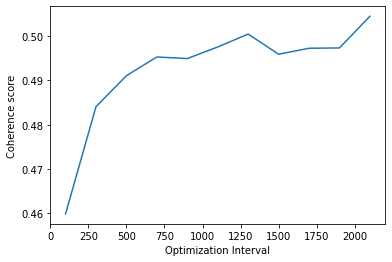

In [49]:
# Show graph
limit=2200; start=100; step=200;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Optimization Interval")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [50]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Interval =", m, 'Coherence: ', round(cv, 4))

Interval = 100 Coherence:  0.4599
Interval = 300 Coherence:  0.4841
Interval = 500 Coherence:  0.4911
Interval = 700 Coherence:  0.4953
Interval = 900 Coherence:  0.4949
Interval = 1100 Coherence:  0.4975
Interval = 1300 Coherence:  0.5004
Interval = 1500 Coherence:  0.4959
Interval = 1700 Coherence:  0.4972
Interval = 1900 Coherence:  0.4973
Interval = 2100 Coherence:  0.5045


In [53]:
# Coherence for alpha-9, iteration 4k, optimization interval 2100, 11-topic model
print(coherence_values[10])

# Topics for alpha-9, iteration 4k, optimization interval 2100, 11-topic model
malletModel_11a9i4ko21 = model_list[10]
model_topics_11a9i4ko21 = malletModel_11a9i4ko21.show_topics(formatted=False)
pprint(sorted(malletModel_11a9i4ko21.print_topics(num_words=20)))

# Convert results to lda model format for visualization.
MalletLDA11a9i4ko21 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_11a9i4ko21)

# Visualize the topics
pyLDAvis.enable_notebook()
vis011a9i4ko21 = pyLDAvis.gensim.prepare(MalletLDA11a9i4ko21, corpus, id2word, sort_topics=False)
vis011a9i4ko21

0.5044714369130452
[(0,
  '0.080*"day" + 0.046*"time" + 0.040*"winter" + 0.037*"summer" + '
  '0.033*"weather" + 0.022*"health" + 0.022*"month" + 0.018*"town" + '
  '0.018*"place" + 0.017*"week" + 0.016*"snow" + 0.015*"year" + '
  '0.014*"country" + 0.012*"spring" + 0.011*"rain" + 0.010*"frost" + '
  '0.010*"air" + 0.010*"heat" + 0.009*"fall" + 0.009*"pleasure"'),
 (1,
  '0.059*"dollar" + 0.051*"work" + 0.047*"money" + 0.026*"year" + '
  '0.026*"pound" + 0.023*"day" + 0.022*"country" + 0.020*"time" + '
  '0.019*"business" + 0.018*"week" + 0.017*"month" + 0.016*"house" + '
  '0.016*"cent" + 0.014*"board" + 0.012*"wage" + 0.012*"place" + 0.011*"man" + '
  '0.010*"pay" + 0.010*"expense" + 0.009*"employment"'),
 (2,
  '0.048*"land" + 0.036*"acre" + 0.034*"farm" + 0.032*"pound" + '
  '0.028*"country" + 0.027*"year" + 0.017*"wheat" + 0.016*"crop" + '
  '0.013*"price" + 0.013*"potato" + 0.013*"bushel" + 0.012*"farmer" + '
  '0.012*"market" + 0.011*"lot" + 0.011*"horse" + 0.011*"wood" + 0.010*

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.010017  0.036446       1        1   9.116523
1      0.081877 -0.133266       2        1   9.084936
2      0.243169 -0.155978       3        1   9.723898
3     -0.231130  0.032991       4        1  10.157594
4     -0.261735 -0.033969       5        1   9.642943
5      0.201335  0.172961       6        1   8.800898
6     -0.061023 -0.121648       7        1   7.583224
7     -0.028347  0.273556       8        1   9.505062
8      0.192753  0.165074       9        1   7.127684
9     -0.208106 -0.002806      10        1  10.094695
10     0.081223 -0.233360      11        1   9.162544, topic_info=        Term         Freq        Total Category  logprob  loglift
11    letter  1519.000000  1519.000000  Default  30.0000  30.0000
55      time  1579.000000  1579.000000  Default  29.0000  29.0000
30   brother   517.000000   517.000000  Default  28.0000  28.0000
416   dollar   461.000000   461.000000  Default  27.0000  27.0000
8        day  1466.000000  1466.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
275     idea    42.903648   123.489928  Topic11  -5.2227   1.3328
649     mind    48.011225   236.467255  Topic11  -5.1102   0.7957
223    world    46.989710   222.756449  Topic11  -5.1317   0.8339
557  respect    39.839102   103.347600  Topic11  -5.2968   1.4368
181     side    42.903648   197.368070  Topic11  -5.2227   0.8639

[992 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
615      10  0.984150  acceptance
28        1  0.158161     account
28        2  0.235313     account
28        4  0.158161     account
28        5  0.219882     account
...     ...       ...         ...
60        6  0.037521   yesterday
60        8  0.656621   yesterday
4207      3  1.003083        yoke
5562      5  0.996097        youe
1109      2  0.976398        yous

[1542 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [54]:
MalletLDA11a9i4k.save('20240610_PhD_TopicLtrMAL11a9i4k')
pyLDAvis.save_html(vis11a9i4k, '20240610_PhD_TopicLtrMAL11a9i4k.html')